In [1]:
#import all necessary liberty

%matplotlib inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


from scipy.stats import zscore

import pandas as pd

#missing value handle
from sklearn.preprocessing import Imputer

#To shuffle the data set
from sklearn.utils import shuffle
#spliting dataset into traning set and test set
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report



from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam

import keras
from keras import backend as K
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.callbacks import LearningRateScheduler


import csv

import itertools

import os


import pandas as pd
import io
import requests


Using TensorFlow backend.


In [2]:
# used function


def read_csv_798():
    data_frame_798 = pd.read_csv('data_798.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_798)):
        if(int(data_frame_798["1.0.7"][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_798["1.0.7"][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_798['yes']=yes
    data_frame_798['no']=no
    
    print(len(data_frame_798))
    print(len(yes))
    print(len(no))
    return data_frame_798

def read_csv_834():
    data_frame_834 = pd.read_csv('data_834.tab', sep='\t')
    yes = []
    no = []
    for i in range(len(data_frame_834)):
        if(int(data_frame_834['1.0.4'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_834['1.0.4'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_834['yes']=yes
    data_frame_834['no']=no
    
    print(len(data_frame_834))
    print(len(yes))
    print(len(no))
    return data_frame_834

def read_csv_835():
    data_frame_m = pd.read_csv('RihanSirPreprocess.tab', sep='\t')
    yes = []
    no = []
    data_frame_m.drop(["Risk Type","low","medium","high"],axis=1,inplace=True)
    data_frame_m = data_frame_m[['Age', 'Sex', 'Smoking', 'HTN', 'DLP', 'DM', 'Physical Exercise',
       'Family History', 'Drug History', 'Psychological Stress', 'Chest Pain',
       'Dyspnea', 'Palpitation', 'ECG','Risk Score', 'IHD-HeartAttack']]
    for i in range(len(data_frame_m)):
        if(int(data_frame_m['IHD-HeartAttack'][i])==0):
            yes.append(0)
            no.append(1)
            
        if(int(data_frame_m['IHD-HeartAttack'][i])==1):
            yes.append(1)
            no.append(0)
    
    data_frame_m['yes']=yes
    data_frame_m['no']=no
    
    print(len(data_frame_m))
    print(len(yes))
    print(len(no))
    return data_frame_m


#suffle the data set
def create_data_set(data_frame):
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    df = data_frame.reindex(np.random.permutation(data_frame.index))
    df.reset_index(inplace=True,drop=True)
    
    data_set = df.values
    return data_set

def x_data_y_data_create(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y


#full data set one label
def x_data_y_data_create_1(data_set):
    actual_x = data_set[:,:len(data_set[0])-1]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y

# without ECG data set one label
def x_data_y_data_create_2(data_set):
    actual_x = data_set[:,:len(data_set[0])-2]
    actual_y = data_set[:,len(data_set[0])-1:]
    return actual_x,actual_y


#multi label data set 
def x_data_y_data_create_3(data_set):
    actual_x = data_set[:,:len(data_set[0])-3]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

#multi label data set without ECG
def x_data_y_data_create_4(data_set):
    actual_x = data_set[:,:len(data_set[0])-4]
    actual_y = data_set[:,len(data_set[0])-2:]
    return actual_x,actual_y

def split_data(data_set):
    # split into train and test sets
    train_size = int(len(data_set) * 0.75)
    test_size = len(data_set) - train_size   
    train, test = data_set[0:train_size,:], data_set[train_size:len(data_set),:]

    train_x = train[:,:len(data_set[0])-2]
    train_y = train[:,len(data_set[0])-2:]

    test_x = test[:,:len(data_set[0])-2]
    test_y = test[:,len(data_set[0])-2:]

    print(len(train), len(test))
    
    return train_x,train_y,test_x,test_y


def ann_model(input_shape) : 
    model = Sequential([
    Dense(7,kernel_initializer='uniform',input_shape=(input_shape,),activation="relu"),
    Dense(5,activation="relu"),
    Dense(2,activation="softmax")
    
    ])
    # print(model.summary())
    return(model)

def confussion_matrix_generator(test_y,rounded_predicted_result):
    #rounded_predections = self.model.predict_classes(self.test_x,batch_size=10,verbose=0)
    cm = confusion_matrix(test_y,rounded_predicted_result)
    cm = cm
    cm_plot_labels = ['no ', 'yes']
    print(cm)
    #self.plot_confusion_matrix(cm,cm_plot_labels,title='Confussion Matrix')
    return cm


def ROC_curve_generator(model,X_test):
    #ROC curve

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
def performance():
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    n =TN+FP+FN+TP
    print("numer of total test sample: ",n)

    print("Model Score: ", score)

    accuracy = (TP+TN)/n
    print("accuracy: ",accuracy)

    missclassafication_rate = 1-accuracy
    print("missclassafication_rate: ",missclassafication_rate)

    sensitivity = TP/(TP+FN)
    print("Sensitivity/Recall: ",sensitivity)

    spasificity = TN/(TN+FP)
    print("Spacificity: ",spasificity)

    precition = TP/(FP+TP)
    print("Precition: ",precition)

    prevalence = (FN+TP)/n
    print("prevalence: ",prevalence)

    PPV = TP/(TP+FP)
    print("Positive Predicted Value: ",PPV)

    NPV = TN/(TN+FN)
    print("Negative Predicted Value: ",NPV)

    beta = 0.5
    f_score = 1/(beta*(1/precition)+(1-beta)*(1/sensitivity))
    print("F Score: ",f_score)
    
    
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_acc'],label='validation')
    plt.plot(range(1,epochs+1),history.history['acc'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img-'+str(i)+'-accuracy.jpg')
    plt.close(fig)

In [3]:
data_frame_name_list = ['data_798.tab','data_834.tab','RihanSirPreprocess.tab']

keras_optimizers = [
    keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
    keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
    keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
    keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
    keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
]


keras_loss = [losses.mean_squared_error,
              losses.mean_absolute_error,
              losses.mean_absolute_percentage_error,
              losses.mean_squared_logarithmic_error,
              losses.squared_hinge,
              losses.hinge,
              losses.categorical_hinge,
              losses.logcosh,
              losses.categorical_crossentropy,
              losses.sparse_categorical_crossentropy,
              losses.binary_crossentropy,
              losses.kullback_leibler_divergence,
              losses.poisson,
              losses.cosine_proximity,             
             ]

data_frame = []


batch_size = 30
num_classes = 2
epochs = 5

X_train =[]
Y_train =[]
X_test =[]
Y_test = []

input_size = 0

In [4]:
#data_frame = read_csv_798()

data_frame = read_csv_834()

#data_frame = pd.read_csv('data_834.tab', sep='\t')

#data_frame = read_csv_835()

834
834
834


In [5]:
data_set = create_data_set(data_frame)

In [6]:
for i in data_set:
    print(i)

[30.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.]
[72.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[35.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[55.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.]
[29.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[60.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.  1.  1.  0.]
[55.  1.  2.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[40.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  0.]
[48.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[43.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.]
[46.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.]
[57.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[91.  2.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.]
[53.  1.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.]
[33.  1.  0.  0.  0.

[36.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[60.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
[48.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[46.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[60.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.]
[52.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]
[63.  1.  2.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.]
[65.  2.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[50.  2.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  0.  1.]
[40.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.]
[61.  1.  1.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[49.  1.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[46.  1.  1.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.]
[56.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.]
[63.  1.  1.  1.  0.

[44.  1.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.]
[40.  2.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[39.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
[56.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
[36.  1.  1.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[52.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.]
[65.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.]
[65.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.]
[47.  2.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.]
[55.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.]
[75.  1.  2.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.]
[48.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.]
[45.  2.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.]
[30.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.]
[47.  1.  0.  0.  0.

In [7]:
actual_x,actual_y = x_data_y_data_create_4(data_set)

In [8]:
len(actual_x[0])

13

# 01 # losses.mean_squared_error

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.2513 - acc: 0.5960 - val_loss: 0.2342 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.2369 - acc: 0.6040 - val_loss: 0.2342 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.2347 - acc: 0.6027 - val_loss: 0.2330 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.2326 - acc: 0.6053 - val_loss: 0.2322 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.2308 - acc: 0.6107 - val_loss: 0.2326 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.2301 - acc: 0.6133 - val_loss: 0.2308 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.2288 - acc: 0.6053 - val_loss: 0.2303 - val_acc: 0.6190
Epoch 8/100
 - 0s - loss: 0.2276 - acc: 0.6187 - val_loss: 0.2299 - val_acc: 0.6190
Epoch 9/100
 - 0s - loss: 0.2258 - acc: 0.6173 - val_loss: 0.2295 - val_acc: 0.6190
Epoch 10/100
 - 0s - loss: 0.2243 - acc: 0.6307 - val_loss: 0.2303 - val_acc: 0.6071
Epoch 11/100
 - 0s - loss: 0.2245 - acc: 0.6320 - val_loss: 0.2288 - val_acc: 0.6190
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.1953 - acc: 0.7187 - val_loss: 0.2197 - val_acc: 0.6667
Epoch 98/100
 - 0s - loss: 0.1954 - acc: 0.7253 - val_loss: 0.2209 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.1951 - acc: 0.7147 - val_loss: 0.2197 - val_acc: 0.6667
Epoch 100/100
 - 0s - loss: 0.1946 - acc: 0.7253 - val_loss: 0.2223 - val_acc: 0.6548


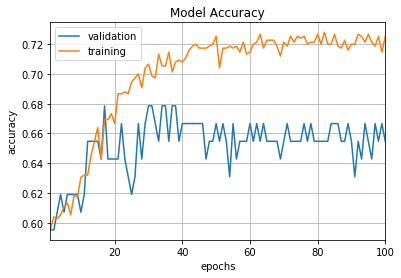

84/84 [==============================] - 0s 43us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.22226331276553019, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.2610 - acc: 0.4773 - val_loss: 0.2447 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.2425 - acc: 0.6013 - val_loss: 0.2399 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.2399 - acc: 0.6013 - val_loss: 0.2375 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.2386 - acc: 0.6013 - val_loss: 0.2362 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 0.2367 - acc: 0.6000 - val_loss: 0.2331 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.2336 - acc: 0.6013 - val_loss: 0.2306 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.2315 - acc: 0.6080 - val_loss: 0.2287 - val_acc: 0.6071
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1967 - acc: 0.7013 - val_loss: 0.1940 - val_acc: 0.7738
Epoch 94/100
 - 0s - loss: 0.1968 - acc: 0.7093 - val_loss: 0.1931 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.1965 - acc: 0.7027 - val_loss: 0.1934 - val_acc: 0.7619
Epoch 96/100
 - 0s - loss: 0.1965 - acc: 0.7080 - val_loss: 0.1932 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.1966 - acc: 0.7013 - val_loss: 0.1931 - val_acc: 0.7619
Epoch 98/100
 - 0s - loss: 0.1964 - acc: 0.7053 - val_loss: 0.1934 - val_acc: 0.7619
Epoch 99/100
 - 0s - loss: 0.1963 - acc: 0.7160 - val_loss: 0.1928 - val_acc: 0.7619
Epoch 100/100
 - 0s - loss: 0.1965 - acc: 0.7080 - val_loss: 0.1932 - val_acc: 0.7619


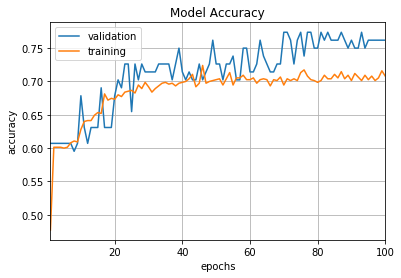

84/84 [==============================] - 0s 67us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.19319011625789462, 0.7619047590664455]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.2916 - acc: 0.5200 - val_loss: 0.2598 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.2448 - acc: 0.5867 - val_loss: 0.2383 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.2394 - acc: 0.6067 - val_loss: 0.2349 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.2385 - acc: 0.6000 - val_loss: 0.2318 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.2363 - acc: 0.6160 - val_loss: 0.2249 - val_acc: 0.6310
Epoch 6/100
 - 0s - loss: 0.2295 - acc: 0.6253 - val_loss: 0.2183 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.2252 - acc: 0.6493 - val_loss: 0.2167 - val_acc: 0.6429
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1946 - acc: 0.7200 - val_loss: 0.1876 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.1948 - acc: 0.7240 - val_loss: 0.1869 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.1946 - acc: 0.7240 - val_loss: 0.1853 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.1921 - acc: 0.7267 - val_loss: 0.1993 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.1947 - acc: 0.7173 - val_loss: 0.1849 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.1938 - acc: 0.7213 - val_loss: 0.1871 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.1939 - acc: 0.7200 - val_loss: 0.1871 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.1940 - acc: 0.7160 - val_loss: 0.1863 - val_acc: 0.7143


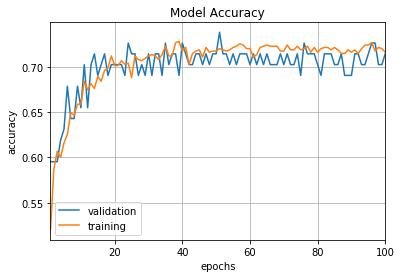

84/84 [==============================] - 0s 45us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.1862636251108987, 0.7142857114473978]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 0s - loss: 0.6042 - acc: 0.3947 - val_loss: 0.4755 - val_acc: 0.4286
Epoch 2/100
 - 0s - loss: 0.2683 - acc: 0.5227 - val_loss: 0.2533 - val_acc: 0.5476
Epoch 3/100
 - 0s - loss: 0.2348 - acc: 0.6000 - val_loss: 0.2372 - val_acc: 0.5833
Epoch 4/100
 - 0s - loss: 0.2307 - acc: 0.6040 - val_loss: 0.2337 - val_acc: 0.5833
Epoch 5/100
 - 0s - loss: 0.2266 - acc: 0.6267 - val_loss: 0.2338 - val_acc: 0.5476
Epoch 6/100
 - 0s - loss: 0.2242 - acc: 0.6400 - val_loss: 0.2286 - val_acc: 0.5833
Epoch 7/100
 - 0s - loss: 0.2224 - acc: 0.6400 - val_loss: 0.2228 - val_acc: 0.6310
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.1919 - acc: 0.7160 - val_loss: 0.1957 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.1917 - acc: 0.7173 - val_loss: 0.1979 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.1917 - acc: 0.7133 - val_loss: 0.1994 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.1915 - acc: 0.7227 - val_loss: 0.2008 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.1923 - acc: 0.7227 - val_loss: 0.1966 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.1919 - acc: 0.7267 - val_loss: 0.1963 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.1917 - acc: 0.7160 - val_loss: 0.1995 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.1918 - acc: 0.7253 - val_loss: 0.1962 - val_acc: 0.7262


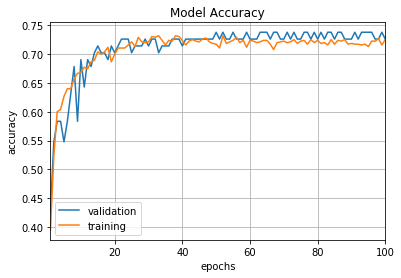

84/84 [==============================] - 0s 67us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.19620019907043093, 0.7261904761904762]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 0s - loss: 0.2455 - acc: 0.6059 - val_loss: 0.2347 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.2305 - acc: 0.6072 - val_loss: 0.2338 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.2297 - acc: 0.6099 - val_loss: 0.2335 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.2294 - acc: 0.6085 - val_loss: 0.2335 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.2285 - acc: 0.6125 - val_loss: 0.2331 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.2281 - acc: 0.6138 - val_loss: 0.2332 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.2275 - acc: 0.6138 - val_loss: 0.2332 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1951 - acc: 0.7190 - val_loss: 0.2196 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.1950 - acc: 0.7137 - val_loss: 0.2182 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.1950 - acc: 0.7230 - val_loss: 0.2184 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.1947 - acc: 0.7177 - val_loss: 0.2191 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.1944 - acc: 0.7177 - val_loss: 0.2181 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.1946 - acc: 0.7244 - val_loss: 0.2186 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.1944 - acc: 0.7244 - val_loss: 0.2182 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.1945 - acc: 0.7230 - val_loss: 0.2185 - val_acc: 0.6988


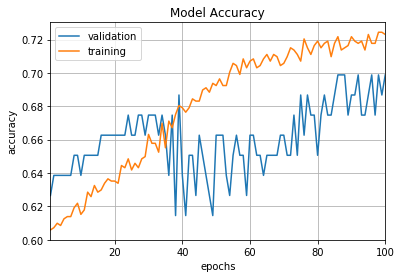

83/83 [==============================] - 0s 46us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.2185405553823494, 0.6987951785685068]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 0s - loss: 0.2514 - acc: 0.5846 - val_loss: 0.2453 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.2408 - acc: 0.5952 - val_loss: 0.2302 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.2368 - acc: 0.5939 - val_loss: 0.2404 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.2349 - acc: 0.5979 - val_loss: 0.2252 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.2320 - acc: 0.6178 - val_loss: 0.2252 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.2296 - acc: 0.6138 - val_loss: 0.2280 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.2280 - acc: 0.6325 - val_loss: 0.2228 - val_acc: 0.6506
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2031 - acc: 0.7071 - val_loss: 0.1989 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.2027 - acc: 0.7071 - val_loss: 0.1989 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.2025 - acc: 0.7004 - val_loss: 0.1987 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.2026 - acc: 0.7084 - val_loss: 0.1996 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.2025 - acc: 0.7150 - val_loss: 0.1985 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.2026 - acc: 0.7057 - val_loss: 0.1984 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.2020 - acc: 0.7031 - val_loss: 0.1983 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.2018 - acc: 0.7057 - val_loss: 0.2007 - val_acc: 0.7229


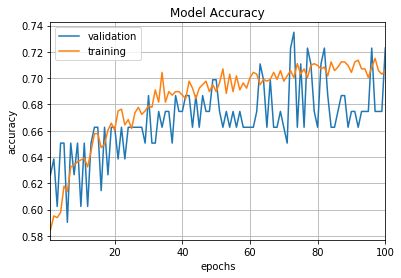

83/83 [==============================] - 0s 50us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.20074295548789473, 0.7228915691375732]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2814 - acc: 0.5593 - val_loss: 0.2754 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.2437 - acc: 0.6178 - val_loss: 0.2191 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.2305 - acc: 0.6312 - val_loss: 0.2049 - val_acc: 0.6747
Epoch 4/100
 - 0s - loss: 0.2300 - acc: 0.6405 - val_loss: 0.2130 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.2238 - acc: 0.6618 - val_loss: 0.2005 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.2225 - acc: 0.6511 - val_loss: 0.2700 - val_acc: 0.5060
Epoch 7/100
 - 0s - loss: 0.2209 - acc: 0.6671 - val_loss: 0.2007 - val_acc: 0.7470
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.1948 - acc: 0.7204 - val_loss: 0.1948 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.1949 - acc: 0.7230 - val_loss: 0.1953 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.1941 - acc: 0.7230 - val_loss: 0.1976 - val_acc: 0.6627
Epoch 96/100
 - 0s - loss: 0.1942 - acc: 0.7177 - val_loss: 0.2062 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.1943 - acc: 0.7270 - val_loss: 0.1999 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.1938 - acc: 0.7204 - val_loss: 0.1954 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.1935 - acc: 0.7217 - val_loss: 0.2042 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.1939 - acc: 0.7297 - val_loss: 0.2020 - val_acc: 0.6747


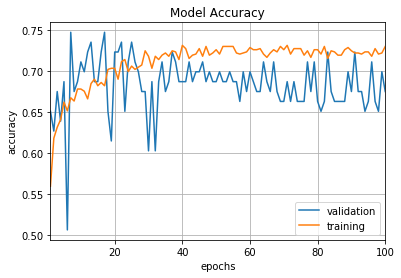

83/83 [==============================] - 0s 45us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.20198364555835724, 0.6746987980532358]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2375 - acc: 0.6005 - val_loss: 0.2299 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.2354 - acc: 0.6005 - val_loss: 0.2314 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.2346 - acc: 0.6005 - val_loss: 0.2297 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.2334 - acc: 0.6005 - val_loss: 0.2303 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.2330 - acc: 0.6019 - val_loss: 0.2292 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.2327 - acc: 0.6005 - val_loss: 0.2275 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.2324 - acc: 0.6005 - val_loss: 0.2274 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2093 - acc: 0.6977 - val_loss: 0.2052 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.2089 - acc: 0.6964 - val_loss: 0.2049 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.2087 - acc: 0.6924 - val_loss: 0.2041 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.2084 - acc: 0.6951 - val_loss: 0.2035 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.2083 - acc: 0.6937 - val_loss: 0.2036 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.2080 - acc: 0.6924 - val_loss: 0.2038 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.2078 - acc: 0.6977 - val_loss: 0.2032 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.2076 - acc: 0.7004 - val_loss: 0.2029 - val_acc: 0.7349


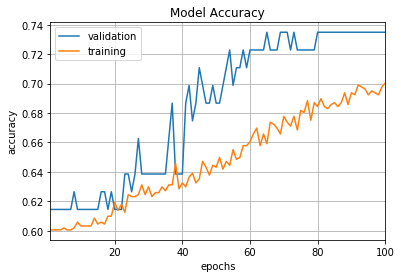

83/83 [==============================] - 0s 48us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.20294332629944906, 0.7349397654992988]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2464 - acc: 0.6152 - val_loss: 0.2426 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.2317 - acc: 0.6099 - val_loss: 0.2340 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.2301 - acc: 0.6205 - val_loss: 0.2305 - val_acc: 0.5663
Epoch 4/100
 - 0s - loss: 0.2299 - acc: 0.6112 - val_loss: 0.2287 - val_acc: 0.5542
Epoch 5/100
 - 0s - loss: 0.2291 - acc: 0.6205 - val_loss: 0.2302 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.2291 - acc: 0.6218 - val_loss: 0.2321 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.2287 - acc: 0.6178 - val_loss: 0.2321 - val_acc: 0.5301
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2030 - acc: 0.7124 - val_loss: 0.1899 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.2029 - acc: 0.7084 - val_loss: 0.1897 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.2026 - acc: 0.7044 - val_loss: 0.1910 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.2024 - acc: 0.7071 - val_loss: 0.1898 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.2021 - acc: 0.7111 - val_loss: 0.1904 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.2020 - acc: 0.7111 - val_loss: 0.1893 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.2018 - acc: 0.7084 - val_loss: 0.1895 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.2016 - acc: 0.7097 - val_loss: 0.1896 - val_acc: 0.7349


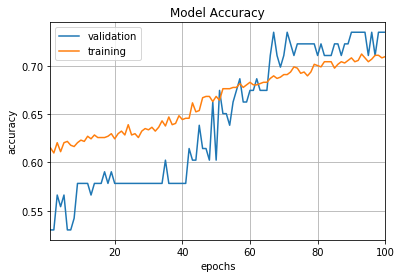

83/83 [==============================] - 0s 113us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.1895951248077025, 0.7349397654992988]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.2569 - acc: 0.5766 - val_loss: 0.3758 - val_acc: 0.3976
Epoch 2/100
 - 0s - loss: 0.2326 - acc: 0.6232 - val_loss: 0.2504 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.2206 - acc: 0.6578 - val_loss: 0.3523 - val_acc: 0.3976
Epoch 4/100
 - 0s - loss: 0.2256 - acc: 0.6458 - val_loss: 0.2931 - val_acc: 0.4096
Epoch 5/100
 - 0s - loss: 0.2183 - acc: 0.6671 - val_loss: 0.2388 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.2132 - acc: 0.6724 - val_loss: 0.2327 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.2079 - acc: 0.6884 - val_loss: 0.2321 - val_acc: 0.6627
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1912 - acc: 0.7124 - val_loss: 0.2133 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.1918 - acc: 0.7177 - val_loss: 0.2137 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.1916 - acc: 0.7230 - val_loss: 0.2104 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.1915 - acc: 0.7044 - val_loss: 0.2107 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.1914 - acc: 0.7190 - val_loss: 0.2099 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.1911 - acc: 0.7217 - val_loss: 0.2107 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.1921 - acc: 0.7177 - val_loss: 0.2094 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.1919 - acc: 0.7270 - val_loss: 0.2105 - val_acc: 0.7229


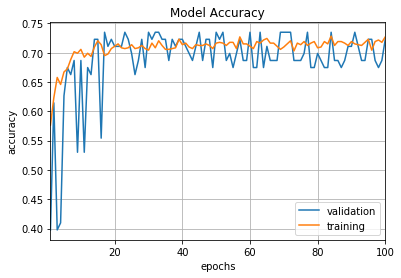

83/83 [==============================] - 0s 78us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.2104891870754311, 0.7228915691375732]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------




In [9]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_error,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [10]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047590664455
0.7146299497361712


[[0.22226331276553019, 0.6547619047619048],
 [0.19319011625789462, 0.7619047590664455],
 [0.1862636251108987, 0.7142857114473978],
 [0.19620019907043093, 0.7261904761904762],
 [0.2185405553823494, 0.6987951785685068],
 [0.20074295548789473, 0.7228915691375732],
 [0.20198364555835724, 0.6746987980532358],
 [0.20294332629944906, 0.7349397654992988],
 [0.1895951248077025, 0.7349397654992988],
 [0.2104891870754311, 0.7228915691375732]]

In [11]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7170272534492542


[0.7253333365917206,
 0.7080000007152557,
 0.7159999990463257,
 0.7253333322207133,
 0.7230359534925215,
 0.7057256991472765,
 0.7296937410428267,
 0.700399469757842,
 0.7097203758521657,
 0.727030626625894]

# 02 # losses.mean_absolute_error,

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3973 - acc: 0.6027 - val_loss: 0.4040 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.3969 - acc: 0.6027 - val_loss: 0.4022 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.3967 - acc: 0.6027 - val_loss: 0.4022 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.3964 - acc: 0.6027 - val_loss: 0.4020 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.3960 - acc: 0.6027 - val_loss: 0.4021 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.3960 - acc: 0.6027 - val_loss: 0.4016 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.3959 - acc: 0.6027 - val_loss: 0.4013 - val_acc: 0.5952
Epoch 8/100
 - 0s - loss: 0.3957 - acc: 0.6027 - val_loss: 0.4009 - val_acc: 0.5952
Epoch 9/100
 - 0s - loss: 0.3956 - acc: 0.6027 - val_loss: 0.4009 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 0.3955 - acc: 0.6027 - val_loss: 0.4006 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.3955 - acc: 0.6027 - val_loss: 0.4005 - val_acc: 0.5952
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.3636 - acc: 0.6480 - val_loss: 0.3785 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.3632 - acc: 0.6440 - val_loss: 0.3785 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.3628 - acc: 0.6453 - val_loss: 0.3767 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.3622 - acc: 0.6533 - val_loss: 0.3750 - val_acc: 0.6548


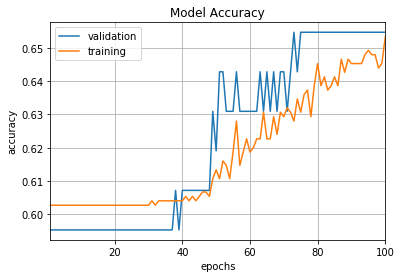

84/84 [==============================] - 0s 44us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.3749735951423645, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3999 - acc: 0.6013 - val_loss: 0.3930 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.3974 - acc: 0.6013 - val_loss: 0.3928 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.3968 - acc: 0.6013 - val_loss: 0.3922 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.3964 - acc: 0.6013 - val_loss: 0.3917 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 0.3955 - acc: 0.6013 - val_loss: 0.3912 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.3944 - acc: 0.6013 - val_loss: 0.3894 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.3928 - acc: 0.6013 - val_loss: 0.3863 - val_acc: 0.6071
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2981 - acc: 0.7173 - val_loss: 0.2700 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.2976 - acc: 0.7133 - val_loss: 0.2698 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.2976 - acc: 0.7187 - val_loss: 0.2706 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.2963 - acc: 0.7173 - val_loss: 0.2659 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.2968 - acc: 0.7133 - val_loss: 0.2696 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.2973 - acc: 0.7200 - val_loss: 0.2683 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.2971 - acc: 0.7160 - val_loss: 0.2678 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.2966 - acc: 0.7200 - val_loss: 0.2665 - val_acc: 0.7381


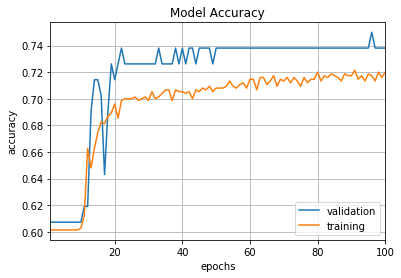

84/84 [==============================] - 0s 80us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.26647149806930903, 0.738095243771871]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.4000 - acc: 0.6000 - val_loss: 0.4027 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.3961 - acc: 0.6027 - val_loss: 0.4025 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.3957 - acc: 0.6027 - val_loss: 0.4015 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.3954 - acc: 0.6027 - val_loss: 0.4005 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.3949 - acc: 0.6027 - val_loss: 0.3991 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.3937 - acc: 0.6027 - val_loss: 0.3967 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.3924 - acc: 0.6040 - val_loss: 0.3956 - val_acc: 0.5952
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.2971 - acc: 0.7200 - val_loss: 0.3164 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.2972 - acc: 0.7147 - val_loss: 0.3154 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.2971 - acc: 0.7133 - val_loss: 0.3179 - val_acc: 0.6786
Epoch 96/100
 - 0s - loss: 0.2965 - acc: 0.7147 - val_loss: 0.3198 - val_acc: 0.6786
Epoch 97/100
 - 0s - loss: 0.2964 - acc: 0.7187 - val_loss: 0.3150 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.2971 - acc: 0.7173 - val_loss: 0.3169 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.2965 - acc: 0.7120 - val_loss: 0.3159 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.2962 - acc: 0.7133 - val_loss: 0.3159 - val_acc: 0.7024


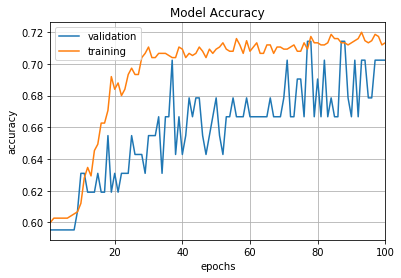

84/84 [==============================] - 0s 53us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.3159065672329494, 0.7023809467043195]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 0.3947 - acc: 0.6053 - val_loss: 0.4275 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.3946 - acc: 0.6053 - val_loss: 0.4262 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.3945 - acc: 0.6053 - val_loss: 0.4252 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.3943 - acc: 0.6053 - val_loss: 0.4247 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.3942 - acc: 0.6053 - val_loss: 0.4242 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.3942 - acc: 0.6053 - val_loss: 0.4237 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.3941 - acc: 0.6053 - val_loss: 0.4233 - val_acc: 0.5714
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.3012 - acc: 0.7240 - val_loss: 0.2839 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.3011 - acc: 0.7240 - val_loss: 0.2832 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.3006 - acc: 0.7213 - val_loss: 0.2852 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.3003 - acc: 0.7213 - val_loss: 0.2850 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.3000 - acc: 0.7160 - val_loss: 0.2821 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.3001 - acc: 0.7200 - val_loss: 0.2817 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.2998 - acc: 0.7240 - val_loss: 0.2829 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.2991 - acc: 0.7200 - val_loss: 0.2814 - val_acc: 0.7262


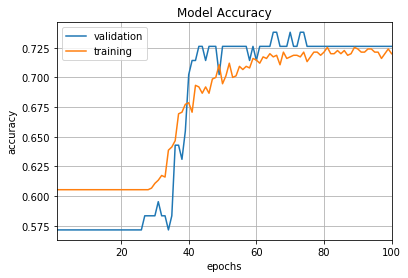

84/84 [==============================] - 0s 58us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.28141962914239793, 0.7261904761904762]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4073 - acc: 0.5912 - val_loss: 0.3751 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.3998 - acc: 0.5992 - val_loss: 0.3743 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.3989 - acc: 0.5992 - val_loss: 0.3735 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.3956 - acc: 0.5992 - val_loss: 0.5122 - val_acc: 0.4337
Epoch 5/100
 - 0s - loss: 0.3984 - acc: 0.5965 - val_loss: 0.3805 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.3926 - acc: 0.6019 - val_loss: 0.3775 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.3891 - acc: 0.6099 - val_loss: 0.3712 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2947 - acc: 0.7244 - val_loss: 0.3172 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.2944 - acc: 0.7230 - val_loss: 0.3134 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.2938 - acc: 0.7284 - val_loss: 0.3131 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.2929 - acc: 0.7324 - val_loss: 0.3129 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.2931 - acc: 0.7244 - val_loss: 0.3126 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.2931 - acc: 0.7297 - val_loss: 0.3146 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.2932 - acc: 0.7324 - val_loss: 0.3122 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.2926 - acc: 0.7284 - val_loss: 0.3121 - val_acc: 0.7229


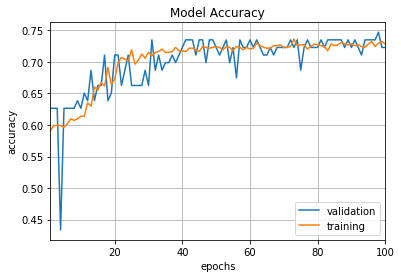

83/83 [==============================] - 0s 56us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.31205058672341957, 0.7228915641106755]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4002 - acc: 0.5992 - val_loss: 0.3741 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.3995 - acc: 0.5992 - val_loss: 0.3742 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.3991 - acc: 0.5992 - val_loss: 0.3747 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.3985 - acc: 0.5992 - val_loss: 0.3739 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.3979 - acc: 0.5992 - val_loss: 0.3758 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.3967 - acc: 0.5992 - val_loss: 0.3754 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.3957 - acc: 0.5992 - val_loss: 0.3737 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.2898 - acc: 0.7217 - val_loss: 0.2779 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.2890 - acc: 0.7190 - val_loss: 0.2806 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.2890 - acc: 0.7204 - val_loss: 0.2792 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.2886 - acc: 0.7204 - val_loss: 0.2830 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.2886 - acc: 0.7204 - val_loss: 0.2765 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.2885 - acc: 0.7204 - val_loss: 0.2730 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.2881 - acc: 0.7177 - val_loss: 0.2925 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.2885 - acc: 0.7257 - val_loss: 0.2796 - val_acc: 0.7229


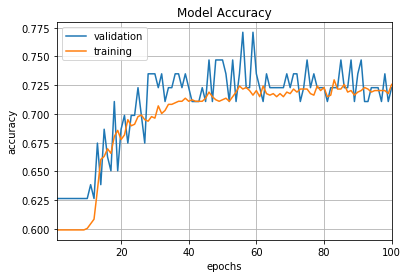

83/83 [==============================] - 0s 70us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.2795642560505005, 0.7228915605200342]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4082 - acc: 0.5965 - val_loss: 0.3590 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.4027 - acc: 0.5965 - val_loss: 0.3556 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.4020 - acc: 0.5965 - val_loss: 0.3544 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 0.4018 - acc: 0.5965 - val_loss: 0.3537 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.4016 - acc: 0.5965 - val_loss: 0.3533 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.4015 - acc: 0.5965 - val_loss: 0.3532 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.4014 - acc: 0.5965 - val_loss: 0.3530 - val_acc: 0.6506
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.3120 - acc: 0.7097 - val_loss: 0.3044 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.3113 - acc: 0.7177 - val_loss: 0.3046 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.3109 - acc: 0.7111 - val_loss: 0.3041 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.3104 - acc: 0.7111 - val_loss: 0.3040 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.3099 - acc: 0.7204 - val_loss: 0.3027 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.3096 - acc: 0.7137 - val_loss: 0.3041 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.3092 - acc: 0.7150 - val_loss: 0.3027 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.3090 - acc: 0.7177 - val_loss: 0.3041 - val_acc: 0.7229


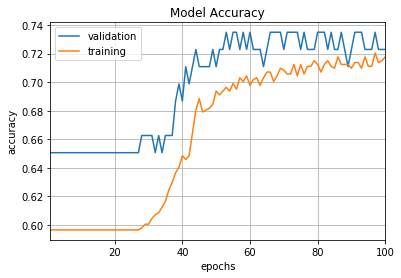

83/83 [==============================] - 0s 59us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.3041270386023694, 0.7228915691375732]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.4962 - acc: 0.6099 - val_loss: 0.4858 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.4836 - acc: 0.6418 - val_loss: 0.4893 - val_acc: 0.5783
Epoch 3/100
 - 0s - loss: 0.4806 - acc: 0.6391 - val_loss: 0.4807 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.4754 - acc: 0.6498 - val_loss: 0.4731 - val_acc: 0.6747
Epoch 5/100
 - 0s - loss: 0.4719 - acc: 0.6418 - val_loss: 0.4728 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.4681 - acc: 0.6458 - val_loss: 0.4652 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.4650 - acc: 0.6431 - val_loss: 0.4677 - val_acc: 0.6386
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.3365 - acc: 0.7244 - val_loss: 0.3556 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.3357 - acc: 0.7230 - val_loss: 0.3524 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.3357 - acc: 0.7284 - val_loss: 0.3603 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.3351 - acc: 0.7217 - val_loss: 0.3547 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.3343 - acc: 0.7284 - val_loss: 0.3513 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.3344 - acc: 0.7230 - val_loss: 0.3527 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.3335 - acc: 0.7230 - val_loss: 0.3521 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.3327 - acc: 0.7297 - val_loss: 0.3530 - val_acc: 0.6988


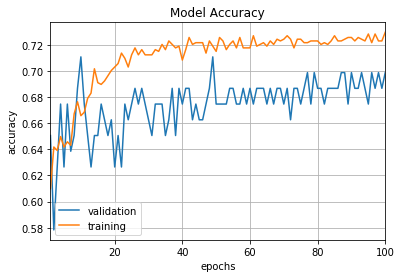

83/83 [==============================] - 0s 61us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.35298718924982003, 0.6987951871860458]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.6111 - acc: 0.3901 - val_loss: 0.5308 - val_acc: 0.4699
Epoch 2/100
 - 0s - loss: 0.6101 - acc: 0.3901 - val_loss: 0.5304 - val_acc: 0.4699
Epoch 3/100
 - 0s - loss: 0.6100 - acc: 0.3901 - val_loss: 0.5303 - val_acc: 0.4699
Epoch 4/100
 - 0s - loss: 0.6100 - acc: 0.3901 - val_loss: 0.5302 - val_acc: 0.4699
Epoch 5/100
 - 0s - loss: 0.6100 - acc: 0.3901 - val_loss: 0.5302 - val_acc: 0.4699
Epoch 6/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5302 - val_acc: 0.4699
Epoch 7/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5302 - val_acc: 0.4699
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 94/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 95/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 96/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 97/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 98/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 99/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699
Epoch 100/100
 - 0s - loss: 0.6099 - acc: 0.3901 - val_loss: 0.5301 - val_acc: 0.4699


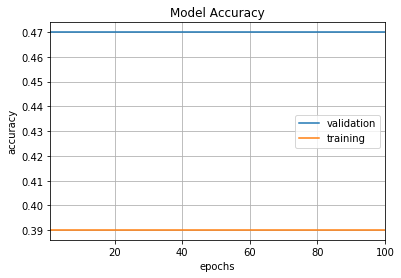

83/83 [==============================] - 0s 84us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5301210628934654, 0.46987951519977617]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 0.3979 - acc: 0.6019 - val_loss: 0.4043 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.4031 - acc: 0.6019 - val_loss: 0.4030 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.3970 - acc: 0.6019 - val_loss: 0.4003 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.3967 - acc: 0.6019 - val_loss: 0.4000 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.3967 - acc: 0.6019 - val_loss: 0.4004 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.3966 - acc: 0.6019 - val_loss: 0.4001 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.3965 - acc: 0.6019 - val_loss: 0.4007 - val_acc: 0.6024
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.2909 - acc: 0.7190 - val_loss: 0.3108 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.2884 - acc: 0.7217 - val_loss: 0.3409 - val_acc: 0.6386
Epoch 95/100
 - 0s - loss: 0.2893 - acc: 0.7310 - val_loss: 0.3036 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.2902 - acc: 0.7244 - val_loss: 0.3078 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.2899 - acc: 0.7204 - val_loss: 0.3013 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.2906 - acc: 0.7164 - val_loss: 0.3234 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.2905 - acc: 0.7150 - val_loss: 0.3092 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.2893 - acc: 0.7204 - val_loss: 0.3128 - val_acc: 0.7108


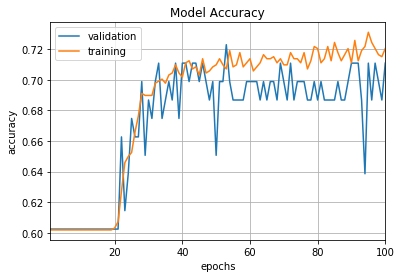

83/83 [==============================] - 0s 65us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.3127985133464078, 0.7108433763664889]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------




In [12]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss= losses.mean_absolute_error,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])
    
    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [13]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.738095243771871
0.6869621343949166


[[0.3749735951423645, 0.6547619047619048],
 [0.26647149806930903, 0.738095243771871],
 [0.3159065672329494, 0.7023809467043195],
 [0.28141962914239793, 0.7261904761904762],
 [0.31205058672341957, 0.7228915641106755],
 [0.2795642560505005, 0.7228915605200342],
 [0.3041270386023694, 0.7228915691375732],
 [0.35298718924982003, 0.6987951871860458],
 [0.5301210628934654, 0.46987951519977617],
 [0.3127985133464078, 0.7108433763664889]]

In [14]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6818650713103166


[0.6533333371082942,
 0.7200000015894572,
 0.7133333349227905,
 0.7200000019868215,
 0.7283621867709408,
 0.7256990660046452,
 0.7177097232300496,
 0.7296937446143433,
 0.3901464782764369,
 0.7203728385993866]

# 03 # losses.mean_absolute_percentage_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 201194163.6800 - acc: 0.6027 - val_loss: 200970889.3810 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 197695016.3067 - acc: 0.6027 - val_loss: 200759913.0476 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 197521189.7400 - acc: 0.6027 - val_loss: 200630207.5952 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 197358896.0533 - acc: 0.6027 - val_loss: 200495620.2619 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 197218762.4400 - acc: 0.6027 - val_loss: 200346321.1310 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 197053298.8267 - acc: 0.6027 - val_loss: 200190178.3810 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 196887867.8933 - acc: 0.6027 - val_loss: 200018870.1667 - val_acc: 0.5952
Epoch 8/100
 - 0s - loss: 196713260.1067 - acc: 0.6027 - val_loss: 199837132.9048 - val_acc: 0.5952
Epoch 9/100
 - 0s - loss: 196461847.9467 - acc: 0.6027 - val_loss: 199631698.8333 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 196208563.1467 - acc

Epoch 82/100
 - 0s - loss: 154666906.0800 - acc: 0.7280 - val_loss: 179651068.7143 - val_acc: 0.6548
Epoch 83/100
 - 0s - loss: 154412061.1467 - acc: 0.7240 - val_loss: 179520691.5238 - val_acc: 0.6548
Epoch 84/100
 - 0s - loss: 154217064.9867 - acc: 0.7253 - val_loss: 179442120.9524 - val_acc: 0.6429
Epoch 85/100
 - 0s - loss: 154008142.7733 - acc: 0.7267 - val_loss: 179263179.6190 - val_acc: 0.6548
Epoch 86/100
 - 0s - loss: 153760825.7600 - acc: 0.7280 - val_loss: 179164795.5238 - val_acc: 0.6548
Epoch 87/100
 - 0s - loss: 153668198.8000 - acc: 0.7267 - val_loss: 179078455.0476 - val_acc: 0.6548
Epoch 88/100
 - 0s - loss: 153456687.3067 - acc: 0.7253 - val_loss: 178941151.8095 - val_acc: 0.6548
Epoch 89/100
 - 0s - loss: 153258521.6000 - acc: 0.7293 - val_loss: 178818581.4286 - val_acc: 0.6548
Epoch 90/100
 - 0s - loss: 153041511.0133 - acc: 0.7280 - val_loss: 178708473.5238 - val_acc: 0.6548
Epoch 91/100
 - 0s - loss: 152918377.3600 - acc: 0.7293 - val_loss: 178615332.2857 - val_ac

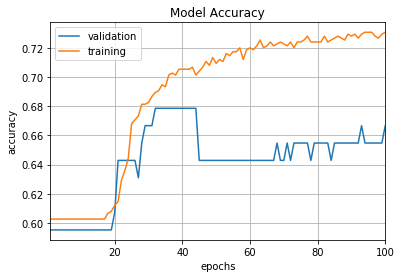

84/84 [==============================] - 0s 60us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [177747416.3809524, 0.6666666695049831]
 best Score: 0.6666666695049831          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 243417562.8800 - acc: 0.5493 - val_loss: 203723946.2857 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 201739843.3600 - acc: 0.6013 - val_loss: 197304869.9048 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 199352174.6133 - acc: 0.6013 - val_loss: 196803928.7619 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 199002066.4000 - acc: 0.6013 - val_loss: 196640778.2857 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 198877176.6933 - acc: 0.6013 - val_loss: 196571772.0000 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 198810474.8800 - acc: 0.6013 - val_loss: 196520512.7619 - val_acc: 0.6071

Epoch 79/100
 - 0s - loss: 180016448.6400 - acc: 0.6760 - val_loss: 179700342.0952 - val_acc: 0.6429
Epoch 80/100
 - 0s - loss: 177875058.7733 - acc: 0.6667 - val_loss: 170190321.9048 - val_acc: 0.6667
Epoch 81/100
 - 0s - loss: 173751141.0133 - acc: 0.6853 - val_loss: 166931760.1905 - val_acc: 0.7024
Epoch 82/100
 - 0s - loss: 172255537.3333 - acc: 0.6947 - val_loss: 164810969.7143 - val_acc: 0.6786
Epoch 83/100
 - 0s - loss: 169222093.0133 - acc: 0.6920 - val_loss: 162143592.7619 - val_acc: 0.7500
Epoch 84/100
 - 0s - loss: 167871984.9067 - acc: 0.7013 - val_loss: 163708016.7619 - val_acc: 0.6667
Epoch 85/100
 - 0s - loss: 165842462.7200 - acc: 0.6960 - val_loss: 158116263.4286 - val_acc: 0.7143
Epoch 86/100
 - 0s - loss: 162995699.2000 - acc: 0.7107 - val_loss: 159609405.9048 - val_acc: 0.6905
Epoch 87/100
 - 0s - loss: 163352292.4267 - acc: 0.6947 - val_loss: 157389038.6667 - val_acc: 0.7024
Epoch 88/100
 - 0s - loss: 163012872.3733 - acc: 0.6973 - val_loss: 153703369.7143 - val_ac

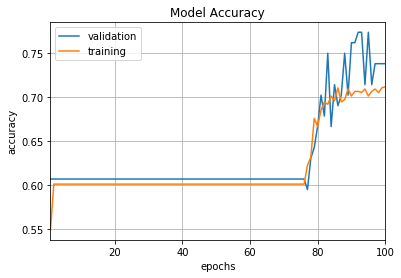

84/84 [==============================] - 0s 74us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [145579030.85714287, 0.738095243771871]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 201361824.9067 - acc: 0.6027 - val_loss: 201424163.2381 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 198449046.6133 - acc: 0.6027 - val_loss: 201439248.3810 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 198365019.0267 - acc: 0.6027 - val_loss: 201458820.7619 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 198294979.4133 - acc: 0.6027 - val_loss: 201463032.0952 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 198277182.0267 - acc: 0.6027 - val_loss: 201462610.0952 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 198239021.4933 - acc: 0.6027 - val_loss: 201437388.0000 - val_acc: 0.5952


Epoch 79/100
 - 0s - loss: 161530630.4533 - acc: 0.7133 - val_loss: 167547224.3810 - val_acc: 0.6786
Epoch 80/100
 - 0s - loss: 161118188.4800 - acc: 0.7160 - val_loss: 167554091.0476 - val_acc: 0.6786
Epoch 81/100
 - 0s - loss: 160633077.4400 - acc: 0.7120 - val_loss: 165925316.0000 - val_acc: 0.6905
Epoch 82/100
 - 0s - loss: 160261718.1333 - acc: 0.7080 - val_loss: 167714209.2381 - val_acc: 0.6905
Epoch 83/100
 - 0s - loss: 160055567.8933 - acc: 0.7133 - val_loss: 167239954.9524 - val_acc: 0.6905
Epoch 84/100
 - 0s - loss: 159673407.2533 - acc: 0.7093 - val_loss: 167665735.5238 - val_acc: 0.6905
Epoch 85/100
 - 0s - loss: 159211790.5600 - acc: 0.7133 - val_loss: 165231040.0000 - val_acc: 0.6905
Epoch 86/100
 - 0s - loss: 158639330.0267 - acc: 0.7200 - val_loss: 163987242.8571 - val_acc: 0.7024
Epoch 87/100
 - 0s - loss: 158441371.4133 - acc: 0.7120 - val_loss: 166424440.2857 - val_acc: 0.6786
Epoch 88/100
 - 0s - loss: 158574584.1600 - acc: 0.7120 - val_loss: 165678164.8571 - val_ac

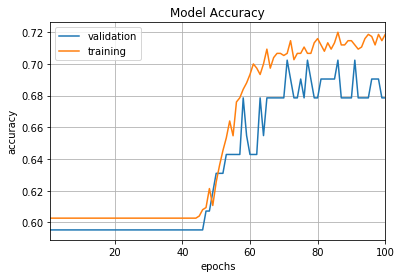

84/84 [==============================] - 0s 49us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [163224000.0, 0.6785714342480614]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 1s - loss: 200106339.4000 - acc: 0.6053 - val_loss: 211124854.8571 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 197435368.0000 - acc: 0.6053 - val_loss: 211379623.8095 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 197212288.8667 - acc: 0.6053 - val_loss: 211538792.7619 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 197141494.0267 - acc: 0.6053 - val_loss: 211646190.4762 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 197107669.2267 - acc: 0.6053 - val_loss: 211694990.4762 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 197095420.8333 - acc: 0.6053 - val_loss: 211734038.4762 - val_acc: 0.5714
Epoch 

Epoch 79/100
 - 0s - loss: 194968547.4933 - acc: 0.6053 - val_loss: 206034229.5238 - val_acc: 0.5714
Epoch 80/100
 - 0s - loss: 194830661.4400 - acc: 0.6053 - val_loss: 205792442.6667 - val_acc: 0.5714
Epoch 81/100
 - 0s - loss: 194732785.9733 - acc: 0.6053 - val_loss: 205584856.0000 - val_acc: 0.5714
Epoch 82/100
 - 0s - loss: 194587552.1600 - acc: 0.6053 - val_loss: 205191153.5238 - val_acc: 0.5714
Epoch 83/100
 - 0s - loss: 194457477.9200 - acc: 0.6053 - val_loss: 204891409.1429 - val_acc: 0.5714
Epoch 84/100
 - 0s - loss: 194297015.5467 - acc: 0.6053 - val_loss: 204510168.7619 - val_acc: 0.5714
Epoch 85/100
 - 0s - loss: 194136971.1467 - acc: 0.6053 - val_loss: 204265964.3810 - val_acc: 0.5714
Epoch 86/100
 - 0s - loss: 193981089.0800 - acc: 0.6053 - val_loss: 203833525.5238 - val_acc: 0.5714
Epoch 87/100
 - 0s - loss: 193765449.7600 - acc: 0.6053 - val_loss: 203527922.0952 - val_acc: 0.5714
Epoch 88/100
 - 0s - loss: 193553558.5600 - acc: 0.6053 - val_loss: 202912815.8095 - val_ac

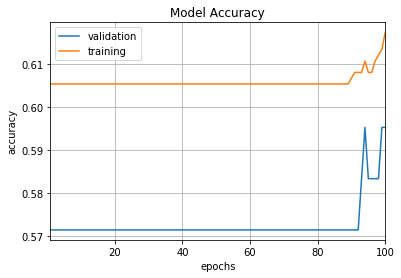

84/84 [==============================] - 0s 97us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [192806272.76190478, 0.5952381009147281]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 299720526.8708 - acc: 0.4008 - val_loss: 313257128.0964 - val_acc: 0.3735
Epoch 2/100
 - 0s - loss: 299613246.7643 - acc: 0.4008 - val_loss: 313255228.9157 - val_acc: 0.3735
Epoch 3/100
 - 0s - loss: 299608615.6698 - acc: 0.4008 - val_loss: 313254524.9157 - val_acc: 0.3735
Epoch 4/100
 - 0s - loss: 299606590.5300 - acc: 0.4008 - val_loss: 313254129.7349 - val_acc: 0.3735
Epoch 5/100
 - 0s - loss: 299605408.8735 - acc: 0.4008 - val_loss: 313253894.5542 - val_acc: 0.3735
Epoch 6/100
 - 0s - loss: 299604514.1731 - acc: 0.4008 - val_loss: 313253738.4096 - val_acc: 0.3735

Epoch 79/100
 - 0s - loss: 299600829.6147 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 80/100
 - 0s - loss: 299600823.7044 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 81/100
 - 0s - loss: 299600822.2423 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 82/100
 - 0s - loss: 299600819.7923 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 83/100
 - 0s - loss: 299600818.7270 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 84/100
 - 0s - loss: 299600814.8921 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 85/100
 - 0s - loss: 299600811.8518 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 86/100
 - 0s - loss: 299600809.4594 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 87/100
 - 0s - loss: 299600806.0506 - acc: 0.4008 - val_loss: 313253075.2771 - val_acc: 0.3735
Epoch 88/100
 - 0s - loss: 299600801.4913 - acc: 0.4008 - val_loss: 313253071.4217 - val_ac

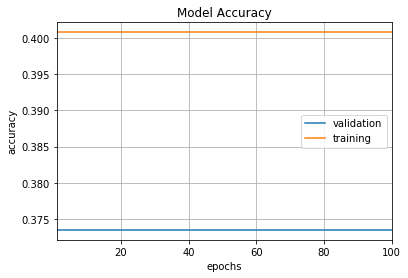

83/83 [==============================] - 0s 45us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [313253068.3373494, 0.3734939766217427]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 200550926.0333 - acc: 0.5992 - val_loss: 186837599.1325 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 199677661.8589 - acc: 0.5992 - val_loss: 186731755.2771 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 198985932.1864 - acc: 0.5992 - val_loss: 186714442.2169 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 197706505.6618 - acc: 0.5992 - val_loss: 188146124.1446 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 195883361.2836 - acc: 0.6032 - val_loss: 186134336.0964 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 193811787.1212 - acc: 0.6099 - val_loss: 185284982.5542 - val_acc: 0.6265


Epoch 79/100
 - 0s - loss: 145427932.9241 - acc: 0.7257 - val_loss: 151148217.5422 - val_acc: 0.6867
Epoch 80/100
 - 0s - loss: 145570935.6911 - acc: 0.7244 - val_loss: 143376392.2892 - val_acc: 0.7229
Epoch 81/100
 - 0s - loss: 146179762.8509 - acc: 0.7270 - val_loss: 146448767.7108 - val_acc: 0.7229
Epoch 82/100
 - 0s - loss: 145482681.4461 - acc: 0.7257 - val_loss: 153177786.9880 - val_acc: 0.6988
Epoch 83/100
 - 0s - loss: 145843525.9542 - acc: 0.7204 - val_loss: 148111100.6265 - val_acc: 0.6988
Epoch 84/100
 - 0s - loss: 144877239.1425 - acc: 0.7230 - val_loss: 144454089.1566 - val_acc: 0.7349
Epoch 85/100
 - 0s - loss: 144892199.7124 - acc: 0.7257 - val_loss: 149605296.3855 - val_acc: 0.6988
Epoch 86/100
 - 0s - loss: 144928156.9933 - acc: 0.7244 - val_loss: 146354563.2771 - val_acc: 0.7229
Epoch 87/100
 - 0s - loss: 144938136.5363 - acc: 0.7270 - val_loss: 148341545.5422 - val_acc: 0.6988
Epoch 88/100
 - 0s - loss: 144779306.6684 - acc: 0.7230 - val_loss: 151172602.6988 - val_ac

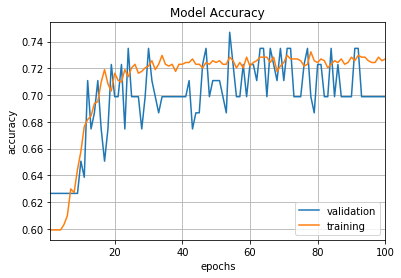

83/83 [==============================] - 0s 81us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [149397822.26506025, 0.6987951800047633]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 1s - loss: 225198373.6425 - acc: 0.5486 - val_loss: 177001517.4940 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 201119325.9001 - acc: 0.5965 - val_loss: 176434935.9036 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 201020058.6418 - acc: 0.5965 - val_loss: 176140762.7952 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 200958565.8482 - acc: 0.5965 - val_loss: 176310646.1687 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 200935796.5806 - acc: 0.5965 - val_loss: 175766583.5181 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 200904056.9880 - acc: 0.5965 - val_loss: 175677528.0964 - val_acc: 0.6506

Epoch 79/100
 - 0s - loss: 196114642.4288 - acc: 0.5992 - val_loss: 176700813.2048 - val_acc: 0.6627
Epoch 80/100
 - 0s - loss: 195980401.1824 - acc: 0.5992 - val_loss: 176766730.4096 - val_acc: 0.6627
Epoch 81/100
 - 0s - loss: 195717469.5599 - acc: 0.5992 - val_loss: 176125005.2048 - val_acc: 0.6627
Epoch 82/100
 - 0s - loss: 195061536.2770 - acc: 0.5992 - val_loss: 175845244.8193 - val_acc: 0.6627
Epoch 83/100
 - 0s - loss: 194450429.4874 - acc: 0.6019 - val_loss: 175851288.7711 - val_acc: 0.6627
Epoch 84/100
 - 0s - loss: 193765813.4541 - acc: 0.6019 - val_loss: 179166888.7711 - val_acc: 0.6627
Epoch 85/100
 - 0s - loss: 193434102.5180 - acc: 0.6072 - val_loss: 175299113.5422 - val_acc: 0.6627
Epoch 86/100
 - 0s - loss: 192571486.1252 - acc: 0.6059 - val_loss: 177742125.1084 - val_acc: 0.6627
Epoch 87/100
 - 0s - loss: 191800474.9055 - acc: 0.6059 - val_loss: 174449209.8313 - val_acc: 0.6627
Epoch 88/100
 - 0s - loss: 190999576.2130 - acc: 0.6099 - val_loss: 173602568.7711 - val_ac

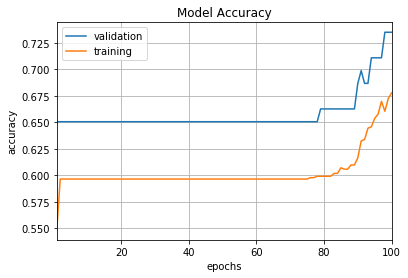

83/83 [==============================] - 0s 71us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [171517111.3253012, 0.7349397568817598]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 199665544.3971 - acc: 0.6005 - val_loss: 192689601.7349 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 199375922.4820 - acc: 0.6005 - val_loss: 192403708.3373 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 199013643.5273 - acc: 0.6005 - val_loss: 192227562.0241 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 198588977.3529 - acc: 0.6005 - val_loss: 191999314.1205 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 198372557.6516 - acc: 0.6005 - val_loss: 191763328.1928 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 198089329.2017 - acc: 0.6005 - val_loss: 191556511.8072 - val_acc: 0.6145


Epoch 79/100
 - 0s - loss: 153834303.2889 - acc: 0.7124 - val_loss: 142970026.5060 - val_acc: 0.7349
Epoch 80/100
 - 0s - loss: 153822083.5499 - acc: 0.7124 - val_loss: 144176406.2651 - val_acc: 0.7349
Epoch 81/100
 - 0s - loss: 153603129.2926 - acc: 0.7137 - val_loss: 144323343.8072 - val_acc: 0.7349
Epoch 82/100
 - 0s - loss: 153506845.3662 - acc: 0.7164 - val_loss: 144561113.1566 - val_acc: 0.7349
Epoch 83/100
 - 0s - loss: 153299316.2517 - acc: 0.7164 - val_loss: 143605712.0964 - val_acc: 0.7349
Epoch 84/100
 - 0s - loss: 153175462.4767 - acc: 0.7190 - val_loss: 145412614.7470 - val_acc: 0.7229
Epoch 85/100
 - 0s - loss: 152900803.3300 - acc: 0.7124 - val_loss: 146599254.6506 - val_acc: 0.7349
Epoch 86/100
 - 0s - loss: 152987907.3822 - acc: 0.7217 - val_loss: 142092045.4940 - val_acc: 0.7349
Epoch 87/100
 - 0s - loss: 152451553.6964 - acc: 0.7177 - val_loss: 141643838.1687 - val_acc: 0.7349
Epoch 88/100
 - 0s - loss: 152687653.9281 - acc: 0.7111 - val_loss: 143110542.4578 - val_ac

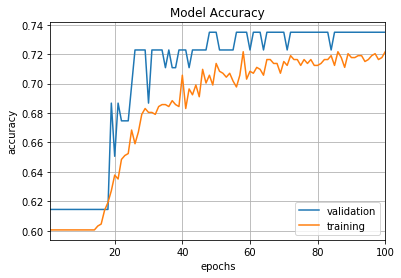

83/83 [==============================] - 0s 111us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [141599910.45783132, 0.7349397654992988]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 250602704.1904 - acc: 0.5180 - val_loss: 225926196.8193 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 197205752.8415 - acc: 0.6099 - val_loss: 229651296.5783 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 195471714.3156 - acc: 0.6099 - val_loss: 231147078.7470 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 195071332.3702 - acc: 0.6099 - val_loss: 231837214.6506 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 194920263.3864 - acc: 0.6099 - val_loss: 232188395.5663 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 194847909.4767 - acc: 0.6099 - val_loss: 232468397.3012 - val_acc: 0.530

Epoch 79/100
 - 0s - loss: 193215772.8935 - acc: 0.6099 - val_loss: 227474903.7108 - val_acc: 0.5301
Epoch 80/100
 - 0s - loss: 193128971.7177 - acc: 0.6099 - val_loss: 227077104.3855 - val_acc: 0.5301
Epoch 81/100
 - 0s - loss: 193068207.7284 - acc: 0.6099 - val_loss: 226858332.9157 - val_acc: 0.5301
Epoch 82/100
 - 0s - loss: 192994255.0839 - acc: 0.6099 - val_loss: 225827445.9759 - val_acc: 0.5301
Epoch 83/100
 - 0s - loss: 192890060.2503 - acc: 0.6099 - val_loss: 225287765.5904 - val_acc: 0.5301
Epoch 84/100
 - 0s - loss: 192814087.2330 - acc: 0.6125 - val_loss: 224958445.6867 - val_acc: 0.5301
Epoch 85/100
 - 0s - loss: 192736218.3702 - acc: 0.6125 - val_loss: 225110842.7952 - val_acc: 0.5301
Epoch 86/100
 - 0s - loss: 192654036.8322 - acc: 0.6125 - val_loss: 225023346.3133 - val_acc: 0.5301
Epoch 87/100
 - 0s - loss: 192578222.7656 - acc: 0.6125 - val_loss: 224734309.3976 - val_acc: 0.5301
Epoch 88/100
 - 0s - loss: 192493810.2104 - acc: 0.6138 - val_loss: 223383509.9759 - val_ac

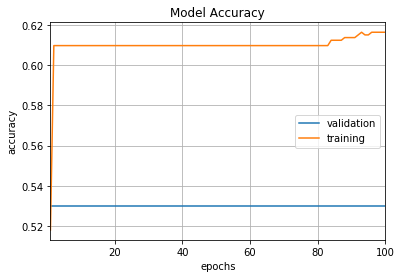

83/83 [==============================] - 0s 78us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [216173224.48192772, 0.5301204848002239]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 2s - loss: 199065823.7728 - acc: 0.6019 - val_loss: 198794998.3614 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 199037474.4607 - acc: 0.6019 - val_loss: 198930945.7349 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 198025028.1079 - acc: 0.6019 - val_loss: 199227133.6867 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 196153156.7790 - acc: 0.6019 - val_loss: 199744266.0241 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 193711858.4607 - acc: 0.6032 - val_loss: 198603322.7952 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 192347165.5819 - acc: 0.6045 - val_loss: 197426146.1205 - val_acc: 0.602

Epoch 79/100
 - 0s - loss: 148731904.8682 - acc: 0.7190 - val_loss: 147197390.0723 - val_acc: 0.7108
Epoch 80/100
 - 0s - loss: 148781735.0892 - acc: 0.7217 - val_loss: 146150567.1325 - val_acc: 0.7108
Epoch 81/100
 - 0s - loss: 148416989.7630 - acc: 0.7190 - val_loss: 146598857.8313 - val_acc: 0.7108
Epoch 82/100
 - 0s - loss: 148228481.4593 - acc: 0.7230 - val_loss: 148819942.1687 - val_acc: 0.7108
Epoch 83/100
 - 0s - loss: 148533358.7681 - acc: 0.7204 - val_loss: 147847691.7590 - val_acc: 0.7108
Epoch 84/100
 - 0s - loss: 148200915.1748 - acc: 0.7190 - val_loss: 147627126.3614 - val_acc: 0.7108
Epoch 85/100
 - 0s - loss: 147771761.5593 - acc: 0.7204 - val_loss: 143669220.8193 - val_acc: 0.7470
Epoch 86/100
 - 0s - loss: 148073616.8043 - acc: 0.7177 - val_loss: 146896516.8193 - val_acc: 0.7108
Epoch 87/100
 - 0s - loss: 147821755.2543 - acc: 0.7230 - val_loss: 148608299.1807 - val_acc: 0.7108
Epoch 88/100
 - 0s - loss: 147552017.1558 - acc: 0.7217 - val_loss: 147717301.3976 - val_ac

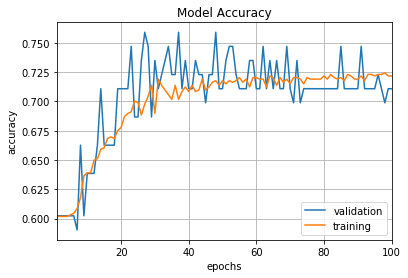

83/83 [==============================] - 0s 118us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [144988196.43373495, 0.7108433763664889]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------




In [15]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_absolute_percentage_error,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [16]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.738095243771871
0.646170398861392


[[177747416.3809524, 0.6666666695049831],
 [145579030.85714287, 0.738095243771871],
 [163224000.0, 0.6785714342480614],
 [192806272.76190478, 0.5952381009147281],
 [313253068.3373494, 0.3734939766217427],
 [149397822.26506025, 0.6987951800047633],
 [171517111.3253012, 0.7349397568817598],
 [141599910.45783132, 0.7349397654992988],
 [216173224.48192772, 0.5301204848002239],
 [144988196.43373495, 0.7108433763664889]]

In [17]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6644179346012477


[0.730666670401891,
 0.7120000032583872,
 0.718666668732961,
 0.6173333400487899,
 0.4007989432062512,
 0.727030626625894,
 0.6777629819754437,
 0.7217043944586133,
 0.6165113228456317,
 0.7217043944586133]

# 04 # losses.mean_squared_logarithmic_error,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1232 - acc: 0.5853 - val_loss: 0.1147 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.1157 - acc: 0.6067 - val_loss: 0.1146 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.1143 - acc: 0.6120 - val_loss: 0.1145 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.1129 - acc: 0.6173 - val_loss: 0.1141 - val_acc: 0.5238
Epoch 5/100
 - 0s - loss: 0.1122 - acc: 0.6280 - val_loss: 0.1118 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.1108 - acc: 0.6293 - val_loss: 0.1110 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.1092 - acc: 0.6453 - val_loss: 0.1130 - val_acc: 0.6071
Epoch 8/100
 - 0s - loss: 0.1086 - acc: 0.6373 - val_loss: 0.1104 - val_acc: 0.5595
Epoch 9/100
 - 0s - loss: 0.1073 - acc: 0.6453 - val_loss: 0.1096 - val_acc: 0.5833
Epoch 10/100
 - 0s - loss: 0.1017 - acc: 0.6867 - val_loss: 0.1074 - val_acc: 0.6190
Epoch 11/100
 - 0s - loss: 0.0994 - acc: 0.6960 - val_loss: 0.1140 - val_acc: 0.6190
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0930 - acc: 0.7267 - val_loss: 0.1090 - val_acc: 0.6190
Epoch 98/100
 - 0s - loss: 0.0930 - acc: 0.7280 - val_loss: 0.1093 - val_acc: 0.5952
Epoch 99/100
 - 0s - loss: 0.0930 - acc: 0.7240 - val_loss: 0.1090 - val_acc: 0.6190
Epoch 100/100
 - 0s - loss: 0.0933 - acc: 0.7267 - val_loss: 0.1090 - val_acc: 0.6190


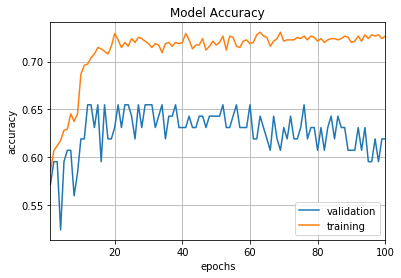

84/84 [==============================] - 0s 63us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10899066960527784, 0.6190476190476191]
 best Score: 0.6190476190476191          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1413 - acc: 0.5693 - val_loss: 0.1065 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.1097 - acc: 0.6373 - val_loss: 0.1067 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.1089 - acc: 0.6360 - val_loss: 0.1040 - val_acc: 0.7262
Epoch 4/100
 - 0s - loss: 0.1068 - acc: 0.6760 - val_loss: 0.1010 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: 0.1058 - acc: 0.6680 - val_loss: 0.1005 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.1054 - acc: 0.6787 - val_loss: 0.0991 - val_acc: 0.7143
Epoch 7/100
 - 0s - loss: 0.1040 - acc: 0.6867 - val_loss: 0.0984 - val_acc: 0.7143
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0961 - acc: 0.7107 - val_loss: 0.0909 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.0960 - acc: 0.7093 - val_loss: 0.0909 - val_acc: 0.7619
Epoch 95/100
 - 0s - loss: 0.0960 - acc: 0.7133 - val_loss: 0.0915 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.0960 - acc: 0.7173 - val_loss: 0.0912 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.0960 - acc: 0.7133 - val_loss: 0.0909 - val_acc: 0.7619
Epoch 98/100
 - 0s - loss: 0.0961 - acc: 0.7120 - val_loss: 0.0912 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.0960 - acc: 0.7147 - val_loss: 0.0911 - val_acc: 0.7619
Epoch 100/100
 - 0s - loss: 0.0959 - acc: 0.7133 - val_loss: 0.0913 - val_acc: 0.7500


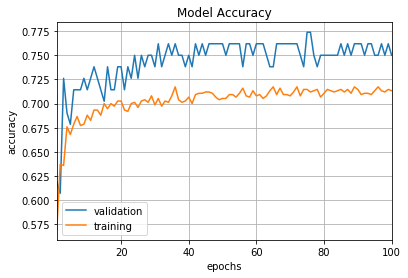

84/84 [==============================] - 0s 184us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.09131834868873868, 0.7499999971616835]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 2s - loss: 0.1233 - acc: 0.5787 - val_loss: 0.1208 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.1186 - acc: 0.5960 - val_loss: 0.1212 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.1176 - acc: 0.6027 - val_loss: 0.1156 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.1165 - acc: 0.5987 - val_loss: 0.1151 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.1165 - acc: 0.6133 - val_loss: 0.1145 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.1156 - acc: 0.6053 - val_loss: 0.1137 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.1152 - acc: 0.6120 - val_loss: 0.1133 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0978 - acc: 0.7120 - val_loss: 0.0911 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.0979 - acc: 0.7027 - val_loss: 0.0915 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.0978 - acc: 0.7133 - val_loss: 0.0916 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.0978 - acc: 0.7107 - val_loss: 0.0919 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.0977 - acc: 0.7160 - val_loss: 0.0916 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.0979 - acc: 0.7107 - val_loss: 0.0912 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.0976 - acc: 0.7173 - val_loss: 0.0906 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.0976 - acc: 0.7080 - val_loss: 0.0909 - val_acc: 0.7143


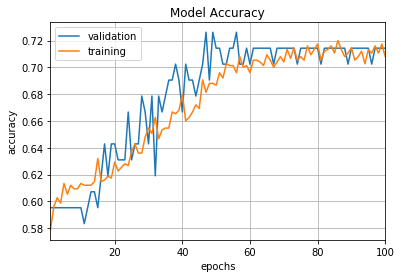

84/84 [==============================] - 0s 270us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.09089919250635874, 0.7142857086090815]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 3s - loss: 0.1173 - acc: 0.5800 - val_loss: 0.1130 - val_acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.1127 - acc: 0.6240 - val_loss: 0.1111 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.1116 - acc: 0.6120 - val_loss: 0.1109 - val_acc: 0.6905
Epoch 4/100
 - 0s - loss: 0.1099 - acc: 0.6373 - val_loss: 0.1164 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.1097 - acc: 0.6307 - val_loss: 0.1086 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 0.1096 - acc: 0.6280 - val_loss: 0.1105 - val_acc: 0.5833
Epoch 7/100
 - 0s - loss: 0.1084 - acc: 0.6507 - val_loss: 0.1112 - val_acc: 0.5714
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0960 - acc: 0.7293 - val_loss: 0.0953 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.0963 - acc: 0.7213 - val_loss: 0.0963 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.0962 - acc: 0.7133 - val_loss: 0.0954 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.0959 - acc: 0.7307 - val_loss: 0.0954 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.0962 - acc: 0.7253 - val_loss: 0.0957 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.0962 - acc: 0.7280 - val_loss: 0.0964 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.0961 - acc: 0.7173 - val_loss: 0.0953 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.0962 - acc: 0.7320 - val_loss: 0.0959 - val_acc: 0.7381


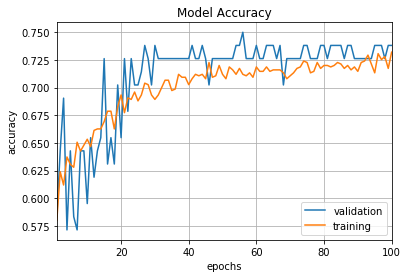

84/84 [==============================] - 0s 120us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.09590683096931094, 0.7380952380952381]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1172 - acc: 0.5992 - val_loss: 0.1193 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.1163 - acc: 0.5992 - val_loss: 0.1157 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.1161 - acc: 0.5992 - val_loss: 0.1158 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.1159 - acc: 0.5992 - val_loss: 0.1156 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1155 - acc: 0.5992 - val_loss: 0.1155 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.1156 - acc: 0.5992 - val_loss: 0.1158 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.1155 - acc: 0.5992 - val_loss: 0.1154 - val_acc: 0.6265
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0999 - acc: 0.7097 - val_loss: 0.1067 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.0997 - acc: 0.7097 - val_loss: 0.1064 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0996 - acc: 0.7097 - val_loss: 0.1062 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.0994 - acc: 0.7097 - val_loss: 0.1064 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.0993 - acc: 0.7230 - val_loss: 0.1064 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.0994 - acc: 0.7111 - val_loss: 0.1065 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.0992 - acc: 0.7137 - val_loss: 0.1061 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.0991 - acc: 0.7164 - val_loss: 0.1060 - val_acc: 0.6867


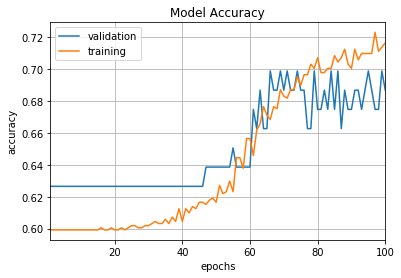

83/83 [==============================] - 0s 88us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.10596058975501232, 0.6867469857974224]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1245 - acc: 0.5593 - val_loss: 0.1236 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.1200 - acc: 0.6019 - val_loss: 0.1343 - val_acc: 0.3494
Epoch 3/100
 - 0s - loss: 0.1178 - acc: 0.6019 - val_loss: 0.1160 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.1170 - acc: 0.6059 - val_loss: 0.1159 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1159 - acc: 0.6032 - val_loss: 0.1171 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.1158 - acc: 0.6112 - val_loss: 0.1154 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.1149 - acc: 0.6192 - val_loss: 0.1148 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0958 - acc: 0.7124 - val_loss: 0.0965 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.0964 - acc: 0.7124 - val_loss: 0.0925 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.0964 - acc: 0.7111 - val_loss: 0.0921 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.0960 - acc: 0.7204 - val_loss: 0.0943 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.0960 - acc: 0.7204 - val_loss: 0.0925 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.0962 - acc: 0.7257 - val_loss: 0.0921 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.0959 - acc: 0.7164 - val_loss: 0.0919 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.0959 - acc: 0.7217 - val_loss: 0.0936 - val_acc: 0.6867


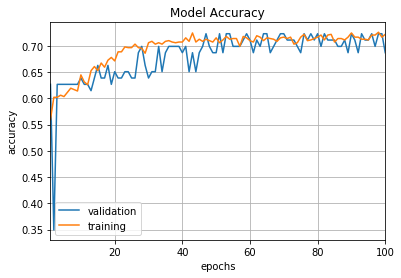

83/83 [==============================] - 0s 71us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.09361092988626067, 0.6867469904652561]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1202 - acc: 0.5965 - val_loss: 0.1108 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.1172 - acc: 0.5979 - val_loss: 0.1108 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.1164 - acc: 0.5979 - val_loss: 0.1106 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 0.1159 - acc: 0.5979 - val_loss: 0.1096 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.1156 - acc: 0.5992 - val_loss: 0.1101 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.1155 - acc: 0.6005 - val_loss: 0.1118 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.1149 - acc: 0.5992 - val_loss: 0.1095 - val_acc: 0.6506
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0989 - acc: 0.7230 - val_loss: 0.1005 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.0990 - acc: 0.7217 - val_loss: 0.1005 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.0988 - acc: 0.7310 - val_loss: 0.0998 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.0988 - acc: 0.7257 - val_loss: 0.0993 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.0987 - acc: 0.7204 - val_loss: 0.0989 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.0987 - acc: 0.7230 - val_loss: 0.0989 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.0986 - acc: 0.7270 - val_loss: 0.0987 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.0987 - acc: 0.7244 - val_loss: 0.0985 - val_acc: 0.6747


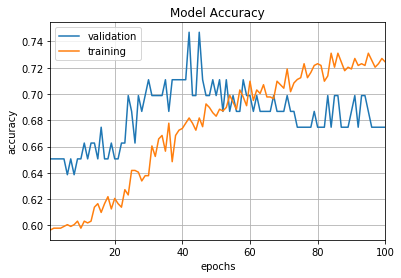

83/83 [==============================] - 0s 279us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.0984972070857703, 0.6746987980532358]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1209 - acc: 0.5766 - val_loss: 0.1174 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1172 - acc: 0.5992 - val_loss: 0.1126 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1154 - acc: 0.6019 - val_loss: 0.1114 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1143 - acc: 0.6005 - val_loss: 0.1120 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1144 - acc: 0.6019 - val_loss: 0.1138 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.1140 - acc: 0.6019 - val_loss: 0.1108 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1136 - acc: 0.5992 - val_loss: 0.1145 - val_acc: 0.7229
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0968 - acc: 0.7230 - val_loss: 0.0929 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.0968 - acc: 0.7190 - val_loss: 0.0930 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.0964 - acc: 0.7217 - val_loss: 0.0929 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.0966 - acc: 0.7177 - val_loss: 0.0928 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.0966 - acc: 0.7244 - val_loss: 0.0939 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.0965 - acc: 0.7204 - val_loss: 0.0939 - val_acc: 0.7470
Epoch 99/100
 - 0s - loss: 0.0965 - acc: 0.7217 - val_loss: 0.0942 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.0963 - acc: 0.7230 - val_loss: 0.0928 - val_acc: 0.7470


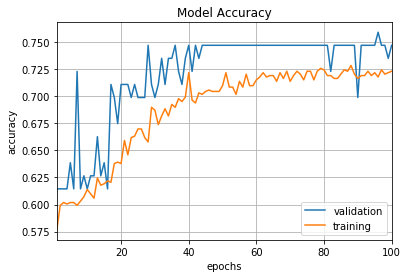

83/83 [==============================] - 0s 106us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.09282756919961378, 0.7469879582703832]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 3s - loss: 0.1174 - acc: 0.5965 - val_loss: 0.1203 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.1159 - acc: 0.6099 - val_loss: 0.1198 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.1160 - acc: 0.6099 - val_loss: 0.1208 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.1157 - acc: 0.6099 - val_loss: 0.1194 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.1155 - acc: 0.6099 - val_loss: 0.1200 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.1153 - acc: 0.6099 - val_loss: 0.1205 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.1153 - acc: 0.6099 - val_loss: 0.1203 - val_acc: 0.5301
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1064 - acc: 0.6658 - val_loss: 0.1078 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.1063 - acc: 0.6551 - val_loss: 0.1067 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.1061 - acc: 0.6684 - val_loss: 0.1064 - val_acc: 0.6265
Epoch 96/100
 - 0s - loss: 0.1060 - acc: 0.6671 - val_loss: 0.1069 - val_acc: 0.6145
Epoch 97/100
 - 0s - loss: 0.1059 - acc: 0.6671 - val_loss: 0.1069 - val_acc: 0.6145
Epoch 98/100
 - 0s - loss: 0.1057 - acc: 0.6658 - val_loss: 0.1062 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.1056 - acc: 0.6738 - val_loss: 0.1062 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.1054 - acc: 0.6671 - val_loss: 0.1060 - val_acc: 0.6265


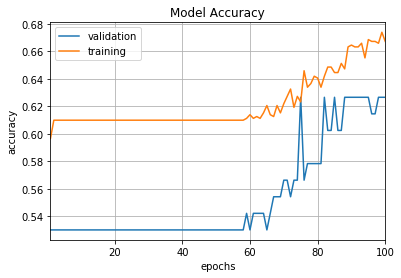

83/83 [==============================] - 0s 115us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.10597905265279563, 0.6265060269688986]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.1178 - acc: 0.5952 - val_loss: 0.1171 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1106 - acc: 0.6125 - val_loss: 0.1140 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1075 - acc: 0.6551 - val_loss: 0.1108 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.1064 - acc: 0.6471 - val_loss: 0.1088 - val_acc: 0.6988
Epoch 5/100
 - 0s - loss: 0.1054 - acc: 0.6525 - val_loss: 0.1093 - val_acc: 0.6627
Epoch 6/100
 - 0s - loss: 0.1043 - acc: 0.6618 - val_loss: 0.1072 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.1020 - acc: 0.6751 - val_loss: 0.1082 - val_acc: 0.6747
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0939 - acc: 0.7244 - val_loss: 0.1068 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.0938 - acc: 0.7244 - val_loss: 0.1080 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.0942 - acc: 0.7310 - val_loss: 0.1071 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.0936 - acc: 0.7217 - val_loss: 0.1072 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.0939 - acc: 0.7270 - val_loss: 0.1075 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.0939 - acc: 0.7270 - val_loss: 0.1068 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.0938 - acc: 0.7230 - val_loss: 0.1070 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.0940 - acc: 0.7270 - val_loss: 0.1069 - val_acc: 0.6988


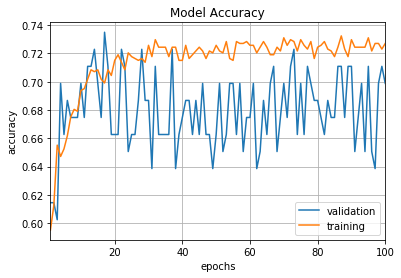

83/83 [==============================] - 0s 130us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.1068640095462282, 0.6987951749778656]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------




In [18]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.mean_squared_logarithmic_error,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7499999971616835
0.6941910497446684


[[0.10899066960527784, 0.6190476190476191],
 [0.09131834868873868, 0.7499999971616835],
 [0.09089919250635874, 0.7142857086090815],
 [0.09590683096931094, 0.7380952380952381],
 [0.10596058975501232, 0.6867469857974224],
 [0.09361092988626067, 0.6867469904652561],
 [0.0984972070857703, 0.6746987980532358],
 [0.09282756919961378, 0.7469879582703832],
 [0.10597905265279563, 0.6265060269688986],
 [0.1068640095462282, 0.6987951749778656]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7159627176961314


[0.7266666658719381,
 0.7133333345254262,
 0.7079999995231628,
 0.7320000036557516,
 0.716378165466014,
 0.721704396045954,
 0.7243675081612426,
 0.7230359506353081,
 0.6671105244664473,
 0.72703062861007]

# 05 #losses.squared_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6231 - acc: 0.5920 - val_loss: 0.6162 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.6161 - acc: 0.6080 - val_loss: 0.6156 - val_acc: 0.6310
Epoch 3/100
 - 0s - loss: 0.6144 - acc: 0.6280 - val_loss: 0.6143 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.6143 - acc: 0.6333 - val_loss: 0.6149 - val_acc: 0.6310
Epoch 5/100
 - 0s - loss: 0.6128 - acc: 0.6320 - val_loss: 0.6145 - val_acc: 0.6429
Epoch 6/100
 - 0s - loss: 0.6123 - acc: 0.6347 - val_loss: 0.6134 - val_acc: 0.6310
Epoch 7/100
 - 0s - loss: 0.6115 - acc: 0.6453 - val_loss: 0.6131 - val_acc: 0.6310
Epoch 8/100
 - 0s - loss: 0.6116 - acc: 0.6320 - val_loss: 0.6130 - val_acc: 0.6429
Epoch 9/100
 - 0s - loss: 0.6106 - acc: 0.6480 - val_loss: 0.6134 - val_acc: 0.6310
Epoch 10/100
 - 0s - loss: 0.6100 - acc: 0.6507 - val_loss: 0.6128 - val_acc: 0.6310
Epoch 11/100
 - 0s - loss: 0.6096 - acc: 0.6613 - val_loss: 0.6125 - val_acc: 0.6310
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5980 - acc: 0.7253 - val_loss: 0.6095 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.5981 - acc: 0.7160 - val_loss: 0.6095 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.5983 - acc: 0.7160 - val_loss: 0.6094 - val_acc: 0.6429
Epoch 100/100
 - 0s - loss: 0.5983 - acc: 0.7240 - val_loss: 0.6094 - val_acc: 0.6429


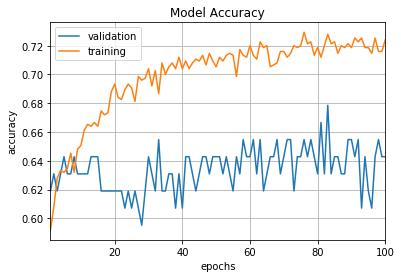

84/84 [==============================] - 0s 135us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6093856522015163, 0.6428571428571429]
 best Score: 0.6428571428571429          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6398 - acc: 0.5693 - val_loss: 0.6152 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.6163 - acc: 0.5920 - val_loss: 0.6121 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6147 - acc: 0.6187 - val_loss: 0.6179 - val_acc: 0.6548
Epoch 4/100
 - 0s - loss: 0.6117 - acc: 0.6413 - val_loss: 0.6125 - val_acc: 0.6667
Epoch 5/100
 - 0s - loss: 0.6114 - acc: 0.6427 - val_loss: 0.6112 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.6113 - acc: 0.6360 - val_loss: 0.6084 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.6098 - acc: 0.6573 - val_loss: 0.6114 - val_acc: 0.6786
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5990 - acc: 0.7053 - val_loss: 0.5967 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5990 - acc: 0.7133 - val_loss: 0.5970 - val_acc: 0.7857
Epoch 95/100
 - 0s - loss: 0.5988 - acc: 0.7173 - val_loss: 0.5974 - val_acc: 0.7857
Epoch 96/100
 - 0s - loss: 0.5986 - acc: 0.7160 - val_loss: 0.5961 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.5984 - acc: 0.7147 - val_loss: 0.5975 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.5988 - acc: 0.7120 - val_loss: 0.5984 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.5987 - acc: 0.7067 - val_loss: 0.5978 - val_acc: 0.7738
Epoch 100/100
 - 0s - loss: 0.5988 - acc: 0.7093 - val_loss: 0.5961 - val_acc: 0.7381


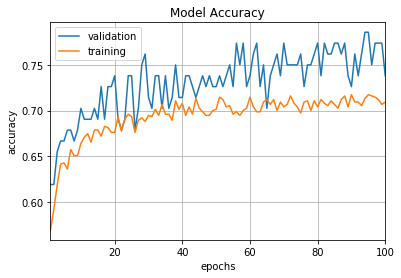

84/84 [==============================] - 0s 155us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5961046587853205, 0.738095243771871]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6194 - acc: 0.6187 - val_loss: 0.6106 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6120 - acc: 0.6307 - val_loss: 0.6213 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6112 - acc: 0.6467 - val_loss: 0.6073 - val_acc: 0.6310
Epoch 4/100
 - 0s - loss: 0.6090 - acc: 0.6520 - val_loss: 0.6068 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6106 - acc: 0.6347 - val_loss: 0.6056 - val_acc: 0.6905
Epoch 6/100
 - 0s - loss: 0.6081 - acc: 0.6653 - val_loss: 0.6065 - val_acc: 0.7500
Epoch 7/100
 - 0s - loss: 0.6079 - acc: 0.6480 - val_loss: 0.6046 - val_acc: 0.6429
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5972 - acc: 0.7200 - val_loss: 0.5921 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5971 - acc: 0.7307 - val_loss: 0.5938 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.5976 - acc: 0.7213 - val_loss: 0.5918 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5977 - acc: 0.7147 - val_loss: 0.5923 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5971 - acc: 0.7227 - val_loss: 0.5930 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5974 - acc: 0.7227 - val_loss: 0.5921 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5972 - acc: 0.7200 - val_loss: 0.5930 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.5975 - acc: 0.7173 - val_loss: 0.5931 - val_acc: 0.7381


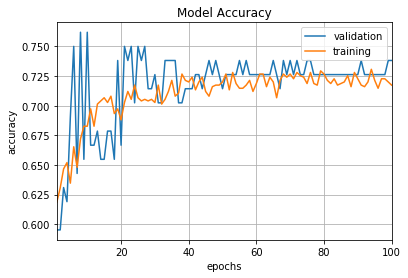

84/84 [==============================] - 0s 149us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5930877356302171, 0.7380952409335545]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 4s - loss: 0.6276 - acc: 0.5653 - val_loss: 0.6239 - val_acc: 0.5357
Epoch 2/100
 - 0s - loss: 0.6211 - acc: 0.6080 - val_loss: 0.6238 - val_acc: 0.5595
Epoch 3/100
 - 0s - loss: 0.6192 - acc: 0.6333 - val_loss: 0.6228 - val_acc: 0.5476
Epoch 4/100
 - 0s - loss: 0.6186 - acc: 0.6333 - val_loss: 0.6226 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.6170 - acc: 0.6360 - val_loss: 0.6193 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6158 - acc: 0.6373 - val_loss: 0.6202 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.6150 - acc: 0.6200 - val_loss: 0.6164 - val_acc: 0.6071
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5967 - acc: 0.7173 - val_loss: 0.5981 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.5969 - acc: 0.7133 - val_loss: 0.5983 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.5970 - acc: 0.7187 - val_loss: 0.5988 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5967 - acc: 0.7067 - val_loss: 0.6002 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5971 - acc: 0.7160 - val_loss: 0.5988 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.5970 - acc: 0.7160 - val_loss: 0.5984 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.5968 - acc: 0.7200 - val_loss: 0.5991 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.5970 - acc: 0.7120 - val_loss: 0.5985 - val_acc: 0.7143


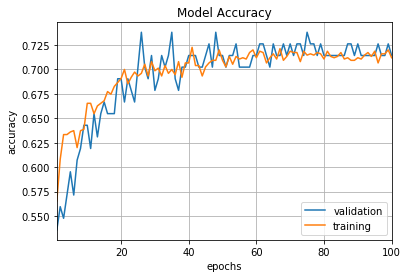

84/84 [==============================] - 0s 115us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5984520287740798, 0.7142857114473978]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6221 - acc: 0.6085 - val_loss: 0.6201 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6166 - acc: 0.6019 - val_loss: 0.6172 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6150 - acc: 0.6099 - val_loss: 0.6155 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6125 - acc: 0.6232 - val_loss: 0.6240 - val_acc: 0.4819
Epoch 5/100
 - 0s - loss: 0.6115 - acc: 0.6511 - val_loss: 0.6122 - val_acc: 0.6386
Epoch 6/100
 - 0s - loss: 0.6099 - acc: 0.6551 - val_loss: 0.6143 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6090 - acc: 0.6551 - val_loss: 0.6142 - val_acc: 0.6747
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5961 - acc: 0.7284 - val_loss: 0.6051 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5961 - acc: 0.7284 - val_loss: 0.6055 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5960 - acc: 0.7284 - val_loss: 0.6054 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5963 - acc: 0.7230 - val_loss: 0.6050 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5960 - acc: 0.7297 - val_loss: 0.6051 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5959 - acc: 0.7270 - val_loss: 0.6060 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5961 - acc: 0.7284 - val_loss: 0.6069 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5962 - acc: 0.7284 - val_loss: 0.6061 - val_acc: 0.6988


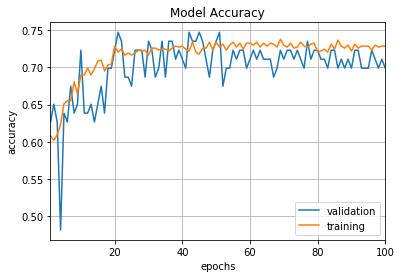

83/83 [==============================] - 0s 229us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6060759568788919, 0.6987951785685068]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6182 - acc: 0.6005 - val_loss: 0.6187 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6171 - acc: 0.5992 - val_loss: 0.6154 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6161 - acc: 0.5992 - val_loss: 0.6140 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6159 - acc: 0.5992 - val_loss: 0.6140 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6154 - acc: 0.5992 - val_loss: 0.6131 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6149 - acc: 0.6005 - val_loss: 0.6126 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6146 - acc: 0.5992 - val_loss: 0.6128 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5981 - acc: 0.7284 - val_loss: 0.5968 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5982 - acc: 0.7270 - val_loss: 0.5974 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5971 - acc: 0.7284 - val_loss: 0.5975 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5985 - acc: 0.7230 - val_loss: 0.5965 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5978 - acc: 0.7270 - val_loss: 0.5974 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.5986 - acc: 0.7150 - val_loss: 0.5964 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.5977 - acc: 0.7230 - val_loss: 0.5963 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5981 - acc: 0.7324 - val_loss: 0.5966 - val_acc: 0.7108


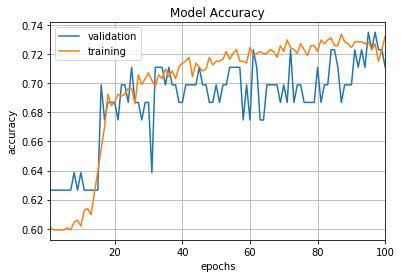

83/83 [==============================] - 0s 98us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5966437760605869, 0.7108433677489499]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6230 - acc: 0.5859 - val_loss: 0.6118 - val_acc: 0.6386
Epoch 2/100
 - 0s - loss: 0.6177 - acc: 0.5912 - val_loss: 0.6115 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6164 - acc: 0.6125 - val_loss: 0.6097 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.6151 - acc: 0.6152 - val_loss: 0.6097 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.6132 - acc: 0.6312 - val_loss: 0.6094 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6131 - acc: 0.6125 - val_loss: 0.6073 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.6114 - acc: 0.6338 - val_loss: 0.6142 - val_acc: 0.6627
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5962 - acc: 0.7204 - val_loss: 0.6038 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.5963 - acc: 0.7190 - val_loss: 0.6034 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.5964 - acc: 0.7190 - val_loss: 0.6000 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.5964 - acc: 0.7257 - val_loss: 0.6024 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5964 - acc: 0.7257 - val_loss: 0.6022 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5959 - acc: 0.7230 - val_loss: 0.6001 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7190 - val_loss: 0.6002 - val_acc: 0.6506
Epoch 100/100
 - 0s - loss: 0.5963 - acc: 0.7310 - val_loss: 0.6020 - val_acc: 0.6747


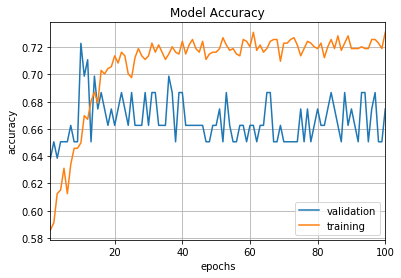

83/83 [==============================] - 0s 87us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6020322047084211, 0.6746987930263382]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6212 - acc: 0.6272 - val_loss: 0.6314 - val_acc: 0.5181
Epoch 2/100
 - 0s - loss: 0.6103 - acc: 0.6471 - val_loss: 0.6397 - val_acc: 0.5181
Epoch 3/100
 - 0s - loss: 0.6086 - acc: 0.6565 - val_loss: 0.6142 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6068 - acc: 0.6831 - val_loss: 0.6032 - val_acc: 0.6747
Epoch 5/100
 - 0s - loss: 0.6058 - acc: 0.6924 - val_loss: 0.6024 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.6049 - acc: 0.6818 - val_loss: 0.6015 - val_acc: 0.7108
Epoch 7/100
 - 0s - loss: 0.6042 - acc: 0.6964 - val_loss: 0.6012 - val_acc: 0.6867
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.5967 - acc: 0.7204 - val_loss: 0.5943 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.5967 - acc: 0.7270 - val_loss: 0.5945 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5967 - acc: 0.7257 - val_loss: 0.5942 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5967 - acc: 0.7217 - val_loss: 0.5941 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.5967 - acc: 0.7297 - val_loss: 0.5942 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.5967 - acc: 0.7257 - val_loss: 0.5949 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.5964 - acc: 0.7230 - val_loss: 0.5941 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.5963 - acc: 0.7257 - val_loss: 0.5954 - val_acc: 0.7229


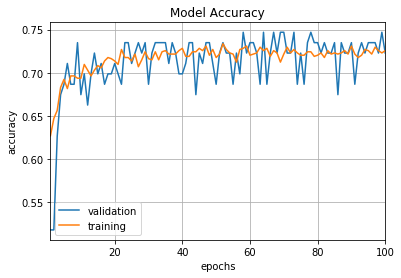

83/83 [==============================] - 0s 121us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5953768060868045, 0.7228915677013168]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 4s - loss: 0.6553 - acc: 0.6085 - val_loss: 0.6462 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.6185 - acc: 0.6045 - val_loss: 0.6298 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.6160 - acc: 0.6152 - val_loss: 0.6255 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.6166 - acc: 0.6138 - val_loss: 0.6183 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.6159 - acc: 0.6112 - val_loss: 0.6168 - val_acc: 0.7590
Epoch 6/100
 - 0s - loss: 0.6168 - acc: 0.6178 - val_loss: 0.6158 - val_acc: 0.6627
Epoch 7/100
 - 0s - loss: 0.6157 - acc: 0.6178 - val_loss: 0.6207 - val_acc: 0.5301
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6115 - acc: 0.6471 - val_loss: 0.6065 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.6116 - acc: 0.6458 - val_loss: 0.6075 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.6115 - acc: 0.6431 - val_loss: 0.6075 - val_acc: 0.6145
Epoch 96/100
 - 0s - loss: 0.6113 - acc: 0.6391 - val_loss: 0.6069 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.6114 - acc: 0.6445 - val_loss: 0.6065 - val_acc: 0.6265
Epoch 98/100
 - 0s - loss: 0.6114 - acc: 0.6458 - val_loss: 0.6080 - val_acc: 0.6024
Epoch 99/100
 - 0s - loss: 0.6113 - acc: 0.6458 - val_loss: 0.6065 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.6113 - acc: 0.6485 - val_loss: 0.6062 - val_acc: 0.6265


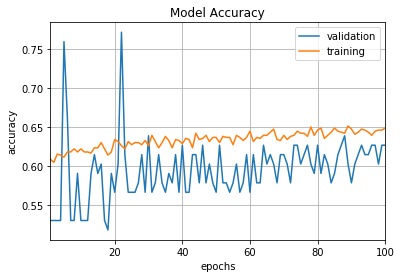

83/83 [==============================] - 0s 146us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6062068314437407, 0.6265060219420008]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.6192 - acc: 0.5979 - val_loss: 0.6224 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6169 - acc: 0.6045 - val_loss: 0.6193 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6162 - acc: 0.6059 - val_loss: 0.6177 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.6153 - acc: 0.6045 - val_loss: 0.6169 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.6148 - acc: 0.6085 - val_loss: 0.6208 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6145 - acc: 0.6045 - val_loss: 0.6162 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6139 - acc: 0.6045 - val_loss: 0.6180 - val_acc: 0.6024
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5968 - acc: 0.7204 - val_loss: 0.6059 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5967 - acc: 0.7270 - val_loss: 0.6063 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5967 - acc: 0.7257 - val_loss: 0.6053 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5969 - acc: 0.7204 - val_loss: 0.6058 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5967 - acc: 0.7230 - val_loss: 0.6056 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5966 - acc: 0.7204 - val_loss: 0.6051 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.5962 - acc: 0.7297 - val_loss: 0.6068 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5966 - acc: 0.7204 - val_loss: 0.6066 - val_acc: 0.6988


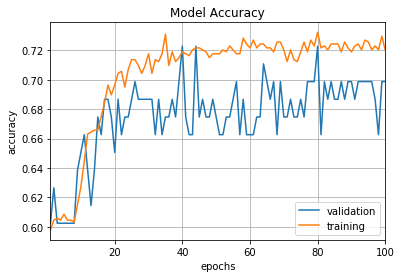

83/83 [==============================] - 0s 155us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.60659743863416, 0.6987951749778656]
 best Score: 0.738095243771871          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.squared_hinge,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.738095243771871
0.6965863442974944


[[0.6093856522015163, 0.6428571428571429],
 [0.5961046587853205, 0.738095243771871],
 [0.5930877356302171, 0.7380952409335545],
 [0.5984520287740798, 0.7142857114473978],
 [0.6060759568788919, 0.6987951785685068],
 [0.5966437760605869, 0.7108433677489499],
 [0.6020322047084211, 0.6746987930263382],
 [0.5953768060868045, 0.7228915677013168],
 [0.6062068314437407, 0.6265060219420008],
 [0.60659743863416, 0.6987951749778656]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7148951632133126


[0.7240000021457672,
 0.7093333343664805,
 0.7173333350817362,
 0.7120000004768372,
 0.7283621848661319,
 0.732356859110643,
 0.7310252997592667,
 0.7256990664014804,
 0.6484687125952678,
 0.7203728373295141]

# 06 #losses.hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.7098 - acc: 0.5907 - val_loss: 0.7020 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6987 - acc: 0.6027 - val_loss: 0.7014 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6983 - acc: 0.6027 - val_loss: 0.7013 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6982 - acc: 0.6027 - val_loss: 0.7012 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6981 - acc: 0.6027 - val_loss: 0.7012 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6980 - acc: 0.6027 - val_loss: 0.7010 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6979 - acc: 0.6027 - val_loss: 0.7010 - val_acc: 0.5952
Epoch 8/100
 - 0s - loss: 0.6977 - acc: 0.6027 - val_loss: 0.7009 - val_acc: 0.5952
Epoch 9/100
 - 0s - loss: 0.6976 - acc: 0.6027 - val_loss: 0.7008 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 0.6975 - acc: 0.6027 - val_loss: 0.7007 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.6973 - acc: 0.6027 - val_loss: 0.7006 - val_acc: 0.5952
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.6392 - acc: 0.7413 - val_loss: 0.6842 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.6393 - acc: 0.7347 - val_loss: 0.6837 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.6392 - acc: 0.7387 - val_loss: 0.6838 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.6388 - acc: 0.7387 - val_loss: 0.6851 - val_acc: 0.6548


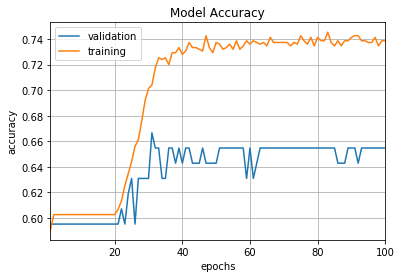

84/84 [==============================] - 0s 210us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.685079710824149, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.6989 - acc: 0.6013 - val_loss: 0.6963 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.6985 - acc: 0.6013 - val_loss: 0.6960 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.6982 - acc: 0.6013 - val_loss: 0.6957 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.6978 - acc: 0.6013 - val_loss: 0.6952 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 0.6975 - acc: 0.6013 - val_loss: 0.6946 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.6970 - acc: 0.6013 - val_loss: 0.6939 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.6965 - acc: 0.6013 - val_loss: 0.6939 - val_acc: 0.6071
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6499 - acc: 0.7133 - val_loss: 0.6356 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.6498 - acc: 0.7173 - val_loss: 0.6356 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.6497 - acc: 0.7120 - val_loss: 0.6356 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.6496 - acc: 0.7133 - val_loss: 0.6355 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.6496 - acc: 0.7173 - val_loss: 0.6355 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.6494 - acc: 0.7160 - val_loss: 0.6354 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.6492 - acc: 0.7160 - val_loss: 0.6354 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.6493 - acc: 0.7187 - val_loss: 0.6354 - val_acc: 0.7262


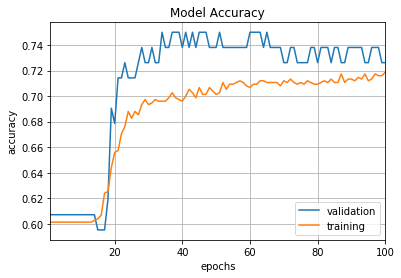

84/84 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.6353915078299386, 0.726190481867109]
 best Score: 0.726190481867109          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.6984 - acc: 0.6027 - val_loss: 0.7010 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6977 - acc: 0.6027 - val_loss: 0.7002 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6968 - acc: 0.6027 - val_loss: 0.6996 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6963 - acc: 0.6027 - val_loss: 0.6975 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6952 - acc: 0.6027 - val_loss: 0.6951 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6935 - acc: 0.6040 - val_loss: 0.6935 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6910 - acc: 0.6067 - val_loss: 0.6864 - val_acc: 0.6071
Epoch 8/100

Epoch 93/100
 - 0s - loss: 0.6425 - acc: 0.7293 - val_loss: 0.6510 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.6424 - acc: 0.7293 - val_loss: 0.6496 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.6425 - acc: 0.7293 - val_loss: 0.6503 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.6424 - acc: 0.7253 - val_loss: 0.6506 - val_acc: 0.7143
Epoch 97/100
 - 0s - loss: 0.6422 - acc: 0.7253 - val_loss: 0.6488 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.6423 - acc: 0.7253 - val_loss: 0.6490 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.6421 - acc: 0.7267 - val_loss: 0.6516 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.6423 - acc: 0.7253 - val_loss: 0.6497 - val_acc: 0.7143


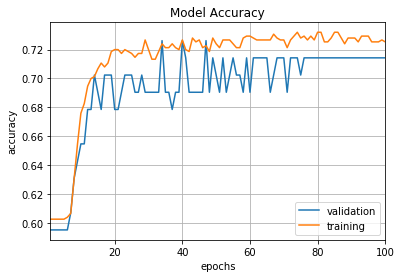

84/84 [==============================] - 0s 119us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6496544792538598, 0.7142857114473978]
 best Score: 0.726190481867109          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 5s - loss: 0.6988 - acc: 0.6053 - val_loss: 0.7103 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.6968 - acc: 0.6053 - val_loss: 0.7099 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.6965 - acc: 0.6053 - val_loss: 0.7097 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.6963 - acc: 0.6053 - val_loss: 0.7090 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.6962 - acc: 0.6053 - val_loss: 0.7087 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.6960 - acc: 0.6053 - val_loss: 0.7084 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.6957 - acc: 0.6053 - val_loss: 0.7081 - val_acc: 0.5714
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6462 - acc: 0.7253 - val_loss: 0.6388 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.6463 - acc: 0.7253 - val_loss: 0.6388 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.6457 - acc: 0.7253 - val_loss: 0.6383 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.6459 - acc: 0.7227 - val_loss: 0.6387 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.6460 - acc: 0.7240 - val_loss: 0.6384 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.6459 - acc: 0.7227 - val_loss: 0.6384 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.6458 - acc: 0.7280 - val_loss: 0.6383 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.6456 - acc: 0.7227 - val_loss: 0.6384 - val_acc: 0.7381


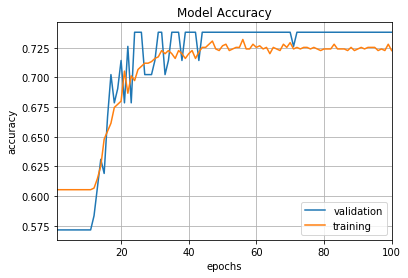

84/84 [==============================] - 0s 142us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6384262868336269, 0.7380952380952381]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 2/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 3/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 4/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 5/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 6/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 7/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 94/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 95/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 96/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 97/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 98/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 99/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735
Epoch 100/100
 - 0s - loss: 0.7996 - acc: 0.4008 - val_loss: 0.8133 - val_acc: 0.3735


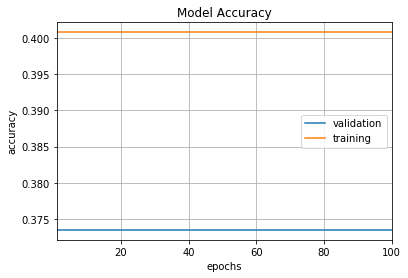

83/83 [==============================] - 0s 134us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.813253018511347, 0.3734939766217427]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.7000 - acc: 0.5992 - val_loss: 0.6870 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6997 - acc: 0.5992 - val_loss: 0.6870 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6996 - acc: 0.5992 - val_loss: 0.6872 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6994 - acc: 0.5992 - val_loss: 0.6871 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6992 - acc: 0.5992 - val_loss: 0.6873 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6990 - acc: 0.5992 - val_loss: 0.6872 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6988 - acc: 0.5992 - val_loss: 0.6871 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6421 - acc: 0.7310 - val_loss: 0.6415 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.6419 - acc: 0.7297 - val_loss: 0.6408 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.6421 - acc: 0.7310 - val_loss: 0.6388 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.6419 - acc: 0.7270 - val_loss: 0.6430 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.6417 - acc: 0.7284 - val_loss: 0.6423 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.6414 - acc: 0.7284 - val_loss: 0.6451 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.6416 - acc: 0.7270 - val_loss: 0.6427 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.6413 - acc: 0.7297 - val_loss: 0.6391 - val_acc: 0.7229


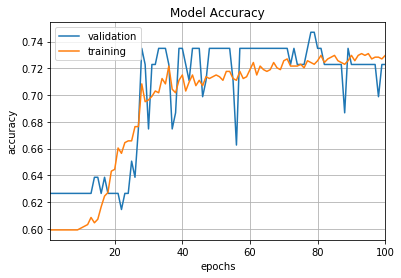

83/83 [==============================] - 0s 153us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6391296293362078, 0.7228915605200342]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 5s - loss: 0.7017 - acc: 0.5965 - val_loss: 0.6747 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.7011 - acc: 0.5952 - val_loss: 0.6755 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.7002 - acc: 0.5965 - val_loss: 0.6751 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 0.6999 - acc: 0.5965 - val_loss: 0.6763 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.6995 - acc: 0.5992 - val_loss: 0.6754 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6988 - acc: 0.5992 - val_loss: 0.6760 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.6971 - acc: 0.6045 - val_loss: 0.6758 - val_acc: 0.6627
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6500 - acc: 0.7190 - val_loss: 0.6529 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.6493 - acc: 0.7230 - val_loss: 0.6510 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.6495 - acc: 0.7204 - val_loss: 0.6535 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.6490 - acc: 0.7244 - val_loss: 0.6531 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.6492 - acc: 0.7230 - val_loss: 0.6529 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.6489 - acc: 0.7244 - val_loss: 0.6517 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.6490 - acc: 0.7217 - val_loss: 0.6517 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.6488 - acc: 0.7217 - val_loss: 0.6512 - val_acc: 0.6988


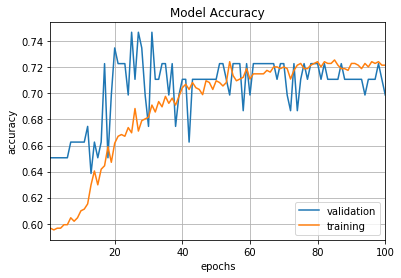

83/83 [==============================] - 0s 197us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6511702774518944, 0.6987951835954046]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.7592 - acc: 0.5446 - val_loss: 0.7456 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.7451 - acc: 0.6005 - val_loss: 0.7433 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.7434 - acc: 0.6005 - val_loss: 0.7418 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.7422 - acc: 0.6005 - val_loss: 0.7403 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.7409 - acc: 0.6005 - val_loss: 0.7391 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.7400 - acc: 0.6005 - val_loss: 0.7381 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.7391 - acc: 0.6005 - val_loss: 0.7371 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7169 - acc: 0.6005 - val_loss: 0.7123 - val_acc: 0.6145
Epoch 94/100
 - 0s - loss: 0.7168 - acc: 0.6005 - val_loss: 0.7122 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.7167 - acc: 0.6005 - val_loss: 0.7120 - val_acc: 0.6145
Epoch 96/100
 - 0s - loss: 0.7166 - acc: 0.6005 - val_loss: 0.7119 - val_acc: 0.6145
Epoch 97/100
 - 0s - loss: 0.7165 - acc: 0.6005 - val_loss: 0.7118 - val_acc: 0.6145
Epoch 98/100
 - 0s - loss: 0.7164 - acc: 0.6005 - val_loss: 0.7117 - val_acc: 0.6145
Epoch 99/100
 - 0s - loss: 0.7163 - acc: 0.6005 - val_loss: 0.7116 - val_acc: 0.6145
Epoch 100/100
 - 0s - loss: 0.7162 - acc: 0.6005 - val_loss: 0.7115 - val_acc: 0.6145


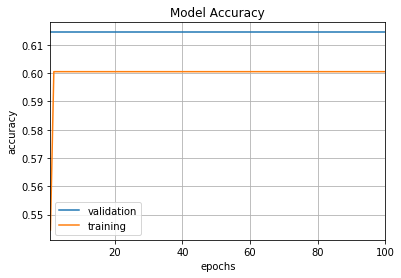

83/83 [==============================] - 0s 246us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.7114727396562875, 0.6144578356340707]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6948 - acc: 0.6099 - val_loss: 0.7323 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.6947 - acc: 0.6099 - val_loss: 0.7319 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.6945 - acc: 0.6099 - val_loss: 0.7297 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.6939 - acc: 0.6099 - val_loss: 0.7254 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.6925 - acc: 0.6099 - val_loss: 0.7204 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.6906 - acc: 0.6099 - val_loss: 0.6989 - val_acc: 0.5904
Epoch 7/100
 - 0s - loss: 0.6881 - acc: 0.6165 - val_loss: 0.7015 - val_acc: 0.5542
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6466 - acc: 0.7217 - val_loss: 0.6445 - val_acc: 0.7470
Epoch 94/100
 - 0s - loss: 0.6466 - acc: 0.7310 - val_loss: 0.6459 - val_acc: 0.7590
Epoch 95/100
 - 0s - loss: 0.6463 - acc: 0.7257 - val_loss: 0.6449 - val_acc: 0.7470
Epoch 96/100
 - 0s - loss: 0.6465 - acc: 0.7190 - val_loss: 0.6442 - val_acc: 0.7470
Epoch 97/100
 - 0s - loss: 0.6464 - acc: 0.7257 - val_loss: 0.6442 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.6463 - acc: 0.7230 - val_loss: 0.6458 - val_acc: 0.7590
Epoch 99/100
 - 0s - loss: 0.6462 - acc: 0.7244 - val_loss: 0.6456 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.6460 - acc: 0.7244 - val_loss: 0.6444 - val_acc: 0.7470


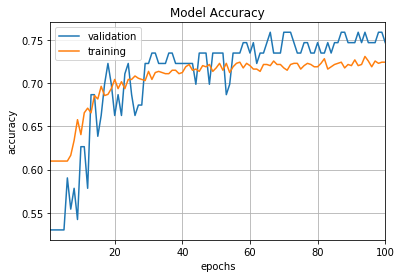

83/83 [==============================] - 0s 258us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6444295601672437, 0.7469879582703832]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.6991 - acc: 0.6019 - val_loss: 0.6993 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6986 - acc: 0.6019 - val_loss: 0.6995 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.6985 - acc: 0.6019 - val_loss: 0.6993 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.6984 - acc: 0.6019 - val_loss: 0.6999 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.6984 - acc: 0.6019 - val_loss: 0.6995 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6982 - acc: 0.6019 - val_loss: 0.6995 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6981 - acc: 0.6019 - val_loss: 0.6995 - val_acc: 0.6024
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.6693 - acc: 0.6871 - val_loss: 0.6619 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.6690 - acc: 0.6951 - val_loss: 0.6616 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.6688 - acc: 0.6831 - val_loss: 0.6634 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.6687 - acc: 0.6977 - val_loss: 0.6627 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.6686 - acc: 0.6897 - val_loss: 0.6627 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.6684 - acc: 0.6977 - val_loss: 0.6624 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.6683 - acc: 0.6951 - val_loss: 0.6663 - val_acc: 0.7349
Epoch 100/100
 - 0s - loss: 0.6683 - acc: 0.7111 - val_loss: 0.6628 - val_acc: 0.7349


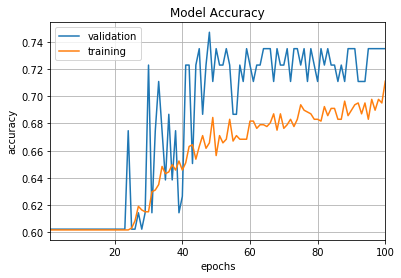

83/83 [==============================] - 0s 248us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6628261014639613, 0.7349397568817598]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.hinge,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7469879582703832
0.6724899607695045


[[0.685079710824149, 0.6547619047619048],
 [0.6353915078299386, 0.726190481867109],
 [0.6496544792538598, 0.7142857114473978],
 [0.6384262868336269, 0.7380952380952381],
 [0.813253018511347, 0.3734939766217427],
 [0.6391296293362078, 0.7228915605200342],
 [0.6511702774518944, 0.6987951835954046],
 [0.7114727396562875, 0.6144578356340707],
 [0.6444295601672437, 0.7469879582703832],
 [0.6628261014639613, 0.7349397568817598]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6793482489853608


[0.7386666663487752,
 0.7186666695276896,
 0.7253333338101705,
 0.7226666700839997,
 0.4007989416189105,
 0.7296937411221938,
 0.721704393982411,
 0.6005326281295477,
 0.7243675111375064,
 0.7110519340924035]

# 07 #losses.categorical_hinge,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.8374 - acc: 0.5973 - val_loss: 0.8086 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.7955 - acc: 0.6027 - val_loss: 0.8057 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.7937 - acc: 0.6027 - val_loss: 0.8053 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.7933 - acc: 0.6027 - val_loss: 0.8053 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.7931 - acc: 0.6027 - val_loss: 0.8052 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.7930 - acc: 0.6027 - val_loss: 0.8052 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.7930 - acc: 0.6027 - val_loss: 0.8052 - val_acc: 0.5952
Epoch 8/100
 - 0s - loss: 0.7930 - acc: 0.6027 - val_loss: 0.8052 - val_acc: 0.5952
Epoch 9/100
 - 0s - loss: 0.7929 - acc: 0.6027 - val_loss: 0.8051 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 0.7929 - acc: 0.6027 - val_loss: 0.8051 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.7928 - acc: 0.6027 - val_loss: 0.8050 - val_acc: 0.5952
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5795 - acc: 0.7293 - val_loss: 0.7098 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.5775 - acc: 0.7373 - val_loss: 0.7053 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.5764 - acc: 0.7293 - val_loss: 0.7125 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.5762 - acc: 0.7347 - val_loss: 0.7066 - val_acc: 0.6548


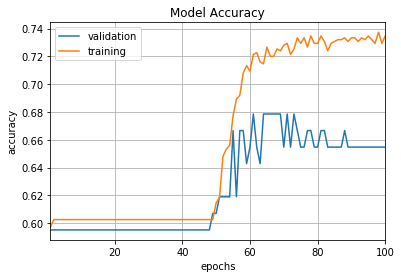

84/84 [==============================] - 0s 167us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.7066160894575573, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 2/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 3/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 4/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 5/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 6/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 7/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 8/1

Epoch 93/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 94/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 95/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 96/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 97/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 98/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 99/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929
Epoch 100/100
 - 0s - loss: 1.2027 - acc: 0.3987 - val_loss: 1.2143 - val_acc: 0.3929


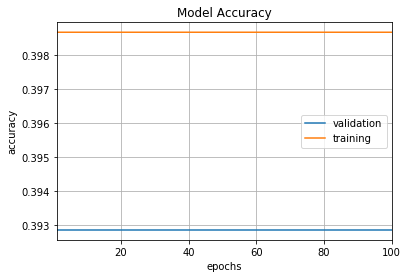

84/84 [==============================] - 0s 181us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [1.2142857142857142, 0.39285714285714285]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 0.8319 - acc: 0.5947 - val_loss: 0.8039 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.7930 - acc: 0.6027 - val_loss: 0.8045 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.7926 - acc: 0.6027 - val_loss: 0.8045 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.7924 - acc: 0.6027 - val_loss: 0.8044 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.7923 - acc: 0.6027 - val_loss: 0.8041 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.7921 - acc: 0.6027 - val_loss: 0.8038 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.7918 - acc: 0.6027 - val_loss: 0.8037 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.6382 - acc: 0.7200 - val_loss: 0.6529 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.6369 - acc: 0.7173 - val_loss: 0.6504 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.6372 - acc: 0.7147 - val_loss: 0.6491 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.6369 - acc: 0.7160 - val_loss: 0.6475 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.6354 - acc: 0.7187 - val_loss: 0.6513 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.6346 - acc: 0.7227 - val_loss: 0.6473 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.6333 - acc: 0.7173 - val_loss: 0.6389 - val_acc: 0.7143
Epoch 100/100
 - 0s - loss: 0.6339 - acc: 0.7213 - val_loss: 0.6430 - val_acc: 0.7381


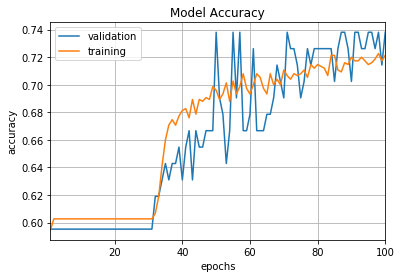

84/84 [==============================] - 0s 200us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.6429726907185146, 0.7380952352569217]
 best Score: 0.7380952352569217          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 6s - loss: 1.0121 - acc: 0.5693 - val_loss: 0.9862 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.9773 - acc: 0.6000 - val_loss: 0.9809 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.9688 - acc: 0.6053 - val_loss: 0.9768 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.9633 - acc: 0.6053 - val_loss: 0.9733 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.9584 - acc: 0.6053 - val_loss: 0.9703 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.9542 - acc: 0.6053 - val_loss: 0.9676 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.9504 - acc: 0.6053 - val_loss: 0.9651 - val_acc: 0.5714
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7366 - acc: 0.7160 - val_loss: 0.7045 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.7348 - acc: 0.7200 - val_loss: 0.7025 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.7330 - acc: 0.7200 - val_loss: 0.7013 - val_acc: 0.7381
Epoch 96/100
 - 0s - loss: 0.7319 - acc: 0.7240 - val_loss: 0.7015 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.7304 - acc: 0.7253 - val_loss: 0.6967 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.7294 - acc: 0.7160 - val_loss: 0.6958 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.7287 - acc: 0.7173 - val_loss: 0.6941 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.7275 - acc: 0.7187 - val_loss: 0.6923 - val_acc: 0.7381


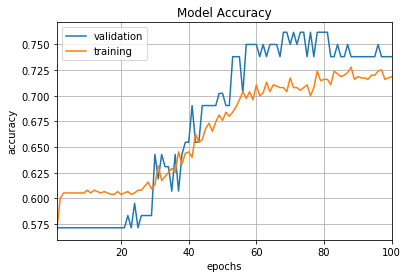

84/84 [==============================] - 0s 139us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6922806104024252, 0.7380952380952381]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.9182 - acc: 0.5846 - val_loss: 0.8250 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.8243 - acc: 0.5992 - val_loss: 0.7782 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.8065 - acc: 0.5992 - val_loss: 0.7633 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.8010 - acc: 0.5992 - val_loss: 0.7583 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.7990 - acc: 0.5992 - val_loss: 0.7555 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.7980 - acc: 0.5992 - val_loss: 0.7546 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.7974 - acc: 0.5992 - val_loss: 0.7534 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5828 - acc: 0.7204 - val_loss: 0.6201 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5814 - acc: 0.7230 - val_loss: 0.6196 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5813 - acc: 0.7190 - val_loss: 0.6200 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5813 - acc: 0.7204 - val_loss: 0.6189 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5805 - acc: 0.7177 - val_loss: 0.6185 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5806 - acc: 0.7217 - val_loss: 0.6181 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5800 - acc: 0.7190 - val_loss: 0.6178 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5796 - acc: 0.7190 - val_loss: 0.6181 - val_acc: 0.7229


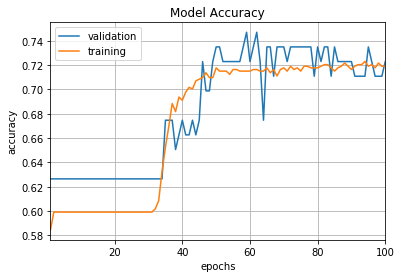

83/83 [==============================] - 0s 131us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6181348741772663, 0.7228915641106755]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.8008 - acc: 0.5992 - val_loss: 0.7473 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.7951 - acc: 0.5992 - val_loss: 0.7471 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.7933 - acc: 0.5992 - val_loss: 0.7476 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.7901 - acc: 0.5992 - val_loss: 0.7463 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.7876 - acc: 0.5992 - val_loss: 0.7485 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.7855 - acc: 0.5992 - val_loss: 0.7458 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.7782 - acc: 0.5992 - val_loss: 0.7442 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5995 - acc: 0.7284 - val_loss: 0.6025 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.5985 - acc: 0.7270 - val_loss: 0.6061 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5987 - acc: 0.7257 - val_loss: 0.6049 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5982 - acc: 0.7270 - val_loss: 0.6039 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5974 - acc: 0.7270 - val_loss: 0.6007 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5975 - acc: 0.7230 - val_loss: 0.6033 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5971 - acc: 0.7244 - val_loss: 0.6028 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5961 - acc: 0.7270 - val_loss: 0.6098 - val_acc: 0.7108


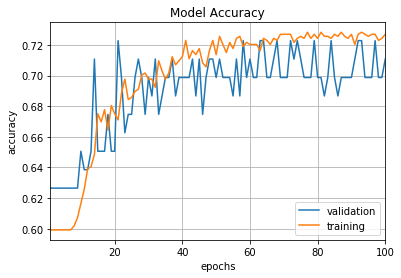

83/83 [==============================] - 0s 188us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6097583612763738, 0.7108433727758476]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 6s - loss: 0.9306 - acc: 0.5406 - val_loss: 0.7310 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.8097 - acc: 0.5965 - val_loss: 0.7114 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.8056 - acc: 0.5965 - val_loss: 0.7090 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 0.8049 - acc: 0.5965 - val_loss: 0.7069 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.8045 - acc: 0.5965 - val_loss: 0.7061 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.8043 - acc: 0.5965 - val_loss: 0.7052 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.8042 - acc: 0.5965 - val_loss: 0.7044 - val_acc: 0.6506
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6109 - acc: 0.7137 - val_loss: 0.6029 - val_acc: 0.7229
Epoch 94/100
 - 0s - loss: 0.6116 - acc: 0.7137 - val_loss: 0.5991 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.6101 - acc: 0.7097 - val_loss: 0.6026 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.6091 - acc: 0.7190 - val_loss: 0.5991 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.6091 - acc: 0.7150 - val_loss: 0.5988 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.6072 - acc: 0.7137 - val_loss: 0.5987 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.6074 - acc: 0.7111 - val_loss: 0.5928 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.6065 - acc: 0.7111 - val_loss: 0.6013 - val_acc: 0.7229


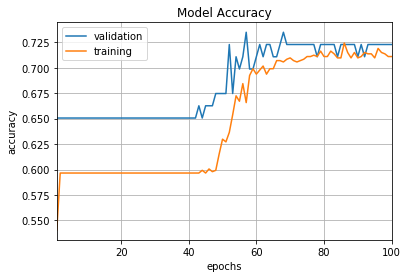

83/83 [==============================] - 0s 180us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6013489868267473, 0.7228915691375732]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 1.2025 - acc: 0.3995 - val_loss: 1.2292 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 1.2014 - acc: 0.3995 - val_loss: 1.2290 - val_acc: 0.3855
Epoch 3/100
 - 0s - loss: 1.2013 - acc: 0.3995 - val_loss: 1.2290 - val_acc: 0.3855
Epoch 4/100
 - 0s - loss: 1.2012 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 5/100
 - 0s - loss: 1.2012 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 6/100
 - 0s - loss: 1.2012 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 7/100
 - 0s - loss: 1.2012 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 8/1

Epoch 93/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 94/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 95/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 96/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 97/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 98/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 99/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855
Epoch 100/100
 - 0s - loss: 1.2011 - acc: 0.3995 - val_loss: 1.2289 - val_acc: 0.3855


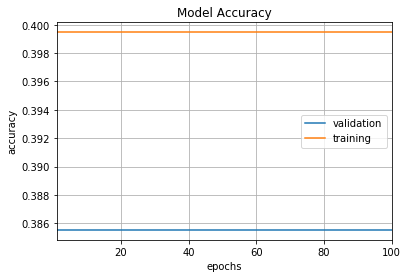

83/83 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [1.2289156339254723, 0.38554217118814765]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.7803 - acc: 0.6099 - val_loss: 0.9398 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.7803 - acc: 0.6099 - val_loss: 0.9398 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.7803 - acc: 0.6099 - val_loss: 0.9397 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.8788 - acc: 0.5593 - val_loss: 0.9308 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.7796 - acc: 0.6099 - val_loss: 0.9337 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.7796 - acc: 0.6099 - val_loss: 0.9346 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.7795 - acc: 0.6099 - val_loss: 0.9339 - val_acc: 0.5301
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.6596 - acc: 0.7071 - val_loss: 0.6908 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.6629 - acc: 0.7004 - val_loss: 0.6868 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.6614 - acc: 0.6924 - val_loss: 0.6695 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.6531 - acc: 0.7044 - val_loss: 0.6146 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.6544 - acc: 0.7124 - val_loss: 0.6427 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.6518 - acc: 0.7084 - val_loss: 0.6197 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.6511 - acc: 0.7004 - val_loss: 0.6431 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.6495 - acc: 0.7017 - val_loss: 0.6130 - val_acc: 0.7229


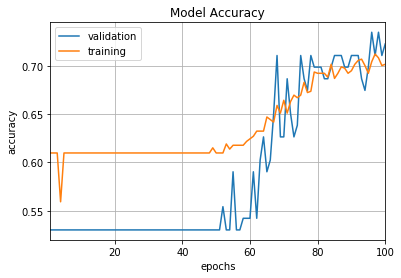

83/83 [==============================] - 0s 346us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6129819750785828, 0.7228915691375732]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.8075 - acc: 0.6019 - val_loss: 0.8044 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.7931 - acc: 0.6019 - val_loss: 0.8019 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.7927 - acc: 0.6019 - val_loss: 0.8004 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.7923 - acc: 0.6019 - val_loss: 0.8000 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.7921 - acc: 0.6019 - val_loss: 0.7995 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.7920 - acc: 0.6019 - val_loss: 0.7990 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.7918 - acc: 0.6019 - val_loss: 0.7994 - val_acc: 0.6024
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5957 - acc: 0.7270 - val_loss: 0.6298 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5967 - acc: 0.7270 - val_loss: 0.6146 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5957 - acc: 0.7244 - val_loss: 0.6150 - val_acc: 0.7108
Epoch 96/100
 - 0s - loss: 0.5951 - acc: 0.7270 - val_loss: 0.6142 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.5946 - acc: 0.7204 - val_loss: 0.6101 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5942 - acc: 0.7230 - val_loss: 0.6160 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5930 - acc: 0.7230 - val_loss: 0.6047 - val_acc: 0.7229
Epoch 100/100
 - 0s - loss: 0.5937 - acc: 0.7244 - val_loss: 0.6051 - val_acc: 0.7229


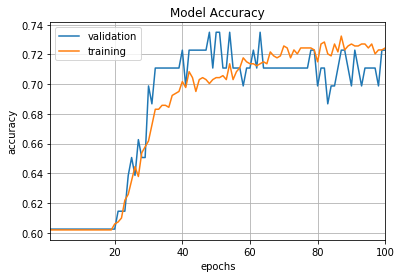

83/83 [==============================] - 0s 225us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6051045936274241, 0.7228915641106755]
 best Score: 0.7380952380952381          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_hinge,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7380952380952381
0.65117613314317


[[0.7066160894575573, 0.6547619047619048],
 [1.2142857142857142, 0.39285714285714285],
 [0.6429726907185146, 0.7380952352569217],
 [0.6922806104024252, 0.7380952380952381],
 [0.6181348741772663, 0.7228915641106755],
 [0.6097583612763738, 0.7108433727758476],
 [0.6013489868267473, 0.7228915691375732],
 [1.2289156339254723, 0.38554217118814765],
 [0.6129819750785828, 0.7228915691375732],
 [0.6051045936274241, 0.7228915641106755]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6556023095651065


[0.7346666697661082,
 0.3986666730046272,
 0.7213333346446356,
 0.7186666677395502,
 0.7190412779781377,
 0.7270306230543774,
 0.7110519289335462,
 0.3994673850453805,
 0.7017310267282072,
 0.7243675087564954]

# 08 #losses.logcosh,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.1140 - acc: 0.6000 - val_loss: 0.1127 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.1129 - acc: 0.6027 - val_loss: 0.1123 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.1124 - acc: 0.6027 - val_loss: 0.1121 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.1124 - acc: 0.6027 - val_loss: 0.1119 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.1122 - acc: 0.6027 - val_loss: 0.1119 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.1121 - acc: 0.6027 - val_loss: 0.1118 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.1119 - acc: 0.6027 - val_loss: 0.1117 - val_acc: 0.5952
Epoch 8/100
 - 0s - loss: 0.1118 - acc: 0.6027 - val_loss: 0.1116 - val_acc: 0.5952
Epoch 9/100
 - 0s - loss: 0.1117 - acc: 0.6027 - val_loss: 0.1115 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 0.1116 - acc: 0.6027 - val_loss: 0.1114 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.1115 - acc: 0.6027 - val_loss: 0.1113 - val_acc: 0.5952
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.0980 - acc: 0.6880 - val_loss: 0.1022 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.0978 - acc: 0.6893 - val_loss: 0.1022 - val_acc: 0.6429
Epoch 99/100
 - 0s - loss: 0.0977 - acc: 0.6853 - val_loss: 0.1021 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.0976 - acc: 0.6840 - val_loss: 0.1020 - val_acc: 0.6548


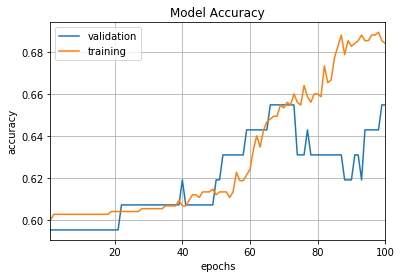

84/84 [==============================] - 0s 223us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.10200856767949604, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.1130 - acc: 0.6013 - val_loss: 0.1101 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.1117 - acc: 0.6013 - val_loss: 0.1097 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.1108 - acc: 0.6027 - val_loss: 0.1094 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.1095 - acc: 0.6080 - val_loss: 0.1078 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.1074 - acc: 0.6320 - val_loss: 0.1053 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.1053 - acc: 0.6333 - val_loss: 0.1037 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.1030 - acc: 0.6613 - val_loss: 0.1026 - val_acc: 0.6071
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0905 - acc: 0.7267 - val_loss: 0.0886 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.0906 - acc: 0.7160 - val_loss: 0.0892 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.0905 - acc: 0.7200 - val_loss: 0.0889 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.0905 - acc: 0.7240 - val_loss: 0.0891 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.0905 - acc: 0.7213 - val_loss: 0.0887 - val_acc: 0.7619
Epoch 98/100
 - 0s - loss: 0.0906 - acc: 0.7173 - val_loss: 0.0891 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.0906 - acc: 0.7227 - val_loss: 0.0889 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.0905 - acc: 0.7173 - val_loss: 0.0891 - val_acc: 0.7500


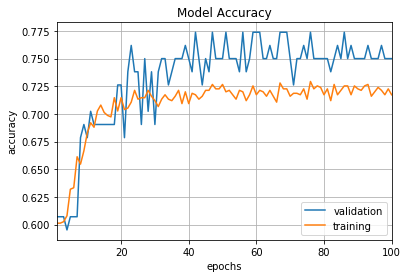

84/84 [==============================] - 0s 156us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.08913918903895787, 0.7499999971616835]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.1262 - acc: 0.5867 - val_loss: 0.1120 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.1079 - acc: 0.6467 - val_loss: 0.1043 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.1071 - acc: 0.6573 - val_loss: 0.1044 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.1060 - acc: 0.6413 - val_loss: 0.1032 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.1051 - acc: 0.6533 - val_loss: 0.1030 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.1047 - acc: 0.6493 - val_loss: 0.1040 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.1044 - acc: 0.6533 - val_loss: 0.1011 - val_acc: 0.6548
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0936 - acc: 0.7093 - val_loss: 0.0896 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.0937 - acc: 0.7173 - val_loss: 0.0902 - val_acc: 0.7024
Epoch 95/100
 - 0s - loss: 0.0937 - acc: 0.7227 - val_loss: 0.0900 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.0937 - acc: 0.7213 - val_loss: 0.0902 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.0936 - acc: 0.7187 - val_loss: 0.0901 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0934 - acc: 0.7147 - val_loss: 0.0891 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.0937 - acc: 0.7267 - val_loss: 0.0894 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.0936 - acc: 0.7240 - val_loss: 0.0899 - val_acc: 0.7143


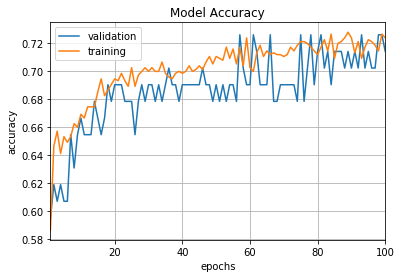

84/84 [==============================] - 0s 190us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.08990385383367538, 0.7142857142857143]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 7s - loss: 0.1174 - acc: 0.6040 - val_loss: 0.1147 - val_acc: 0.6190
Epoch 2/100
 - 0s - loss: 0.1126 - acc: 0.6053 - val_loss: 0.1140 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.1115 - acc: 0.6053 - val_loss: 0.1143 - val_acc: 0.5833
Epoch 4/100
 - 0s - loss: 0.1116 - acc: 0.6093 - val_loss: 0.1135 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.1110 - acc: 0.6053 - val_loss: 0.1136 - val_acc: 0.5833
Epoch 6/100
 - 0s - loss: 0.1108 - acc: 0.6107 - val_loss: 0.1138 - val_acc: 0.5833
Epoch 7/100
 - 0s - loss: 0.1104 - acc: 0.6093 - val_loss: 0.1130 - val_acc: 0.6310
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0990 - acc: 0.6867 - val_loss: 0.0970 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.0987 - acc: 0.6947 - val_loss: 0.0965 - val_acc: 0.6905
Epoch 95/100
 - 0s - loss: 0.0988 - acc: 0.6907 - val_loss: 0.0965 - val_acc: 0.6905
Epoch 96/100
 - 0s - loss: 0.0985 - acc: 0.6973 - val_loss: 0.0967 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.0983 - acc: 0.6960 - val_loss: 0.0969 - val_acc: 0.7024
Epoch 98/100
 - 0s - loss: 0.0982 - acc: 0.6827 - val_loss: 0.0959 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.0981 - acc: 0.6960 - val_loss: 0.0956 - val_acc: 0.6905
Epoch 100/100
 - 0s - loss: 0.0980 - acc: 0.6947 - val_loss: 0.0956 - val_acc: 0.6905


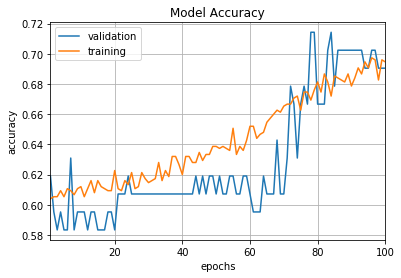

84/84 [==============================] - 0s 252us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.0955802918899627, 0.6904761847995576]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.2060 - acc: 0.4474 - val_loss: 0.1612 - val_acc: 0.3735
Epoch 2/100
 - 0s - loss: 0.1110 - acc: 0.6045 - val_loss: 0.1074 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.1077 - acc: 0.6312 - val_loss: 0.1244 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.1069 - acc: 0.6258 - val_loss: 0.1121 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.1063 - acc: 0.6245 - val_loss: 0.1277 - val_acc: 0.5060
Epoch 6/100
 - 0s - loss: 0.1051 - acc: 0.6538 - val_loss: 0.1092 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.1040 - acc: 0.6232 - val_loss: 0.1013 - val_acc: 0.6747
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0914 - acc: 0.7257 - val_loss: 0.0993 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.0916 - acc: 0.7244 - val_loss: 0.0983 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.0915 - acc: 0.7124 - val_loss: 0.0990 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.0917 - acc: 0.7257 - val_loss: 0.0991 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.0917 - acc: 0.7190 - val_loss: 0.0987 - val_acc: 0.6988
Epoch 98/100
 - 0s - loss: 0.0915 - acc: 0.7217 - val_loss: 0.0984 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.0913 - acc: 0.7164 - val_loss: 0.1005 - val_acc: 0.6747
Epoch 100/100
 - 0s - loss: 0.0912 - acc: 0.7071 - val_loss: 0.0983 - val_acc: 0.6627


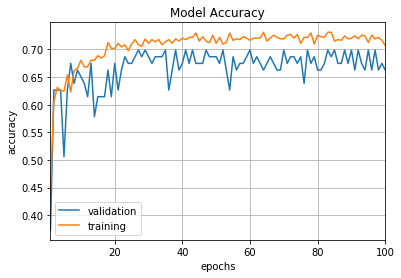

83/83 [==============================] - 0s 158us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.09831110334180924, 0.6626506002552538]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 7s - loss: 0.1221 - acc: 0.6085 - val_loss: 0.1036 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.1054 - acc: 0.6325 - val_loss: 0.1154 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.1029 - acc: 0.6671 - val_loss: 0.0978 - val_acc: 0.6747
Epoch 4/100
 - 0s - loss: 0.1023 - acc: 0.6618 - val_loss: 0.1044 - val_acc: 0.7108
Epoch 5/100
 - 0s - loss: 0.1013 - acc: 0.6897 - val_loss: 0.0954 - val_acc: 0.7590
Epoch 6/100
 - 0s - loss: 0.1006 - acc: 0.6778 - val_loss: 0.0948 - val_acc: 0.7590
Epoch 7/100
 - 0s - loss: 0.1000 - acc: 0.6897 - val_loss: 0.0993 - val_acc: 0.6506
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0929 - acc: 0.7217 - val_loss: 0.0876 - val_acc: 0.7711
Epoch 94/100
 - 0s - loss: 0.0928 - acc: 0.7137 - val_loss: 0.0873 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.0928 - acc: 0.7177 - val_loss: 0.0884 - val_acc: 0.7711
Epoch 96/100
 - 0s - loss: 0.0927 - acc: 0.7150 - val_loss: 0.0877 - val_acc: 0.7711
Epoch 97/100
 - 0s - loss: 0.0928 - acc: 0.7177 - val_loss: 0.0883 - val_acc: 0.7711
Epoch 98/100
 - 0s - loss: 0.0927 - acc: 0.7217 - val_loss: 0.0877 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.0925 - acc: 0.7217 - val_loss: 0.0879 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.0922 - acc: 0.7217 - val_loss: 0.0877 - val_acc: 0.7229


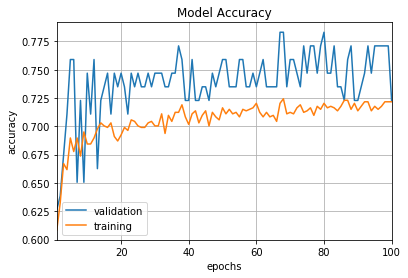

83/83 [==============================] - 0s 289us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.08767158170062375, 0.722891565546932]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.1190 - acc: 0.6112 - val_loss: 0.1088 - val_acc: 0.6867
Epoch 2/100
 - 0s - loss: 0.1057 - acc: 0.6431 - val_loss: 0.1013 - val_acc: 0.6627
Epoch 3/100
 - 0s - loss: 0.0992 - acc: 0.7111 - val_loss: 0.0951 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.0970 - acc: 0.7111 - val_loss: 0.0954 - val_acc: 0.6988
Epoch 5/100
 - 0s - loss: 0.0966 - acc: 0.6977 - val_loss: 0.0997 - val_acc: 0.6867
Epoch 6/100
 - 0s - loss: 0.0953 - acc: 0.7031 - val_loss: 0.0988 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.0947 - acc: 0.7097 - val_loss: 0.1113 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.0894 - acc: 0.7310 - val_loss: 0.0965 - val_acc: 0.6386
Epoch 94/100
 - 0s - loss: 0.0894 - acc: 0.7364 - val_loss: 0.0969 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.0893 - acc: 0.7297 - val_loss: 0.0993 - val_acc: 0.6747
Epoch 96/100
 - 0s - loss: 0.0895 - acc: 0.7257 - val_loss: 0.0973 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.0893 - acc: 0.7377 - val_loss: 0.0964 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.0894 - acc: 0.7284 - val_loss: 0.0973 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.0893 - acc: 0.7310 - val_loss: 0.0960 - val_acc: 0.6506
Epoch 100/100
 - 0s - loss: 0.0895 - acc: 0.7324 - val_loss: 0.0969 - val_acc: 0.6386


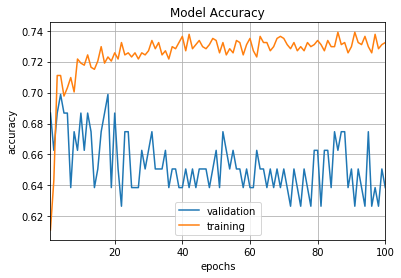

83/83 [==============================] - 0s 167us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.09686101658875684, 0.6385542147130852]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.1241 - acc: 0.5859 - val_loss: 0.1162 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.1165 - acc: 0.6005 - val_loss: 0.1154 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1160 - acc: 0.6005 - val_loss: 0.1151 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.1158 - acc: 0.6005 - val_loss: 0.1147 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.1156 - acc: 0.6005 - val_loss: 0.1145 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.1154 - acc: 0.6005 - val_loss: 0.1143 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.1153 - acc: 0.6005 - val_loss: 0.1142 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 94/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 95/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 96/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 97/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 98/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 99/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145
Epoch 100/100
 - 0s - loss: 0.1147 - acc: 0.6005 - val_loss: 0.1132 - val_acc: 0.6145


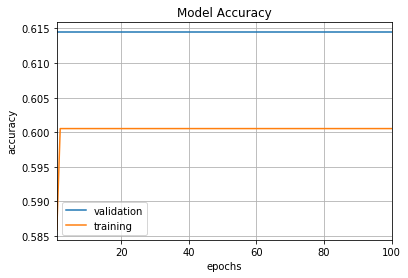

83/83 [==============================] - 0s 227us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.11316330470593579, 0.6144578356340707]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.1196 - acc: 0.6045 - val_loss: 0.1159 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.1120 - acc: 0.6125 - val_loss: 0.1174 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.1114 - acc: 0.6125 - val_loss: 0.1160 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.1111 - acc: 0.6125 - val_loss: 0.1149 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.1113 - acc: 0.6125 - val_loss: 0.1149 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.1109 - acc: 0.6125 - val_loss: 0.1163 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.1107 - acc: 0.6125 - val_loss: 0.1145 - val_acc: 0.5301
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.0924 - acc: 0.7297 - val_loss: 0.0893 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.0926 - acc: 0.7270 - val_loss: 0.0896 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.0927 - acc: 0.7204 - val_loss: 0.0894 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.0925 - acc: 0.7217 - val_loss: 0.0896 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.0925 - acc: 0.7230 - val_loss: 0.0894 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.0924 - acc: 0.7230 - val_loss: 0.0910 - val_acc: 0.7229
Epoch 99/100
 - 0s - loss: 0.0924 - acc: 0.7270 - val_loss: 0.0899 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.0920 - acc: 0.7230 - val_loss: 0.0895 - val_acc: 0.7229


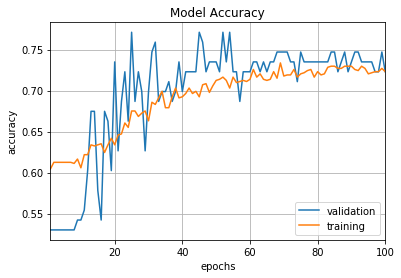

83/83 [==============================] - 0s 384us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.08952425590839731, 0.7228915641106755]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.1143 - acc: 0.5925 - val_loss: 0.1190 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.1112 - acc: 0.6019 - val_loss: 0.1149 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.1115 - acc: 0.6099 - val_loss: 0.1155 - val_acc: 0.6024
Epoch 4/100
 - 0s - loss: 0.1106 - acc: 0.6112 - val_loss: 0.1191 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.1108 - acc: 0.6032 - val_loss: 0.1176 - val_acc: 0.5663
Epoch 6/100
 - 0s - loss: 0.1106 - acc: 0.6205 - val_loss: 0.1164 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.1105 - acc: 0.6032 - val_loss: 0.1176 - val_acc: 0.5783
Epoch 8

Epoch 93/100
 - 0s - loss: 0.0980 - acc: 0.6911 - val_loss: 0.1063 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.0980 - acc: 0.6924 - val_loss: 0.1060 - val_acc: 0.6867
Epoch 95/100
 - 0s - loss: 0.0977 - acc: 0.6924 - val_loss: 0.1059 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.0978 - acc: 0.6924 - val_loss: 0.1059 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.0974 - acc: 0.6951 - val_loss: 0.1064 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.0975 - acc: 0.6911 - val_loss: 0.1059 - val_acc: 0.6867
Epoch 99/100
 - 0s - loss: 0.0973 - acc: 0.6897 - val_loss: 0.1055 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.0971 - acc: 0.6964 - val_loss: 0.1054 - val_acc: 0.6867


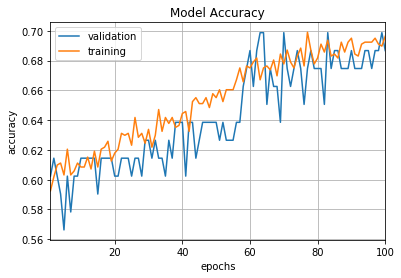

83/83 [==============================] - 0s 160us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.10540340320173516, 0.6867469857974224]
 best Score: 0.7499999971616835          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.logcosh,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7499999971616835
0.68577165670663


[[0.10200856767949604, 0.6547619047619048],
 [0.08913918903895787, 0.7499999971616835],
 [0.08990385383367538, 0.7142857142857143],
 [0.0955802918899627, 0.6904761847995576],
 [0.09831110334180924, 0.6626506002552538],
 [0.08767158170062375, 0.722891565546932],
 [0.09686101658875684, 0.6385542147130852],
 [0.11316330470593579, 0.6144578356340707],
 [0.08952425590839731, 0.7228915641106755],
 [0.10540340320173516, 0.6867469857974224]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7001091892189626


[0.6840000025431315,
 0.7173333362738291,
 0.7239999997615815,
 0.6946666689713796,
 0.7070572585780198,
 0.7217043940617781,
 0.7323568579995045,
 0.6005326283279653,
 0.7230359507146752,
 0.6964047949577616]

# 09 #losses.categorical_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 0.7284 - acc: 0.5627 - val_loss: 0.7137 - val_acc: 0.4762
Epoch 2/100
 - 0s - loss: 0.6736 - acc: 0.6013 - val_loss: 0.7552 - val_acc: 0.4286
Epoch 3/100
 - 0s - loss: 0.6576 - acc: 0.6293 - val_loss: 0.7180 - val_acc: 0.4881
Epoch 4/100
 - 0s - loss: 0.6479 - acc: 0.6413 - val_loss: 0.6788 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.6408 - acc: 0.6493 - val_loss: 0.6749 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.6353 - acc: 0.6520 - val_loss: 0.6835 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.6271 - acc: 0.6720 - val_loss: 0.6710 - val_acc: 0.6310
Epoch 8/100
 - 0s - loss: 0.6254 - acc: 0.6827 - val_loss: 0.6670 - val_acc: 0.6071
Epoch 9/100
 - 0s - loss: 0.6178 - acc: 0.6840 - val_loss: 0.6636 - val_acc: 0.5952
Epoch 10/100
 - 0s - loss: 0.6191 - acc: 0.6920 - val_loss: 0.6615 - val_acc: 0.6071
Epoch 11/100
 - 0s - loss: 0.6157 - acc: 0.6787 - val_loss: 0.6599 - val_acc: 0.6071
Epoch 12/100
 - 0s - 

Epoch 97/100
 - 0s - loss: 0.5755 - acc: 0.7147 - val_loss: 0.6284 - val_acc: 0.6310
Epoch 98/100
 - 0s - loss: 0.5739 - acc: 0.7240 - val_loss: 0.6312 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.5733 - acc: 0.7200 - val_loss: 0.6282 - val_acc: 0.6310
Epoch 100/100
 - 0s - loss: 0.5744 - acc: 0.7280 - val_loss: 0.6297 - val_acc: 0.6548


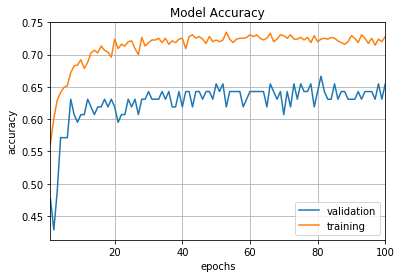

84/84 [==============================] - 0s 169us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6297002803711664, 0.6547619076002211]
 best Score: 0.6547619076002211          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 1.0939 - acc: 0.5693 - val_loss: 0.6553 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.6702 - acc: 0.5920 - val_loss: 0.6489 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.6680 - acc: 0.6013 - val_loss: 0.6502 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.6637 - acc: 0.6013 - val_loss: 0.6447 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 0.6615 - acc: 0.6000 - val_loss: 0.6434 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.6592 - acc: 0.6013 - val_loss: 0.6404 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.6572 - acc: 0.6013 - val_loss: 0.6414 - val_acc: 0.6071
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5785 - acc: 0.7093 - val_loss: 0.5699 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5781 - acc: 0.7133 - val_loss: 0.5646 - val_acc: 0.7738
Epoch 95/100
 - 0s - loss: 0.5780 - acc: 0.7040 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.5784 - acc: 0.7147 - val_loss: 0.5631 - val_acc: 0.7500
Epoch 97/100
 - 0s - loss: 0.5798 - acc: 0.7093 - val_loss: 0.5643 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.5788 - acc: 0.7093 - val_loss: 0.5686 - val_acc: 0.7619
Epoch 99/100
 - 0s - loss: 0.5781 - acc: 0.7107 - val_loss: 0.5643 - val_acc: 0.7738
Epoch 100/100
 - 0s - loss: 0.5751 - acc: 0.7173 - val_loss: 0.5730 - val_acc: 0.7738


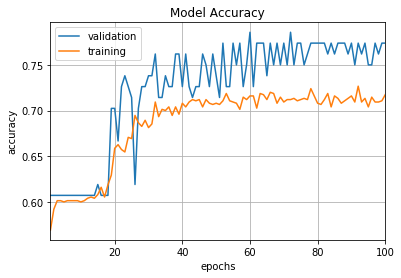

84/84 [==============================] - 0s 164us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5729617334547497, 0.7738095209712074]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 0.6905 - acc: 0.6000 - val_loss: 0.6578 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6589 - acc: 0.6000 - val_loss: 0.6522 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6557 - acc: 0.6040 - val_loss: 0.6486 - val_acc: 0.6190
Epoch 4/100
 - 0s - loss: 0.6539 - acc: 0.6053 - val_loss: 0.6457 - val_acc: 0.6310
Epoch 5/100
 - 0s - loss: 0.6444 - acc: 0.6200 - val_loss: 0.6678 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6498 - acc: 0.6080 - val_loss: 0.6413 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.6450 - acc: 0.6227 - val_loss: 0.6413 - val_acc: 0.6310
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5949 - acc: 0.7080 - val_loss: 0.5837 - val_acc: 0.7143
Epoch 94/100
 - 0s - loss: 0.5943 - acc: 0.7080 - val_loss: 0.5809 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.5945 - acc: 0.7213 - val_loss: 0.5816 - val_acc: 0.7143
Epoch 96/100
 - 0s - loss: 0.5933 - acc: 0.7147 - val_loss: 0.5817 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.5929 - acc: 0.7133 - val_loss: 0.5874 - val_acc: 0.6548
Epoch 98/100
 - 0s - loss: 0.5941 - acc: 0.7013 - val_loss: 0.5833 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.5930 - acc: 0.7080 - val_loss: 0.5819 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.5942 - acc: 0.7107 - val_loss: 0.5813 - val_acc: 0.7262


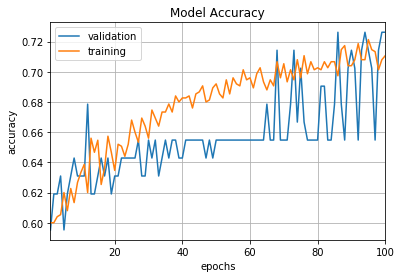

84/84 [==============================] - 0s 241us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5813056741441999, 0.7261904761904762]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 8s - loss: 0.8274 - acc: 0.6067 - val_loss: 0.6650 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.6561 - acc: 0.6253 - val_loss: 0.6699 - val_acc: 0.5833
Epoch 3/100
 - 0s - loss: 0.6495 - acc: 0.6133 - val_loss: 0.6437 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6387 - acc: 0.6493 - val_loss: 0.6399 - val_acc: 0.6905
Epoch 5/100
 - 0s - loss: 0.6410 - acc: 0.6347 - val_loss: 0.6487 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6386 - acc: 0.6493 - val_loss: 0.6369 - val_acc: 0.7143
Epoch 7/100
 - 0s - loss: 0.6346 - acc: 0.6280 - val_loss: 0.6306 - val_acc: 0.6310
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5780 - acc: 0.7067 - val_loss: 0.5837 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5780 - acc: 0.7080 - val_loss: 0.5813 - val_acc: 0.7262
Epoch 95/100
 - 0s - loss: 0.5750 - acc: 0.7053 - val_loss: 0.5799 - val_acc: 0.7024
Epoch 96/100
 - 0s - loss: 0.5775 - acc: 0.6960 - val_loss: 0.5824 - val_acc: 0.7262
Epoch 97/100
 - 0s - loss: 0.5768 - acc: 0.7173 - val_loss: 0.5858 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5789 - acc: 0.7067 - val_loss: 0.5792 - val_acc: 0.7024
Epoch 99/100
 - 0s - loss: 0.5758 - acc: 0.7053 - val_loss: 0.5805 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.5777 - acc: 0.7053 - val_loss: 0.5797 - val_acc: 0.7262


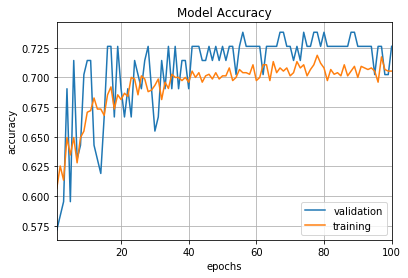

84/84 [==============================] - 0s 175us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5796843994231451, 0.7261904761904762]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 8s - loss: 0.6971 - acc: 0.6205 - val_loss: 0.6508 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6248 - acc: 0.6538 - val_loss: 0.6892 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6197 - acc: 0.6764 - val_loss: 0.6209 - val_acc: 0.6627
Epoch 4/100
 - 0s - loss: 0.6101 - acc: 0.6911 - val_loss: 0.6580 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6086 - acc: 0.6951 - val_loss: 0.6310 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6081 - acc: 0.6991 - val_loss: 0.6302 - val_acc: 0.7229
Epoch 7/100
 - 0s - loss: 0.6075 - acc: 0.6977 - val_loss: 0.6552 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5725 - acc: 0.7204 - val_loss: 0.6196 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5717 - acc: 0.7190 - val_loss: 0.6306 - val_acc: 0.6386
Epoch 95/100
 - 1s - loss: 0.5732 - acc: 0.7150 - val_loss: 0.6301 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.5725 - acc: 0.7217 - val_loss: 0.6197 - val_acc: 0.6747
Epoch 97/100
 - 0s - loss: 0.5728 - acc: 0.7204 - val_loss: 0.6192 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5730 - acc: 0.7190 - val_loss: 0.6217 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5709 - acc: 0.7164 - val_loss: 0.6206 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5720 - acc: 0.7150 - val_loss: 0.6209 - val_acc: 0.6988


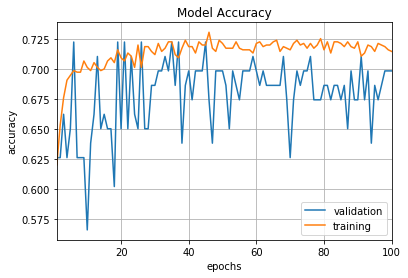

83/83 [==============================] - 0s 245us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6208787301936781, 0.6987951785685068]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.6852 - acc: 0.5992 - val_loss: 0.6768 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6797 - acc: 0.5992 - val_loss: 0.6728 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6777 - acc: 0.5992 - val_loss: 0.6710 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6767 - acc: 0.5992 - val_loss: 0.6693 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6759 - acc: 0.5992 - val_loss: 0.6684 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6755 - acc: 0.5992 - val_loss: 0.6675 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6750 - acc: 0.5992 - val_loss: 0.6670 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6733 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.6733 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.6734 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 96/100
 - 0s - loss: 0.6733 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.6734 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 98/100
 - 0s - loss: 0.6733 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.6734 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.6734 - acc: 0.5992 - val_loss: 0.6623 - val_acc: 0.6265


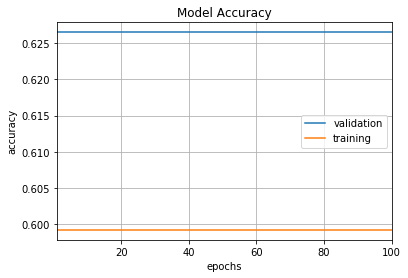

83/83 [==============================] - 0s 284us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6623018628143402, 0.626506028405155]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.7428 - acc: 0.5619 - val_loss: 0.6855 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.6797 - acc: 0.5779 - val_loss: 0.6502 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6685 - acc: 0.5885 - val_loss: 0.6337 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: 0.6670 - acc: 0.6099 - val_loss: 0.6363 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.6584 - acc: 0.6245 - val_loss: 0.6304 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6553 - acc: 0.6178 - val_loss: 0.6243 - val_acc: 0.6386
Epoch 7/100
 - 0s - loss: 0.6485 - acc: 0.6405 - val_loss: 0.6219 - val_acc: 0.6386
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5813 - acc: 0.7204 - val_loss: 0.5990 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.5807 - acc: 0.7164 - val_loss: 0.5910 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.5806 - acc: 0.7190 - val_loss: 0.5913 - val_acc: 0.6265
Epoch 96/100
 - 0s - loss: 0.5802 - acc: 0.7244 - val_loss: 0.5929 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.5809 - acc: 0.7230 - val_loss: 0.5893 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.5796 - acc: 0.7217 - val_loss: 0.5883 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.5787 - acc: 0.7124 - val_loss: 0.5910 - val_acc: 0.6265
Epoch 100/100
 - 0s - loss: 0.5785 - acc: 0.7297 - val_loss: 0.6015 - val_acc: 0.6747


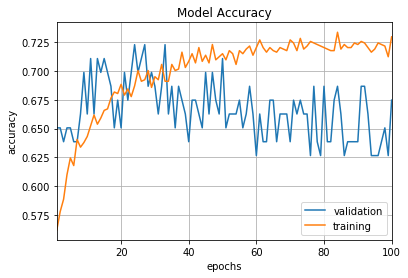

83/83 [==============================] - 0s 277us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6015012494052749, 0.6746987930263382]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.6650 - acc: 0.6005 - val_loss: 0.6532 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.6629 - acc: 0.6005 - val_loss: 0.6527 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6613 - acc: 0.6005 - val_loss: 0.6531 - val_acc: 0.6145
Epoch 4/100
 - 0s - loss: 0.6611 - acc: 0.6005 - val_loss: 0.6520 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6605 - acc: 0.6005 - val_loss: 0.6533 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6606 - acc: 0.6005 - val_loss: 0.6541 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6604 - acc: 0.6019 - val_loss: 0.6513 - val_acc: 0.6145
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6377 - acc: 0.6458 - val_loss: 0.6279 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.6388 - acc: 0.6445 - val_loss: 0.6273 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.6385 - acc: 0.6445 - val_loss: 0.6329 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.6389 - acc: 0.6511 - val_loss: 0.6278 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.6375 - acc: 0.6391 - val_loss: 0.6262 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.6371 - acc: 0.6445 - val_loss: 0.6262 - val_acc: 0.6747
Epoch 99/100
 - 0s - loss: 0.6369 - acc: 0.6431 - val_loss: 0.6251 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.6364 - acc: 0.6498 - val_loss: 0.6251 - val_acc: 0.6747


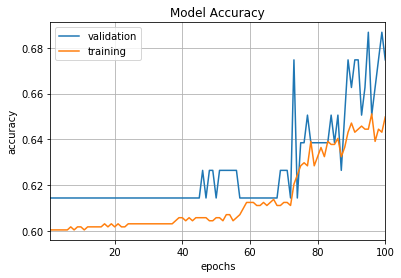

83/83 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.6251031397336937, 0.6746987980532358]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 9s - loss: 0.7069 - acc: 0.5832 - val_loss: 0.6915 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.6770 - acc: 0.6112 - val_loss: 0.6924 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.6744 - acc: 0.6099 - val_loss: 0.6928 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.6731 - acc: 0.6085 - val_loss: 0.6942 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.6669 - acc: 0.6245 - val_loss: 0.6756 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6567 - acc: 0.6445 - val_loss: 0.6694 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6510 - acc: 0.6591 - val_loss: 0.6579 - val_acc: 0.6024
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5748 - acc: 0.7230 - val_loss: 0.5966 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5765 - acc: 0.7257 - val_loss: 0.5971 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5760 - acc: 0.7257 - val_loss: 0.6005 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5748 - acc: 0.7310 - val_loss: 0.5992 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5752 - acc: 0.7284 - val_loss: 0.6071 - val_acc: 0.6506
Epoch 98/100
 - 0s - loss: 0.5764 - acc: 0.7257 - val_loss: 0.5976 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5755 - acc: 0.7257 - val_loss: 0.5959 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5760 - acc: 0.7284 - val_loss: 0.5969 - val_acc: 0.6988


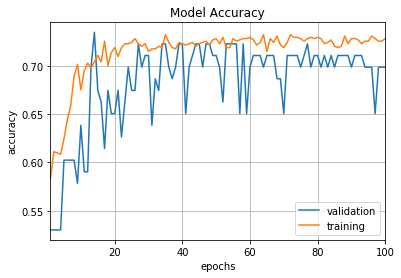

83/83 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.5969354969909392, 0.6987951785685068]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.7519 - acc: 0.5739 - val_loss: 0.9502 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: 0.6741 - acc: 0.6112 - val_loss: 0.6562 - val_acc: 0.6386
Epoch 3/100
 - 0s - loss: 0.6574 - acc: 0.6378 - val_loss: 0.6760 - val_acc: 0.5783
Epoch 4/100
 - 0s - loss: 0.6397 - acc: 0.6325 - val_loss: 0.7284 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.6444 - acc: 0.6605 - val_loss: 0.6644 - val_acc: 0.5783
Epoch 6/100
 - 0s - loss: 0.6380 - acc: 0.6365 - val_loss: 0.6994 - val_acc: 0.6506
Epoch 7/100
 - 0s - loss: 0.6246 - acc: 0.6538 - val_loss: 0.8076 - val_acc: 0.4217
Epoch 8

Epoch 93/100
 - 0s - loss: 0.5746 - acc: 0.7150 - val_loss: 0.6196 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.5771 - acc: 0.7164 - val_loss: 0.6228 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5722 - acc: 0.7204 - val_loss: 0.6194 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5734 - acc: 0.7124 - val_loss: 0.6156 - val_acc: 0.6867
Epoch 97/100
 - 0s - loss: 0.5707 - acc: 0.7257 - val_loss: 0.6474 - val_acc: 0.6747
Epoch 98/100
 - 0s - loss: 0.5759 - acc: 0.7164 - val_loss: 0.6173 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5732 - acc: 0.7137 - val_loss: 0.6167 - val_acc: 0.7108
Epoch 100/100
 - 0s - loss: 0.5745 - acc: 0.7084 - val_loss: 0.6169 - val_acc: 0.6386


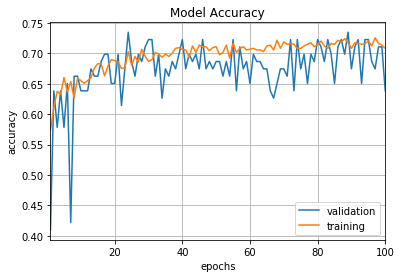

83/83 [==============================] - 0s 357us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6168789439890758, 0.6385542161493416]
 best Score: 0.7738095209712074          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7738095209712074
0.6893000573723466


[[0.6297002803711664, 0.6547619076002211],
 [0.5729617334547497, 0.7738095209712074],
 [0.5813056741441999, 0.7261904761904762],
 [0.5796843994231451, 0.7261904761904762],
 [0.6208787301936781, 0.6987951785685068],
 [0.6623018628143402, 0.626506028405155],
 [0.6015012494052749, 0.6746987930263382],
 [0.6251031397336937, 0.6746987980532358],
 [0.5969354969909392, 0.6987951785685068],
 [0.6168789439890758, 0.6385542161493416]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6991826020320469


[0.727999997138977,
 0.7173333330949148,
 0.7106666688124339,
 0.7053333342075347,
 0.7150466040510948,
 0.5992010692940571,
 0.7296937427095345,
 0.64980027031962,
 0.728362185262967,
 0.7083888154293345]

# 10 #losses.sparse_categorical_crossentropy,
              

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7738095209712074
0.6893000573723466


[[0.6297002803711664, 0.6547619076002211],
 [0.5729617334547497, 0.7738095209712074],
 [0.5813056741441999, 0.7261904761904762],
 [0.5796843994231451, 0.7261904761904762],
 [0.6208787301936781, 0.6987951785685068],
 [0.6623018628143402, 0.626506028405155],
 [0.6015012494052749, 0.6746987930263382],
 [0.6251031397336937, 0.6746987980532358],
 [0.5969354969909392, 0.6987951785685068],
 [0.6168789439890758, 0.6385542161493416]]

In [ ]:
kfold_accuracy_score_store

[0.727999997138977,
 0.7173333330949148,
 0.7106666688124339,
 0.7053333342075347,
 0.7150466040510948,
 0.5992010692940571,
 0.7296937427095345,
 0.64980027031962,
 0.728362185262967,
 0.7083888154293345]

# 11 #losses.binary_crossentropy,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 1.0802 - acc: 0.5240 - val_loss: 0.6912 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.6813 - acc: 0.5760 - val_loss: 0.6811 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.6800 - acc: 0.5960 - val_loss: 0.7116 - val_acc: 0.4048
Epoch 4/100
 - 0s - loss: 0.6752 - acc: 0.5973 - val_loss: 0.6749 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6639 - acc: 0.6067 - val_loss: 0.6910 - val_acc: 0.5357
Epoch 6/100
 - 0s - loss: 0.6667 - acc: 0.6093 - val_loss: 0.6751 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.6595 - acc: 0.6147 - val_loss: 0.6744 - val_acc: 0.6190
Epoch 8/100
 - 0s - loss: 0.6562 - acc: 0.6093 - val_loss: 0.6744 - val_acc: 0.6310
Epoch 9/100
 - 0s - loss: 0.6570 - acc: 0.6093 - val_loss: 0.6660 - val_acc: 0.6190
Epoch 10/100
 - 0s - loss: 0.6543 - acc: 0.6267 - val_loss: 0.6683 - val_acc: 0.6071
Epoch 11/100
 - 0s - loss: 0.6519 - acc: 0.6253 - val_loss: 0.6652 - val_acc: 0.6310
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.5953 - acc: 0.7053 - val_loss: 0.6336 - val_acc: 0.6429
Epoch 98/100
 - 0s - loss: 0.5954 - acc: 0.7013 - val_loss: 0.6323 - val_acc: 0.6548
Epoch 99/100
 - 0s - loss: 0.5943 - acc: 0.7120 - val_loss: 0.6324 - val_acc: 0.6548
Epoch 100/100
 - 0s - loss: 0.5949 - acc: 0.7027 - val_loss: 0.6322 - val_acc: 0.6548


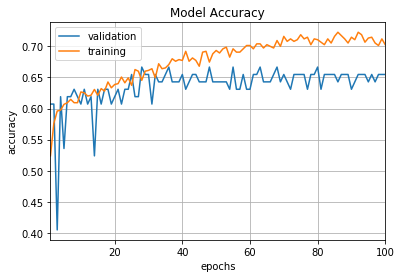

84/84 [==============================] - 0s 206us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6321538289388021, 0.6547619047619048]
 best Score: 0.6547619047619048          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.6812 - acc: 0.5920 - val_loss: 0.6340 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.6508 - acc: 0.6227 - val_loss: 0.6235 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.6457 - acc: 0.6280 - val_loss: 0.6158 - val_acc: 0.6786
Epoch 4/100
 - 0s - loss: 0.6380 - acc: 0.6467 - val_loss: 0.6095 - val_acc: 0.6190
Epoch 5/100
 - 0s - loss: 0.6330 - acc: 0.6533 - val_loss: 0.6091 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.6305 - acc: 0.6787 - val_loss: 0.6032 - val_acc: 0.6786
Epoch 7/100
 - 0s - loss: 0.6273 - acc: 0.6747 - val_loss: 0.6013 - val_acc: 0.6905
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5765 - acc: 0.7120 - val_loss: 0.5743 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5761 - acc: 0.7187 - val_loss: 0.5706 - val_acc: 0.7857
Epoch 95/100
 - 0s - loss: 0.5745 - acc: 0.7160 - val_loss: 0.5676 - val_acc: 0.7857
Epoch 96/100
 - 0s - loss: 0.5758 - acc: 0.7107 - val_loss: 0.5666 - val_acc: 0.7857
Epoch 97/100
 - 0s - loss: 0.5749 - acc: 0.7160 - val_loss: 0.5658 - val_acc: 0.7738
Epoch 98/100
 - 0s - loss: 0.5733 - acc: 0.7293 - val_loss: 0.5708 - val_acc: 0.7857
Epoch 99/100
 - 0s - loss: 0.5750 - acc: 0.7187 - val_loss: 0.5677 - val_acc: 0.7857
Epoch 100/100
 - 0s - loss: 0.5754 - acc: 0.7107 - val_loss: 0.5737 - val_acc: 0.7619


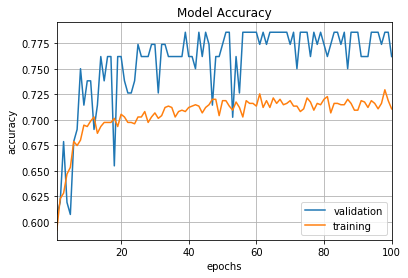

84/84 [==============================] - 0s 185us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5737483018920535, 0.7619047590664455]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.6664 - acc: 0.5893 - val_loss: 0.6646 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6635 - acc: 0.6027 - val_loss: 0.6608 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6612 - acc: 0.6027 - val_loss: 0.6692 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6610 - acc: 0.6040 - val_loss: 0.6620 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6584 - acc: 0.6040 - val_loss: 0.6578 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.6564 - acc: 0.6040 - val_loss: 0.6606 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6556 - acc: 0.6027 - val_loss: 0.6559 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.6024 - acc: 0.6973 - val_loss: 0.5946 - val_acc: 0.6667
Epoch 94/100
 - 0s - loss: 0.6019 - acc: 0.6920 - val_loss: 0.5935 - val_acc: 0.6786
Epoch 95/100
 - 0s - loss: 0.6019 - acc: 0.6933 - val_loss: 0.5927 - val_acc: 0.6905
Epoch 96/100
 - 0s - loss: 0.6011 - acc: 0.6987 - val_loss: 0.5940 - val_acc: 0.6786
Epoch 97/100
 - 0s - loss: 0.6009 - acc: 0.6920 - val_loss: 0.5919 - val_acc: 0.6786
Epoch 98/100
 - 0s - loss: 0.6005 - acc: 0.6960 - val_loss: 0.5914 - val_acc: 0.6905
Epoch 99/100
 - 0s - loss: 0.6000 - acc: 0.6973 - val_loss: 0.5923 - val_acc: 0.6786
Epoch 100/100
 - 0s - loss: 0.5998 - acc: 0.6933 - val_loss: 0.5905 - val_acc: 0.6905


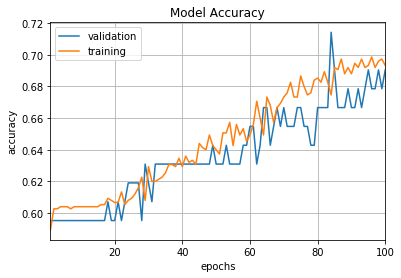

84/84 [==============================] - 0s 191us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5904843580155146, 0.6904761847995576]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 10s - loss: 0.8202 - acc: 0.5653 - val_loss: 0.6849 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.6777 - acc: 0.6133 - val_loss: 0.6832 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.6750 - acc: 0.6093 - val_loss: 0.6804 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.6726 - acc: 0.6080 - val_loss: 0.6808 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.6702 - acc: 0.6133 - val_loss: 0.6705 - val_acc: 0.5833
Epoch 6/100
 - 0s - loss: 0.6655 - acc: 0.6253 - val_loss: 0.6663 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.6638 - acc: 0.6280 - val_loss: 0.6625 - val_acc: 0.5952
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5869 - acc: 0.7213 - val_loss: 0.5845 - val_acc: 0.7381
Epoch 94/100
 - 0s - loss: 0.5860 - acc: 0.7160 - val_loss: 0.5843 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5864 - acc: 0.7173 - val_loss: 0.5853 - val_acc: 0.7500
Epoch 96/100
 - 0s - loss: 0.5860 - acc: 0.7160 - val_loss: 0.5881 - val_acc: 0.7381
Epoch 97/100
 - 0s - loss: 0.5853 - acc: 0.7227 - val_loss: 0.5876 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.5854 - acc: 0.7147 - val_loss: 0.5822 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.5859 - acc: 0.7160 - val_loss: 0.5869 - val_acc: 0.7500
Epoch 100/100
 - 0s - loss: 0.5851 - acc: 0.7200 - val_loss: 0.5879 - val_acc: 0.7381


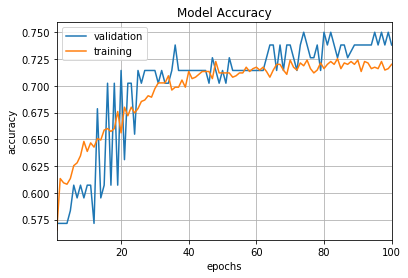

84/84 [==============================] - 0s 203us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.5878774353436061, 0.7380952380952381]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 1.3920 - acc: 0.5819 - val_loss: 0.6990 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.6571 - acc: 0.5992 - val_loss: 0.6701 - val_acc: 0.5904
Epoch 3/100
 - 0s - loss: 0.6467 - acc: 0.6192 - val_loss: 0.6636 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6434 - acc: 0.6218 - val_loss: 0.6864 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6400 - acc: 0.6365 - val_loss: 0.6606 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6321 - acc: 0.6525 - val_loss: 0.6646 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6277 - acc: 0.6511 - val_loss: 0.6514 - val_acc: 0.6506
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5752 - acc: 0.7204 - val_loss: 0.6234 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.5760 - acc: 0.7257 - val_loss: 0.6243 - val_acc: 0.6386
Epoch 95/100
 - 0s - loss: 0.5762 - acc: 0.7244 - val_loss: 0.6230 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.5754 - acc: 0.7204 - val_loss: 0.6261 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.5757 - acc: 0.7204 - val_loss: 0.6278 - val_acc: 0.6627
Epoch 98/100
 - 0s - loss: 0.5761 - acc: 0.7177 - val_loss: 0.6257 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.5750 - acc: 0.7124 - val_loss: 0.6281 - val_acc: 0.6627
Epoch 100/100
 - 0s - loss: 0.5753 - acc: 0.7217 - val_loss: 0.6256 - val_acc: 0.6506


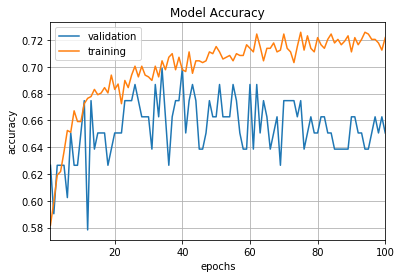

83/83 [==============================] - 0s 269us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6255845513688513, 0.6506024074841694]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.8694 - acc: 0.5513 - val_loss: 0.7373 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.7065 - acc: 0.5846 - val_loss: 0.6833 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.6858 - acc: 0.5885 - val_loss: 0.7727 - val_acc: 0.4217
Epoch 4/100
 - 0s - loss: 0.6865 - acc: 0.5992 - val_loss: 0.6774 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6748 - acc: 0.6125 - val_loss: 0.6650 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6598 - acc: 0.6232 - val_loss: 0.7899 - val_acc: 0.3735
Epoch 7/100
 - 0s - loss: 0.6584 - acc: 0.6099 - val_loss: 0.6955 - val_acc: 0.6265
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5844 - acc: 0.7150 - val_loss: 0.5794 - val_acc: 0.6747
Epoch 94/100
 - 0s - loss: 0.5854 - acc: 0.7111 - val_loss: 0.5756 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.5846 - acc: 0.7150 - val_loss: 0.5777 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.5806 - acc: 0.7084 - val_loss: 0.5926 - val_acc: 0.7349
Epoch 97/100
 - 0s - loss: 0.5849 - acc: 0.7031 - val_loss: 0.5736 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5854 - acc: 0.7150 - val_loss: 0.5796 - val_acc: 0.7711
Epoch 99/100
 - 0s - loss: 0.5836 - acc: 0.7164 - val_loss: 0.5792 - val_acc: 0.7590
Epoch 100/100
 - 0s - loss: 0.5833 - acc: 0.7137 - val_loss: 0.5729 - val_acc: 0.7108


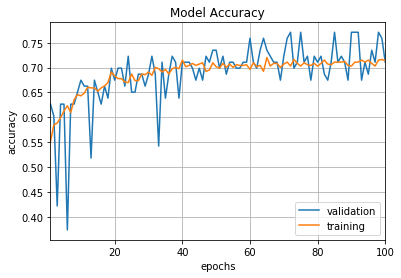

83/83 [==============================] - 0s 209us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.5728628937020359, 0.7108433778027454]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 10s - loss: 0.7238 - acc: 0.5912 - val_loss: 0.6241 - val_acc: 0.6627
Epoch 2/100
 - 0s - loss: 0.6472 - acc: 0.6099 - val_loss: 0.6712 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.6437 - acc: 0.6338 - val_loss: 0.6268 - val_acc: 0.6867
Epoch 4/100
 - 0s - loss: 0.6346 - acc: 0.6471 - val_loss: 0.6184 - val_acc: 0.6988
Epoch 5/100
 - 1s - loss: 0.6301 - acc: 0.6565 - val_loss: 0.6123 - val_acc: 0.6747
Epoch 6/100
 - 0s - loss: 0.6249 - acc: 0.6631 - val_loss: 0.6050 - val_acc: 0.6867
Epoch 7/100
 - 0s - loss: 0.6240 - acc: 0.6565 - val_loss: 0.6128 - val_acc: 0.6747
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5736 - acc: 0.7164 - val_loss: 0.5824 - val_acc: 0.6627
Epoch 94/100
 - 0s - loss: 0.5735 - acc: 0.7284 - val_loss: 0.5824 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.5735 - acc: 0.7230 - val_loss: 0.5804 - val_acc: 0.6627
Epoch 96/100
 - 0s - loss: 0.5737 - acc: 0.7257 - val_loss: 0.5811 - val_acc: 0.6627
Epoch 97/100
 - 0s - loss: 0.5733 - acc: 0.7217 - val_loss: 0.5837 - val_acc: 0.6506
Epoch 98/100
 - 0s - loss: 0.5732 - acc: 0.7230 - val_loss: 0.5810 - val_acc: 0.6627
Epoch 99/100
 - 0s - loss: 0.5737 - acc: 0.7204 - val_loss: 0.5953 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.5734 - acc: 0.7190 - val_loss: 0.5825 - val_acc: 0.6627


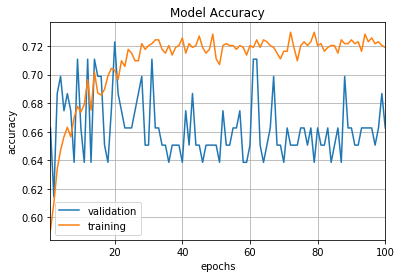

83/83 [==============================] - 0s 192us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.5824683107525469, 0.6626506002552538]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.7116 - acc: 0.5739 - val_loss: 0.7669 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.6821 - acc: 0.5672 - val_loss: 0.6627 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6713 - acc: 0.6019 - val_loss: 0.6915 - val_acc: 0.5181
Epoch 4/100
 - 0s - loss: 0.6677 - acc: 0.6032 - val_loss: 0.6436 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.6646 - acc: 0.6059 - val_loss: 0.6473 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.6596 - acc: 0.5979 - val_loss: 0.6375 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6515 - acc: 0.6205 - val_loss: 0.6352 - val_acc: 0.6145
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5798 - acc: 0.7230 - val_loss: 0.5631 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.5829 - acc: 0.7111 - val_loss: 0.5627 - val_acc: 0.7229
Epoch 95/100
 - 0s - loss: 0.5812 - acc: 0.7071 - val_loss: 0.5639 - val_acc: 0.7470
Epoch 96/100
 - 1s - loss: 0.5813 - acc: 0.7150 - val_loss: 0.5605 - val_acc: 0.7590
Epoch 97/100
 - 0s - loss: 0.5809 - acc: 0.7124 - val_loss: 0.5628 - val_acc: 0.7470
Epoch 98/100
 - 0s - loss: 0.5801 - acc: 0.7150 - val_loss: 0.5606 - val_acc: 0.7349
Epoch 99/100
 - 0s - loss: 0.5812 - acc: 0.7111 - val_loss: 0.5604 - val_acc: 0.7470
Epoch 100/100
 - 0s - loss: 0.5812 - acc: 0.7124 - val_loss: 0.5627 - val_acc: 0.7470


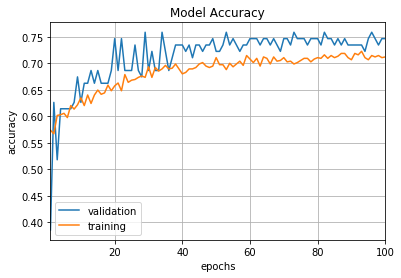

83/83 [==============================] - 0s 202us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.562735065997365, 0.7469879532434854]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.6729 - acc: 0.5952 - val_loss: 0.6859 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.6628 - acc: 0.6099 - val_loss: 0.6783 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.6625 - acc: 0.6099 - val_loss: 0.6868 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.6620 - acc: 0.6099 - val_loss: 0.6783 - val_acc: 0.5301
Epoch 5/100
 - 1s - loss: 0.6615 - acc: 0.6099 - val_loss: 0.6779 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.6606 - acc: 0.6099 - val_loss: 0.6828 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.6599 - acc: 0.6099 - val_loss: 0.6760 - val_acc: 0.5301
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6144 - acc: 0.6751 - val_loss: 0.6158 - val_acc: 0.6265
Epoch 94/100
 - 0s - loss: 0.6136 - acc: 0.6724 - val_loss: 0.6149 - val_acc: 0.6265
Epoch 95/100
 - 0s - loss: 0.6124 - acc: 0.6751 - val_loss: 0.6126 - val_acc: 0.6386
Epoch 96/100
 - 0s - loss: 0.6114 - acc: 0.6844 - val_loss: 0.6139 - val_acc: 0.6265
Epoch 97/100
 - 0s - loss: 0.6103 - acc: 0.6804 - val_loss: 0.6143 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.6099 - acc: 0.6751 - val_loss: 0.6120 - val_acc: 0.6265
Epoch 99/100
 - 0s - loss: 0.6088 - acc: 0.6844 - val_loss: 0.6080 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.6081 - acc: 0.6937 - val_loss: 0.6071 - val_acc: 0.6867


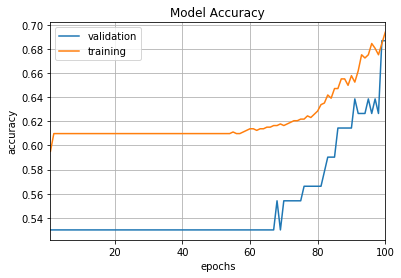

83/83 [==============================] - 0s 184us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.6070547168513378, 0.6867469857974224]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 11s - loss: 0.7494 - acc: 0.5939 - val_loss: 0.6811 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6798 - acc: 0.6019 - val_loss: 0.6785 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.6778 - acc: 0.6019 - val_loss: 0.6770 - val_acc: 0.6024
Epoch 4/100
 - 1s - loss: 0.6766 - acc: 0.6019 - val_loss: 0.6758 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: 0.6756 - acc: 0.6019 - val_loss: 0.6750 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: 0.6748 - acc: 0.6019 - val_loss: 0.6743 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.6743 - acc: 0.6019 - val_loss: 0.6739 - val_acc: 0.6024
Epoch 8

Epoch 93/100
 - 0s - loss: 0.6684 - acc: 0.6072 - val_loss: 0.6773 - val_acc: 0.5904
Epoch 94/100
 - 0s - loss: 0.6658 - acc: 0.6165 - val_loss: 0.6791 - val_acc: 0.5904
Epoch 95/100
 - 0s - loss: 0.6648 - acc: 0.6112 - val_loss: 0.6824 - val_acc: 0.5783
Epoch 96/100
 - 0s - loss: 0.6646 - acc: 0.6178 - val_loss: 0.6784 - val_acc: 0.5904
Epoch 97/100
 - 0s - loss: 0.6604 - acc: 0.6258 - val_loss: 0.6761 - val_acc: 0.5783
Epoch 98/100
 - 0s - loss: 0.6600 - acc: 0.6232 - val_loss: 0.6750 - val_acc: 0.5904
Epoch 99/100
 - 0s - loss: 0.6597 - acc: 0.6258 - val_loss: 0.6733 - val_acc: 0.5904
Epoch 100/100
 - 0s - loss: 0.6563 - acc: 0.6378 - val_loss: 0.6770 - val_acc: 0.5783


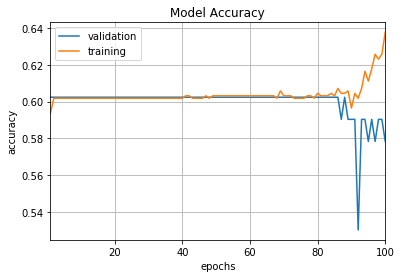

83/83 [==============================] - 0s 244us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.6770016292491591, 0.5783132555254971]
 best Score: 0.7619047590664455          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.binary_crossentropy,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7619047590664455
0.688138266683172


[[0.6321538289388021, 0.6547619047619048],
 [0.5737483018920535, 0.7619047590664455],
 [0.5904843580155146, 0.6904761847995576],
 [0.5878774353436061, 0.7380952380952381],
 [0.6255845513688513, 0.6506024074841694],
 [0.5728628937020359, 0.7108433778027454],
 [0.5824683107525469, 0.6626506002552538],
 [0.562735065997365, 0.7469879532434854],
 [0.6070547168513378, 0.6867469857974224],
 [0.6770016292491591, 0.5783132555254971]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7025068815780436


[0.7026666708787283,
 0.710666666229566,
 0.6933333353201548,
 0.720000001390775,
 0.7217043936649429,
 0.7137150470013625,
 0.7190412771844673,
 0.7123834913405533,
 0.6937416817313345,
 0.6378162510385526]

# 12 #losses.kullback_leibler_divergence,
              

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 1.6265 - acc: 0.4787 - val_loss: 0.6813 - val_acc: 0.5952
Epoch 2/100
 - 0s - loss: 0.6629 - acc: 0.6013 - val_loss: 0.6792 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.6590 - acc: 0.6027 - val_loss: 0.6797 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6502 - acc: 0.6067 - val_loss: 0.6714 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.6413 - acc: 0.6187 - val_loss: 0.6570 - val_acc: 0.5595
Epoch 6/100
 - 0s - loss: 0.6317 - acc: 0.6373 - val_loss: 0.6583 - val_acc: 0.5595
Epoch 7/100
 - 0s - loss: 0.6241 - acc: 0.6480 - val_loss: 0.6513 - val_acc: 0.5833
Epoch 8/100
 - 0s - loss: 0.6184 - acc: 0.6613 - val_loss: 0.6486 - val_acc: 0.5833
Epoch 9/100
 - 0s - loss: 0.6136 - acc: 0.6533 - val_loss: 0.6466 - val_acc: 0.6071
Epoch 10/100
 - 0s - loss: 0.6106 - acc: 0.6840 - val_loss: 0.6459 - val_acc: 0.5952
Epoch 11/100
 - 0s - loss: 0.6075 - acc: 0.6867 - val_loss: 0.6441 - val_acc: 0.6071
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.5656 - acc: 0.7333 - val_loss: 0.6412 - val_acc: 0.6190
Epoch 98/100
 - 0s - loss: 0.5648 - acc: 0.7333 - val_loss: 0.6431 - val_acc: 0.6071
Epoch 99/100
 - 0s - loss: 0.5647 - acc: 0.7400 - val_loss: 0.6405 - val_acc: 0.6190
Epoch 100/100
 - 0s - loss: 0.5640 - acc: 0.7373 - val_loss: 0.6466 - val_acc: 0.6429


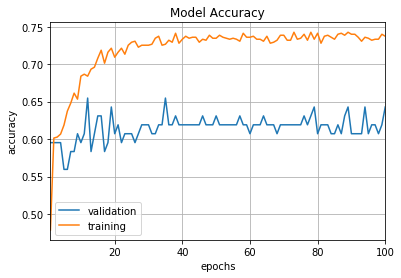

84/84 [==============================] - 0s 199us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.6465552278927394, 0.6428571400188264]
 best Score: 0.6428571400188264          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 11s - loss: 0.6948 - acc: 0.6200 - val_loss: 0.6620 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 0.6548 - acc: 0.6387 - val_loss: 0.6621 - val_acc: 0.6429
Epoch 3/100
 - 0s - loss: 0.6504 - acc: 0.6147 - val_loss: 0.6448 - val_acc: 0.6429
Epoch 4/100
 - 1s - loss: 0.6404 - acc: 0.6387 - val_loss: 0.6363 - val_acc: 0.7262
Epoch 5/100
 - 1s - loss: 0.6347 - acc: 0.6533 - val_loss: 0.6336 - val_acc: 0.6786
Epoch 6/100
 - 0s - loss: 0.6295 - acc: 0.6533 - val_loss: 0.6687 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.6264 - acc: 0.6627 - val_loss: 0.6285 - val_acc: 0.7143
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.5804 - acc: 0.7107 - val_loss: 0.5812 - val_acc: 0.7619
Epoch 94/100
 - 0s - loss: 0.5800 - acc: 0.7080 - val_loss: 0.5732 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.5806 - acc: 0.7107 - val_loss: 0.5770 - val_acc: 0.7619
Epoch 96/100
 - 0s - loss: 0.5817 - acc: 0.7093 - val_loss: 0.5753 - val_acc: 0.7619
Epoch 97/100
 - 0s - loss: 0.5817 - acc: 0.7147 - val_loss: 0.5781 - val_acc: 0.7500
Epoch 98/100
 - 0s - loss: 0.5792 - acc: 0.7080 - val_loss: 0.5759 - val_acc: 0.7738
Epoch 99/100
 - 0s - loss: 0.5801 - acc: 0.7160 - val_loss: 0.5758 - val_acc: 0.7738
Epoch 100/100
 - 0s - loss: 0.5807 - acc: 0.7093 - val_loss: 0.5772 - val_acc: 0.7619


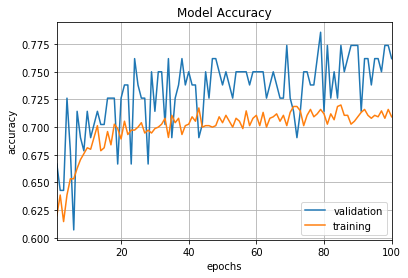

84/84 [==============================] - 0s 237us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.5771593224434626, 0.761904756228129]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 12s - loss: 0.7328 - acc: 0.5467 - val_loss: 0.6826 - val_acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.6787 - acc: 0.6013 - val_loss: 0.6771 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.6757 - acc: 0.6067 - val_loss: 0.6765 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.6727 - acc: 0.6067 - val_loss: 0.6707 - val_acc: 0.6071
Epoch 5/100
 - 0s - loss: 0.6707 - acc: 0.6093 - val_loss: 0.6709 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.6681 - acc: 0.6200 - val_loss: 0.6728 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.6671 - acc: 0.6120 - val_loss: 0.6665 - val_acc: 0.6071
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5874 - acc: 0.7240 - val_loss: 0.5835 - val_acc: 0.7262
Epoch 94/100
 - 0s - loss: 0.5881 - acc: 0.7227 - val_loss: 0.5850 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.5870 - acc: 0.7240 - val_loss: 0.5838 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.5862 - acc: 0.7187 - val_loss: 0.5862 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.5867 - acc: 0.7187 - val_loss: 0.5836 - val_acc: 0.7262
Epoch 98/100
 - 0s - loss: 0.5865 - acc: 0.7187 - val_loss: 0.5818 - val_acc: 0.7262
Epoch 99/100
 - 0s - loss: 0.5864 - acc: 0.7160 - val_loss: 0.5819 - val_acc: 0.7262
Epoch 100/100
 - 0s - loss: 0.5860 - acc: 0.7213 - val_loss: 0.5848 - val_acc: 0.7024


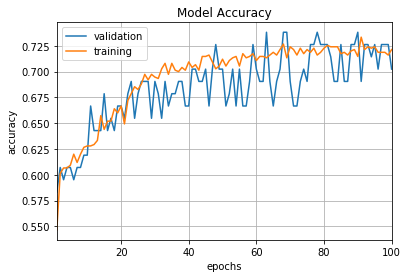

84/84 [==============================] - 0s 371us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.5848084574653989, 0.702380949542636]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 12s - loss: 0.6838 - acc: 0.6053 - val_loss: 0.6850 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: 0.6780 - acc: 0.6053 - val_loss: 0.6836 - val_acc: 0.5714
Epoch 3/100
 - 0s - loss: 0.6757 - acc: 0.6053 - val_loss: 0.6831 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: 0.6744 - acc: 0.6053 - val_loss: 0.6829 - val_acc: 0.5714
Epoch 5/100
 - 0s - loss: 0.6735 - acc: 0.6053 - val_loss: 0.6829 - val_acc: 0.5714
Epoch 6/100
 - 0s - loss: 0.6730 - acc: 0.6053 - val_loss: 0.6829 - val_acc: 0.5714
Epoch 7/100
 - 0s - loss: 0.6725 - acc: 0.6053 - val_loss: 0.6830 - val_acc: 0.5714
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 94/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 95/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 96/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 97/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 98/100
 - 1s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 99/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714
Epoch 100/100
 - 0s - loss: 0.6708 - acc: 0.6053 - val_loss: 0.6852 - val_acc: 0.5714


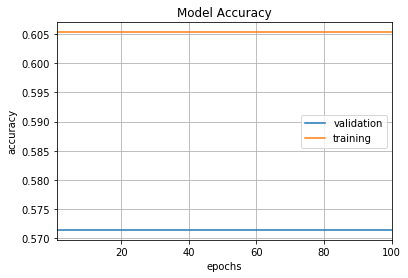

84/84 [==============================] - 0s 222us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.6852262899989173, 0.5714285742668879]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 0.6623 - acc: 0.5979 - val_loss: 0.6571 - val_acc: 0.6265
Epoch 2/100
 - 1s - loss: 0.6573 - acc: 0.5992 - val_loss: 0.6581 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6558 - acc: 0.5992 - val_loss: 0.6562 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: 0.6543 - acc: 0.5992 - val_loss: 0.6555 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6525 - acc: 0.5992 - val_loss: 0.6550 - val_acc: 0.6265
Epoch 6/100
 - 1s - loss: 0.6517 - acc: 0.5992 - val_loss: 0.6545 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6507 - acc: 0.5992 - val_loss: 0.6537 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5688 - acc: 0.7244 - val_loss: 0.6142 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5691 - acc: 0.7177 - val_loss: 0.6179 - val_acc: 0.6747
Epoch 95/100
 - 0s - loss: 0.5684 - acc: 0.7310 - val_loss: 0.6130 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.5688 - acc: 0.7230 - val_loss: 0.6197 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5679 - acc: 0.7230 - val_loss: 0.6158 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.5688 - acc: 0.7257 - val_loss: 0.6148 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5687 - acc: 0.7257 - val_loss: 0.6205 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.5680 - acc: 0.7244 - val_loss: 0.6215 - val_acc: 0.6867


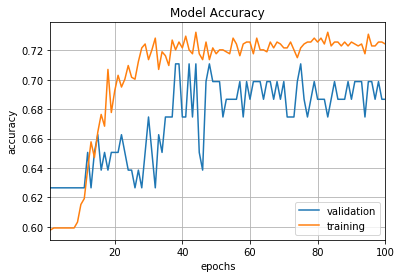

83/83 [==============================] - 0s 264us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.6214724161538733, 0.6867469857974224]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 7.3900 - acc: 0.4008 - val_loss: 1.3592 - val_acc: 0.3735
Epoch 2/100
 - 1s - loss: 0.7775 - acc: 0.4993 - val_loss: 0.6705 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.6812 - acc: 0.5992 - val_loss: 0.6649 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.6796 - acc: 0.5992 - val_loss: 0.6639 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.6796 - acc: 0.5992 - val_loss: 0.6632 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.6775 - acc: 0.5992 - val_loss: 0.6626 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.6763 - acc: 0.5992 - val_loss: 0.6662 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6238 - acc: 0.6644 - val_loss: 0.6190 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.6230 - acc: 0.6538 - val_loss: 0.6164 - val_acc: 0.6627
Epoch 95/100
 - 0s - loss: 0.6222 - acc: 0.6378 - val_loss: 0.6170 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.6212 - acc: 0.6631 - val_loss: 0.6167 - val_acc: 0.6386
Epoch 97/100
 - 0s - loss: 0.6207 - acc: 0.6591 - val_loss: 0.6155 - val_acc: 0.6386
Epoch 98/100
 - 0s - loss: 0.6199 - acc: 0.6724 - val_loss: 0.6155 - val_acc: 0.6386
Epoch 99/100
 - 0s - loss: 0.6193 - acc: 0.6658 - val_loss: 0.6179 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.6189 - acc: 0.6818 - val_loss: 0.6148 - val_acc: 0.6747


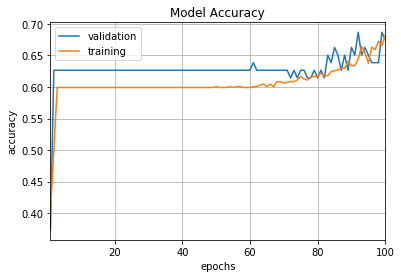

83/83 [==============================] - 0s 364us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.6147920281054026, 0.6746987976941717]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.6868 - acc: 0.5965 - val_loss: 0.6775 - val_acc: 0.6506
Epoch 2/100
 - 0s - loss: 0.6823 - acc: 0.5965 - val_loss: 0.6726 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6803 - acc: 0.5965 - val_loss: 0.6690 - val_acc: 0.6506
Epoch 4/100
 - 0s - loss: 0.6788 - acc: 0.5965 - val_loss: 0.6670 - val_acc: 0.6506
Epoch 5/100
 - 0s - loss: 0.6780 - acc: 0.5965 - val_loss: 0.6650 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6773 - acc: 0.5965 - val_loss: 0.6638 - val_acc: 0.6506
Epoch 7/100
 - 1s - loss: 0.6768 - acc: 0.5965 - val_loss: 0.6629 - val_acc: 0.6506
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6534 - val_acc: 0.6506
Epoch 94/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6533 - val_acc: 0.6506
Epoch 95/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6533 - val_acc: 0.6506
Epoch 96/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6534 - val_acc: 0.6506
Epoch 97/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6533 - val_acc: 0.6506
Epoch 98/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6534 - val_acc: 0.6506
Epoch 99/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6534 - val_acc: 0.6506
Epoch 100/100
 - 0s - loss: 0.6744 - acc: 0.5965 - val_loss: 0.6534 - val_acc: 0.6506


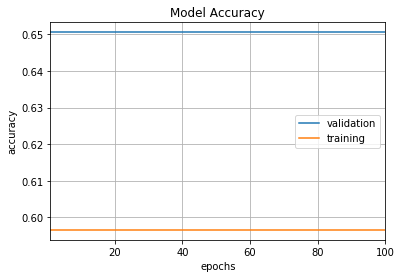

83/83 [==============================] - 0s 308us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.6533698856112469, 0.650602408920426]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 12s - loss: 1.0372 - acc: 0.3995 - val_loss: 0.7673 - val_acc: 0.3855
Epoch 2/100
 - 0s - loss: 0.7266 - acc: 0.3848 - val_loss: 0.7065 - val_acc: 0.3494
Epoch 3/100
 - 0s - loss: 0.6929 - acc: 0.5379 - val_loss: 0.6872 - val_acc: 0.5904
Epoch 4/100
 - 0s - loss: 0.6808 - acc: 0.6045 - val_loss: 0.6799 - val_acc: 0.5904
Epoch 5/100
 - 0s - loss: 0.6754 - acc: 0.6085 - val_loss: 0.6739 - val_acc: 0.6145
Epoch 6/100
 - 0s - loss: 0.6727 - acc: 0.6019 - val_loss: 0.6709 - val_acc: 0.6145
Epoch 7/100
 - 0s - loss: 0.6715 - acc: 0.6019 - val_loss: 0.6697 - val_acc: 0.6145
Epoch 8/10

Epoch 93/100
 - 0s - loss: 0.5966 - acc: 0.7164 - val_loss: 0.5908 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.5961 - acc: 0.7111 - val_loss: 0.5870 - val_acc: 0.6988
Epoch 95/100
 - 0s - loss: 0.5956 - acc: 0.7111 - val_loss: 0.5892 - val_acc: 0.7229
Epoch 96/100
 - 0s - loss: 0.5950 - acc: 0.7097 - val_loss: 0.5868 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5944 - acc: 0.7057 - val_loss: 0.5969 - val_acc: 0.7229
Epoch 98/100
 - 0s - loss: 0.5956 - acc: 0.7150 - val_loss: 0.5879 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.5934 - acc: 0.7124 - val_loss: 0.5856 - val_acc: 0.6988
Epoch 100/100
 - 0s - loss: 0.5943 - acc: 0.7137 - val_loss: 0.5873 - val_acc: 0.7108


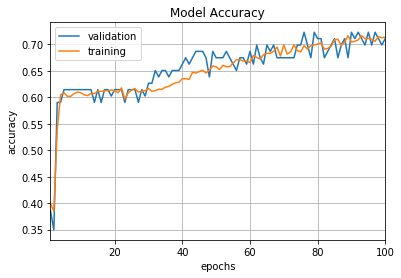

83/83 [==============================] - 0s 214us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.5873367269355131, 0.7108433799571302]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.6667 - acc: 0.6099 - val_loss: 0.6700 - val_acc: 0.5301
Epoch 2/100
 - 0s - loss: 0.6602 - acc: 0.6099 - val_loss: 0.6797 - val_acc: 0.5301
Epoch 3/100
 - 0s - loss: 0.6589 - acc: 0.6099 - val_loss: 0.6776 - val_acc: 0.5301
Epoch 4/100
 - 0s - loss: 0.6579 - acc: 0.6099 - val_loss: 0.6697 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.6577 - acc: 0.6099 - val_loss: 0.6750 - val_acc: 0.5301
Epoch 6/100
 - 0s - loss: 0.6576 - acc: 0.6099 - val_loss: 0.6658 - val_acc: 0.5301
Epoch 7/100
 - 0s - loss: 0.6570 - acc: 0.6099 - val_loss: 0.6662 - val_acc: 0.5301
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.6045 - acc: 0.7017 - val_loss: 0.5950 - val_acc: 0.6867
Epoch 94/100
 - 1s - loss: 0.6036 - acc: 0.7017 - val_loss: 0.5940 - val_acc: 0.6988
Epoch 95/100
 - 1s - loss: 0.6025 - acc: 0.7004 - val_loss: 0.5928 - val_acc: 0.6988
Epoch 96/100
 - 0s - loss: 0.6016 - acc: 0.7017 - val_loss: 0.5895 - val_acc: 0.6988
Epoch 97/100
 - 0s - loss: 0.5997 - acc: 0.7057 - val_loss: 0.5840 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.5965 - acc: 0.7111 - val_loss: 0.5820 - val_acc: 0.6988
Epoch 99/100
 - 0s - loss: 0.5952 - acc: 0.7097 - val_loss: 0.5740 - val_acc: 0.7711
Epoch 100/100
 - 0s - loss: 0.5933 - acc: 0.7111 - val_loss: 0.5752 - val_acc: 0.7229


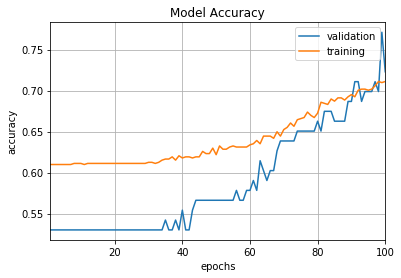

83/83 [==============================] - 0s 248us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.575171734913286, 0.7228915641106755]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: 0.6896 - acc: 0.5992 - val_loss: 0.8335 - val_acc: 0.6024
Epoch 2/100
 - 0s - loss: 0.6306 - acc: 0.6538 - val_loss: 0.6456 - val_acc: 0.6506
Epoch 3/100
 - 0s - loss: 0.6182 - acc: 0.6471 - val_loss: 0.6762 - val_acc: 0.6627
Epoch 4/100
 - 0s - loss: 0.6140 - acc: 0.6644 - val_loss: 0.6607 - val_acc: 0.5663
Epoch 5/100
 - 0s - loss: 0.6102 - acc: 0.6631 - val_loss: 0.7133 - val_acc: 0.6506
Epoch 6/100
 - 0s - loss: 0.6036 - acc: 0.6698 - val_loss: 0.6116 - val_acc: 0.7349
Epoch 7/100
 - 0s - loss: 0.6048 - acc: 0.6724 - val_loss: 0.6186 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.5722 - acc: 0.7137 - val_loss: 0.5960 - val_acc: 0.6988
Epoch 94/100
 - 0s - loss: 0.5716 - acc: 0.7150 - val_loss: 0.6043 - val_acc: 0.7470
Epoch 95/100
 - 0s - loss: 0.5706 - acc: 0.7137 - val_loss: 0.5964 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.5708 - acc: 0.7177 - val_loss: 0.5931 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.5718 - acc: 0.7190 - val_loss: 0.5946 - val_acc: 0.7349
Epoch 98/100
 - 0s - loss: 0.5719 - acc: 0.7190 - val_loss: 0.5942 - val_acc: 0.7229
Epoch 99/100
 - 1s - loss: 0.5720 - acc: 0.7190 - val_loss: 0.5978 - val_acc: 0.7470
Epoch 100/100
 - 1s - loss: 0.5717 - acc: 0.7084 - val_loss: 0.5952 - val_acc: 0.7229


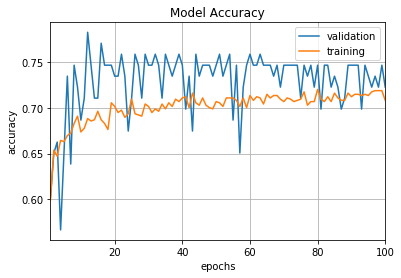

83/83 [==============================] - 0s 303us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.5952266741947956, 0.7228915691375732]
 best Score: 0.761904756228129          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.kullback_leibler_divergence,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.761904756228129
0.6847246125673878


[[0.6465552278927394, 0.6428571400188264],
 [0.5771593224434626, 0.761904756228129],
 [0.5848084574653989, 0.702380949542636],
 [0.6852262899989173, 0.5714285742668879],
 [0.6214724161538733, 0.6867469857974224],
 [0.6147920281054026, 0.6746987976941717],
 [0.6533698856112469, 0.650602408920426],
 [0.5873367269355131, 0.7108433799571302],
 [0.575171734913286, 0.7228915641106755],
 [0.5952266741947956, 0.7228915691375732]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6909152264606143


[0.737333333492279,
 0.7093333339691162,
 0.7213333388169606,
 0.6053333381811777,
 0.7243675137169352,
 0.6817576591565352,
 0.5965379514246584,
 0.7137150473981977,
 0.7110519336955684,
 0.7083888147547147]

# 13 #poisson

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: 0.9141 - acc: 0.5760 - val_loss: 0.8427 - val_acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.8311 - acc: 0.6000 - val_loss: 0.8402 - val_acc: 0.5833
Epoch 3/100
 - 0s - loss: 0.8271 - acc: 0.6173 - val_loss: 0.8325 - val_acc: 0.5833
Epoch 4/100
 - 0s - loss: 0.8218 - acc: 0.6360 - val_loss: 0.8386 - val_acc: 0.5833
Epoch 5/100
 - 0s - loss: 0.8197 - acc: 0.6307 - val_loss: 0.8328 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.8146 - acc: 0.6507 - val_loss: 0.8324 - val_acc: 0.6190
Epoch 7/100
 - 0s - loss: 0.8144 - acc: 0.6600 - val_loss: 0.8329 - val_acc: 0.6310
Epoch 8/100
 - 0s - loss: 0.8143 - acc: 0.6640 - val_loss: 0.8305 - val_acc: 0.6190
Epoch 9/100
 - 0s - loss: 0.8107 - acc: 0.6640 - val_loss: 0.8285 - val_acc: 0.6310
Epoch 10/100
 - 1s - loss: 0.8104 - acc: 0.6827 - val_loss: 0.8264 - val_acc: 0.6190
Epoch 11/100
 - 0s - loss: 0.8099 - acc: 0.6733 - val_loss: 0.8256 - val_acc: 0.6071
Epoch 12/100
 - 0s -

Epoch 97/100
 - 0s - loss: 0.7869 - acc: 0.7267 - val_loss: 0.8166 - val_acc: 0.6190
Epoch 98/100
 - 0s - loss: 0.7876 - acc: 0.7200 - val_loss: 0.8162 - val_acc: 0.6190
Epoch 99/100
 - 0s - loss: 0.7878 - acc: 0.7227 - val_loss: 0.8161 - val_acc: 0.6310
Epoch 100/100
 - 0s - loss: 0.7878 - acc: 0.7333 - val_loss: 0.8161 - val_acc: 0.6310


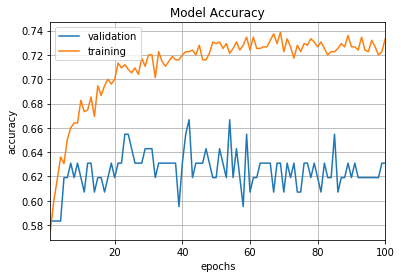

84/84 [==============================] - 0s 211us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [0.8160523460024879, 0.6309523809523809]
 best Score: 0.6309523809523809          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: 0.8330 - acc: 0.6013 - val_loss: 0.8275 - val_acc: 0.6071
Epoch 2/100
 - 0s - loss: 0.8318 - acc: 0.6013 - val_loss: 0.8266 - val_acc: 0.6071
Epoch 3/100
 - 0s - loss: 0.8315 - acc: 0.6013 - val_loss: 0.8265 - val_acc: 0.6071
Epoch 4/100
 - 0s - loss: 0.8311 - acc: 0.6013 - val_loss: 0.8262 - val_acc: 0.6071
Epoch 5/100
 - 1s - loss: 0.8309 - acc: 0.6013 - val_loss: 0.8264 - val_acc: 0.6071
Epoch 6/100
 - 0s - loss: 0.8307 - acc: 0.6013 - val_loss: 0.8258 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: 0.8307 - acc: 0.6013 - val_loss: 0.8254 - val_acc: 0.6071
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.8244 - acc: 0.6213 - val_loss: 0.8177 - val_acc: 0.5952
Epoch 94/100
 - 1s - loss: 0.8243 - acc: 0.6240 - val_loss: 0.8176 - val_acc: 0.5952
Epoch 95/100
 - 1s - loss: 0.8243 - acc: 0.6227 - val_loss: 0.8175 - val_acc: 0.5952
Epoch 96/100
 - 1s - loss: 0.8243 - acc: 0.6213 - val_loss: 0.8174 - val_acc: 0.5952
Epoch 97/100
 - 1s - loss: 0.8242 - acc: 0.6213 - val_loss: 0.8174 - val_acc: 0.5952
Epoch 98/100
 - 0s - loss: 0.8242 - acc: 0.6227 - val_loss: 0.8173 - val_acc: 0.5952
Epoch 99/100
 - 0s - loss: 0.8241 - acc: 0.6213 - val_loss: 0.8172 - val_acc: 0.5952
Epoch 100/100
 - 0s - loss: 0.8241 - acc: 0.6227 - val_loss: 0.8171 - val_acc: 0.5952


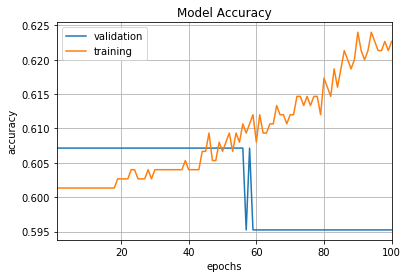

84/84 [==============================] - 0s 198us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [0.8171185510499137, 0.5952380952380952]
 best Score: 0.6309523809523809          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: 0.8991 - acc: 0.5560 - val_loss: 0.8373 - val_acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.8379 - acc: 0.5973 - val_loss: 0.8363 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: 0.8315 - acc: 0.5973 - val_loss: 0.8310 - val_acc: 0.5952
Epoch 4/100
 - 0s - loss: 0.8275 - acc: 0.6013 - val_loss: 0.8260 - val_acc: 0.5952
Epoch 5/100
 - 0s - loss: 0.8256 - acc: 0.5987 - val_loss: 0.8234 - val_acc: 0.5952
Epoch 6/100
 - 0s - loss: 0.8240 - acc: 0.6213 - val_loss: 0.8380 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: 0.8214 - acc: 0.6293 - val_loss: 0.8202 - val_acc: 0.6071
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7949 - acc: 0.7053 - val_loss: 0.7849 - val_acc: 0.7024
Epoch 94/100
 - 0s - loss: 0.7943 - acc: 0.7000 - val_loss: 0.7841 - val_acc: 0.7143
Epoch 95/100
 - 0s - loss: 0.7941 - acc: 0.7000 - val_loss: 0.7837 - val_acc: 0.7262
Epoch 96/100
 - 0s - loss: 0.7941 - acc: 0.7173 - val_loss: 0.7862 - val_acc: 0.7024
Epoch 97/100
 - 0s - loss: 0.7939 - acc: 0.7160 - val_loss: 0.7822 - val_acc: 0.7143
Epoch 98/100
 - 0s - loss: 0.7949 - acc: 0.7173 - val_loss: 0.7844 - val_acc: 0.7143
Epoch 99/100
 - 0s - loss: 0.7943 - acc: 0.7133 - val_loss: 0.7850 - val_acc: 0.7024
Epoch 100/100
 - 0s - loss: 0.7939 - acc: 0.7120 - val_loss: 0.7865 - val_acc: 0.7024


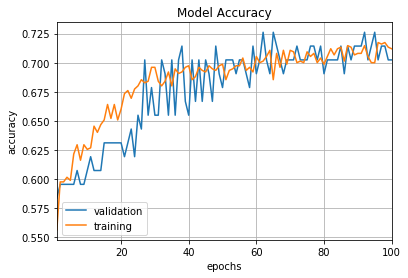

84/84 [==============================] - 0s 232us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [0.7865176938828968, 0.7023809467043195]
 best Score: 0.7023809467043195          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 13s - loss: 1.0609 - acc: 0.6053 - val_loss: 0.8347 - val_acc: 0.5833
Epoch 2/100
 - 0s - loss: 0.8252 - acc: 0.6173 - val_loss: 0.8279 - val_acc: 0.6190
Epoch 3/100
 - 0s - loss: 0.8208 - acc: 0.6373 - val_loss: 0.8289 - val_acc: 0.5833
Epoch 4/100
 - 0s - loss: 0.8193 - acc: 0.6440 - val_loss: 0.8247 - val_acc: 0.5833
Epoch 5/100
 - 0s - loss: 0.8179 - acc: 0.6427 - val_loss: 0.8211 - val_acc: 0.6190
Epoch 6/100
 - 0s - loss: 0.8159 - acc: 0.6453 - val_loss: 0.8183 - val_acc: 0.6548
Epoch 7/100
 - 0s - loss: 0.8147 - acc: 0.6440 - val_loss: 0.8173 - val_acc: 0.6667
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7914 - acc: 0.7093 - val_loss: 0.7962 - val_acc: 0.7381
Epoch 94/100
 - 1s - loss: 0.7920 - acc: 0.7067 - val_loss: 0.7939 - val_acc: 0.7381
Epoch 95/100
 - 0s - loss: 0.7918 - acc: 0.7107 - val_loss: 0.7947 - val_acc: 0.7381
Epoch 96/100
 - 1s - loss: 0.7916 - acc: 0.7067 - val_loss: 0.7939 - val_acc: 0.7381
Epoch 97/100
 - 1s - loss: 0.7916 - acc: 0.7147 - val_loss: 0.7934 - val_acc: 0.7381
Epoch 98/100
 - 0s - loss: 0.7916 - acc: 0.7093 - val_loss: 0.7935 - val_acc: 0.7381
Epoch 99/100
 - 0s - loss: 0.7916 - acc: 0.7120 - val_loss: 0.7948 - val_acc: 0.7381
Epoch 100/100
 - 0s - loss: 0.7912 - acc: 0.7173 - val_loss: 0.7930 - val_acc: 0.7262


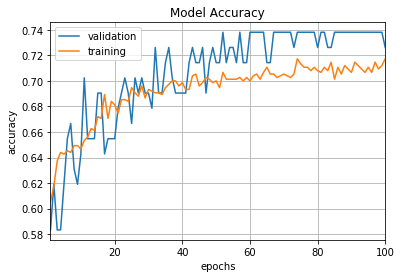

84/84 [==============================] - 0s 192us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [0.79300571339471, 0.7261904761904762]
 best Score: 0.7261904761904762          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 0.8437 - acc: 0.5832 - val_loss: 0.8241 - val_acc: 0.6265
Epoch 2/100
 - 0s - loss: 0.8286 - acc: 0.6005 - val_loss: 0.8224 - val_acc: 0.6265
Epoch 3/100
 - 0s - loss: 0.8272 - acc: 0.6045 - val_loss: 0.8219 - val_acc: 0.6265
Epoch 4/100
 - 0s - loss: 0.8249 - acc: 0.6005 - val_loss: 0.8214 - val_acc: 0.6265
Epoch 5/100
 - 1s - loss: 0.8239 - acc: 0.6059 - val_loss: 0.8212 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.8223 - acc: 0.6032 - val_loss: 0.8273 - val_acc: 0.6747
Epoch 7/100
 - 0s - loss: 0.8210 - acc: 0.6272 - val_loss: 0.8249 - val_acc: 0.6265
Epoch 8/10

Epoch 93/100
 - 1s - loss: 0.7863 - acc: 0.7230 - val_loss: 0.8071 - val_acc: 0.6867
Epoch 94/100
 - 1s - loss: 0.7859 - acc: 0.7230 - val_loss: 0.8145 - val_acc: 0.6867
Epoch 95/100
 - 1s - loss: 0.7856 - acc: 0.7190 - val_loss: 0.8070 - val_acc: 0.6867
Epoch 96/100
 - 1s - loss: 0.7858 - acc: 0.7244 - val_loss: 0.8074 - val_acc: 0.6747
Epoch 97/100
 - 1s - loss: 0.7857 - acc: 0.7310 - val_loss: 0.8127 - val_acc: 0.6867
Epoch 98/100
 - 1s - loss: 0.7861 - acc: 0.7270 - val_loss: 0.8136 - val_acc: 0.6867
Epoch 99/100
 - 1s - loss: 0.7861 - acc: 0.7257 - val_loss: 0.8149 - val_acc: 0.6867
Epoch 100/100
 - 0s - loss: 0.7864 - acc: 0.7230 - val_loss: 0.8072 - val_acc: 0.6747


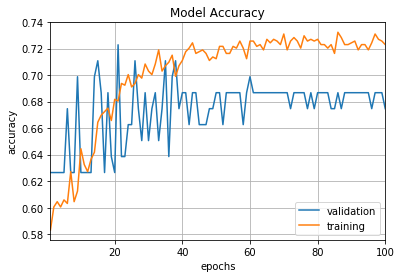

83/83 [==============================] - 0s 271us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [0.807215903178755, 0.6746987930263382]
 best Score: 0.7261904761904762          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 0.8557 - acc: 0.5712 - val_loss: 0.8450 - val_acc: 0.5542
Epoch 2/100
 - 1s - loss: 0.8339 - acc: 0.5965 - val_loss: 0.8405 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: 0.8339 - acc: 0.5979 - val_loss: 0.8520 - val_acc: 0.4578
Epoch 4/100
 - 0s - loss: 0.8336 - acc: 0.6032 - val_loss: 0.8262 - val_acc: 0.6265
Epoch 5/100
 - 0s - loss: 0.8327 - acc: 0.5965 - val_loss: 0.8318 - val_acc: 0.6265
Epoch 6/100
 - 0s - loss: 0.8319 - acc: 0.6019 - val_loss: 0.8246 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: 0.8292 - acc: 0.6032 - val_loss: 0.8282 - val_acc: 0.6265
Epoch 8/1

Epoch 93/100
 - 0s - loss: 0.7908 - acc: 0.7230 - val_loss: 0.7951 - val_acc: 0.7349
Epoch 94/100
 - 0s - loss: 0.7912 - acc: 0.7164 - val_loss: 0.7913 - val_acc: 0.7349
Epoch 95/100
 - 0s - loss: 0.7895 - acc: 0.7257 - val_loss: 0.7864 - val_acc: 0.6867
Epoch 96/100
 - 0s - loss: 0.7909 - acc: 0.7204 - val_loss: 0.7890 - val_acc: 0.7229
Epoch 97/100
 - 1s - loss: 0.7904 - acc: 0.7190 - val_loss: 0.7862 - val_acc: 0.6867
Epoch 98/100
 - 0s - loss: 0.7906 - acc: 0.7230 - val_loss: 0.7863 - val_acc: 0.6867
Epoch 99/100
 - 1s - loss: 0.7907 - acc: 0.7164 - val_loss: 0.7880 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.7904 - acc: 0.7217 - val_loss: 0.7874 - val_acc: 0.7108


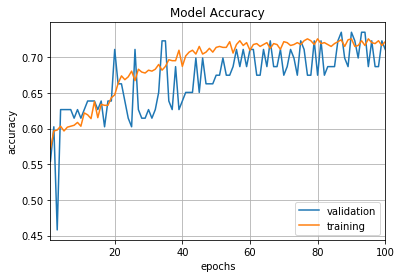

83/83 [==============================] - 0s 299us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [0.7874125558209707, 0.7108433727758476]
 best Score: 0.7261904761904762          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 13s - loss: 0.8336 - acc: 0.5952 - val_loss: 0.8120 - val_acc: 0.6506
Epoch 2/100
 - 1s - loss: 0.8285 - acc: 0.6005 - val_loss: 0.8141 - val_acc: 0.6506
Epoch 3/100
 - 1s - loss: 0.8269 - acc: 0.5965 - val_loss: 0.8098 - val_acc: 0.6506
Epoch 4/100
 - 1s - loss: 0.8256 - acc: 0.5965 - val_loss: 0.8090 - val_acc: 0.6506
Epoch 5/100
 - 1s - loss: 0.8248 - acc: 0.5979 - val_loss: 0.8082 - val_acc: 0.6506
Epoch 6/100
 - 1s - loss: 0.8223 - acc: 0.6019 - val_loss: 0.8219 - val_acc: 0.6867
Epoch 7/100
 - 1s - loss: 0.8223 - acc: 0.6205 - val_loss: 0.8093 - val_acc: 0.6627
Epoch 8/

Epoch 93/100
 - 1s - loss: 0.7928 - acc: 0.7270 - val_loss: 0.7891 - val_acc: 0.6988
Epoch 94/100
 - 1s - loss: 0.7926 - acc: 0.7270 - val_loss: 0.7904 - val_acc: 0.6867
Epoch 95/100
 - 1s - loss: 0.7926 - acc: 0.7310 - val_loss: 0.7894 - val_acc: 0.6988
Epoch 96/100
 - 1s - loss: 0.7923 - acc: 0.7257 - val_loss: 0.7887 - val_acc: 0.6988
Epoch 97/100
 - 1s - loss: 0.7922 - acc: 0.7257 - val_loss: 0.7867 - val_acc: 0.6627
Epoch 98/100
 - 1s - loss: 0.7924 - acc: 0.7244 - val_loss: 0.7895 - val_acc: 0.6867
Epoch 99/100
 - 1s - loss: 0.7920 - acc: 0.7257 - val_loss: 0.7870 - val_acc: 0.6627
Epoch 100/100
 - 1s - loss: 0.7921 - acc: 0.7270 - val_loss: 0.7867 - val_acc: 0.6627


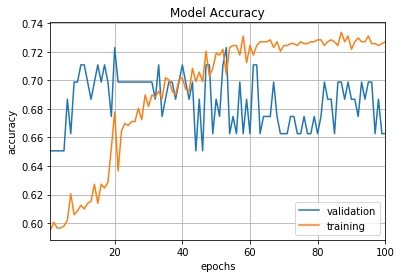

83/83 [==============================] - 0s 263us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [0.786688541073397, 0.6626506052821516]
 best Score: 0.7261904761904762          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 0.8396 - acc: 0.6085 - val_loss: 0.8451 - val_acc: 0.4699
Epoch 2/100
 - 1s - loss: 0.8298 - acc: 0.6005 - val_loss: 0.8222 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.8279 - acc: 0.6085 - val_loss: 0.8251 - val_acc: 0.6145
Epoch 4/100
 - 1s - loss: 0.8278 - acc: 0.6032 - val_loss: 0.8207 - val_acc: 0.6145
Epoch 5/100
 - 0s - loss: 0.8260 - acc: 0.6019 - val_loss: 0.8195 - val_acc: 0.6145
Epoch 6/100
 - 1s - loss: 0.8253 - acc: 0.6059 - val_loss: 0.8300 - val_acc: 0.6867
Epoch 7/100
 - 1s - loss: 0.8235 - acc: 0.6085 - val_loss: 0.8198 - val_acc: 0.6386
Epoch 8/1

Epoch 93/100
 - 1s - loss: 0.8010 - acc: 0.7017 - val_loss: 0.7938 - val_acc: 0.7470
Epoch 94/100
 - 1s - loss: 0.8007 - acc: 0.7017 - val_loss: 0.7941 - val_acc: 0.7470
Epoch 95/100
 - 1s - loss: 0.8006 - acc: 0.7071 - val_loss: 0.7934 - val_acc: 0.7349
Epoch 96/100
 - 1s - loss: 0.8005 - acc: 0.7084 - val_loss: 0.7933 - val_acc: 0.7349
Epoch 97/100
 - 1s - loss: 0.8007 - acc: 0.6991 - val_loss: 0.7931 - val_acc: 0.7470
Epoch 98/100
 - 1s - loss: 0.8002 - acc: 0.7071 - val_loss: 0.7933 - val_acc: 0.7470
Epoch 99/100
 - 1s - loss: 0.8003 - acc: 0.7044 - val_loss: 0.7946 - val_acc: 0.7470
Epoch 100/100
 - 1s - loss: 0.7998 - acc: 0.7111 - val_loss: 0.7927 - val_acc: 0.7470


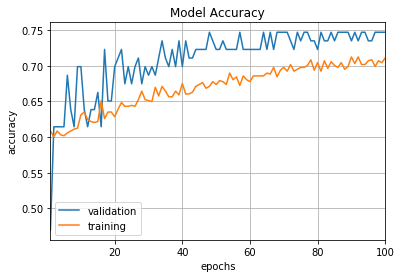

83/83 [==============================] - 0s 310us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [0.7926685407937292, 0.7469879582703832]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 17s - loss: 0.8636 - acc: 0.5819 - val_loss: 0.8494 - val_acc: 0.5301
Epoch 2/100
 - 1s - loss: 0.8324 - acc: 0.6099 - val_loss: 0.8453 - val_acc: 0.5301
Epoch 3/100
 - 1s - loss: 0.8321 - acc: 0.6099 - val_loss: 0.8422 - val_acc: 0.5301
Epoch 4/100
 - 1s - loss: 0.8315 - acc: 0.6099 - val_loss: 0.8389 - val_acc: 0.5301
Epoch 5/100
 - 0s - loss: 0.8318 - acc: 0.6099 - val_loss: 0.8421 - val_acc: 0.5301
Epoch 6/100
 - 1s - loss: 0.8302 - acc: 0.6099 - val_loss: 0.8477 - val_acc: 0.5301
Epoch 7/100
 - 1s - loss: 0.8266 - acc: 0.6138 - val_loss: 0.8361 - val_acc: 0.5422
Epoch 8/

Epoch 93/100
 - 0s - loss: 0.7974 - acc: 0.7164 - val_loss: 0.7860 - val_acc: 0.7108
Epoch 94/100
 - 0s - loss: 0.7970 - acc: 0.7137 - val_loss: 0.7856 - val_acc: 0.7108
Epoch 95/100
 - 0s - loss: 0.7970 - acc: 0.7217 - val_loss: 0.7850 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.7963 - acc: 0.7190 - val_loss: 0.7850 - val_acc: 0.7229
Epoch 97/100
 - 0s - loss: 0.7969 - acc: 0.7124 - val_loss: 0.7857 - val_acc: 0.6988
Epoch 98/100
 - 1s - loss: 0.7969 - acc: 0.7124 - val_loss: 0.7844 - val_acc: 0.7349
Epoch 99/100
 - 1s - loss: 0.7964 - acc: 0.7164 - val_loss: 0.7851 - val_acc: 0.7229
Epoch 100/100
 - 1s - loss: 0.7963 - acc: 0.7164 - val_loss: 0.7842 - val_acc: 0.7349


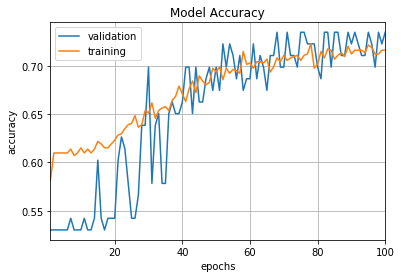

83/83 [==============================] - 0s 534us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [0.7842159328690494, 0.7349397654992988]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 14s - loss: 0.8357 - acc: 0.6059 - val_loss: 0.8674 - val_acc: 0.6145
Epoch 2/100
 - 0s - loss: 0.8250 - acc: 0.6245 - val_loss: 0.8353 - val_acc: 0.6145
Epoch 3/100
 - 0s - loss: 0.8220 - acc: 0.6338 - val_loss: 0.8352 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: 0.8206 - acc: 0.6445 - val_loss: 0.8327 - val_acc: 0.6386
Epoch 5/100
 - 0s - loss: 0.8174 - acc: 0.6391 - val_loss: 0.8253 - val_acc: 0.6024
Epoch 6/100
 - 1s - loss: 0.8155 - acc: 0.6458 - val_loss: 0.8385 - val_acc: 0.6024
Epoch 7/100
 - 0s - loss: 0.8163 - acc: 0.6445 - val_loss: 0.8267 - val_acc: 0.6386
Epoch 8

Epoch 93/100
 - 1s - loss: 0.7891 - acc: 0.7084 - val_loss: 0.8103 - val_acc: 0.6867
Epoch 94/100
 - 0s - loss: 0.7887 - acc: 0.7124 - val_loss: 0.8102 - val_acc: 0.6867
Epoch 95/100
 - 1s - loss: 0.7886 - acc: 0.7137 - val_loss: 0.8067 - val_acc: 0.7349
Epoch 96/100
 - 0s - loss: 0.7889 - acc: 0.7204 - val_loss: 0.8081 - val_acc: 0.7108
Epoch 97/100
 - 0s - loss: 0.7887 - acc: 0.7177 - val_loss: 0.8096 - val_acc: 0.7108
Epoch 98/100
 - 0s - loss: 0.7884 - acc: 0.7124 - val_loss: 0.8068 - val_acc: 0.7108
Epoch 99/100
 - 0s - loss: 0.7892 - acc: 0.7150 - val_loss: 0.8082 - val_acc: 0.7108
Epoch 100/100
 - 1s - loss: 0.7881 - acc: 0.7164 - val_loss: 0.8076 - val_acc: 0.7108


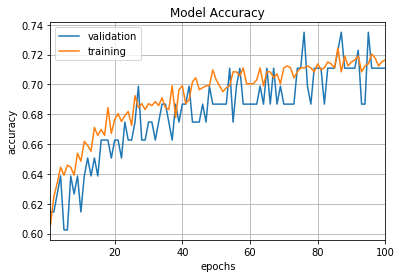

83/83 [==============================] - 0s 279us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [0.8076489596481783, 0.7108433677489499]
 best Score: 0.7469879582703832          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100

input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.poisson,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7469879582703832
0.6895725761688242


[[0.8160523460024879, 0.6309523809523809],
 [0.8171185510499137, 0.5952380952380952],
 [0.7865176938828968, 0.7023809467043195],
 [0.79300571339471, 0.7261904761904762],
 [0.807215903178755, 0.6746987930263382],
 [0.7874125558209707, 0.7108433727758476],
 [0.786688541073397, 0.6626506052821516],
 [0.7926685407937292, 0.7469879582703832],
 [0.7842159328690494, 0.7349397654992988],
 [0.8076489596481783, 0.7108433677489499]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.7100912571235122


[0.7333333349227905,
 0.6226666694879532,
 0.7120000008742015,
 0.7173333330949148,
 0.7230359499210047,
 0.7217043972364596,
 0.7270306262290589,
 0.7110519336955684,
 0.7163781626881677,
 0.7163781630850029]

# 14 #losses.cosine_proximity, 

fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 14s - loss: -6.7720e-01 - acc: 0.5707 - val_loss: -7.2363e-01 - val_acc: 0.6190
Epoch 2/100
 - 1s - loss: -7.2058e-01 - acc: 0.5960 - val_loss: -7.3065e-01 - val_acc: 0.5952
Epoch 3/100
 - 1s - loss: -7.2889e-01 - acc: 0.6213 - val_loss: -7.2895e-01 - val_acc: 0.5714
Epoch 4/100
 - 0s - loss: -7.3267e-01 - acc: 0.6147 - val_loss: -7.1036e-01 - val_acc: 0.5833
Epoch 5/100
 - 1s - loss: -7.4069e-01 - acc: 0.6440 - val_loss: -7.2411e-01 - val_acc: 0.6071
Epoch 6/100
 - 1s - loss: -7.4641e-01 - acc: 0.6507 - val_loss: -7.3657e-01 - val_acc: 0.6190
Epoch 7/100
 - 1s - loss: -7.4793e-01 - acc: 0.6493 - val_loss: -7.4002e-01 - val_acc: 0.6190
Epoch 8/100
 - 1s - loss: -7.5345e-01 - acc: 0.6640 - val_loss: -7.2604e-01 - val_acc: 0.6071
Epoch 9/100
 - 1s - loss: -7.5844e-01 - acc: 0.6733 - val_loss: -7.4532e-01 - val_acc: 0.6310
Epoch 10/100
 - 1s - loss: -7.5833e-01 - acc: 0.6667 - val_loss: -7.4415e-01 - val_acc: 0.6548
Epoch

Epoch 87/100
 - 0s - loss: -7.8636e-01 - acc: 0.7267 - val_loss: -7.4873e-01 - val_acc: 0.6429
Epoch 88/100
 - 1s - loss: -7.8601e-01 - acc: 0.7333 - val_loss: -7.4662e-01 - val_acc: 0.6429
Epoch 89/100
 - 0s - loss: -7.8571e-01 - acc: 0.7253 - val_loss: -7.4805e-01 - val_acc: 0.6190
Epoch 90/100
 - 1s - loss: -7.8577e-01 - acc: 0.7173 - val_loss: -7.4698e-01 - val_acc: 0.6190
Epoch 91/100
 - 0s - loss: -7.8643e-01 - acc: 0.7253 - val_loss: -7.4864e-01 - val_acc: 0.6310
Epoch 92/100
 - 0s - loss: -7.8642e-01 - acc: 0.7240 - val_loss: -7.4627e-01 - val_acc: 0.6310
Epoch 93/100
 - 1s - loss: -7.8538e-01 - acc: 0.7200 - val_loss: -7.4800e-01 - val_acc: 0.6310
Epoch 94/100
 - 1s - loss: -7.8567e-01 - acc: 0.7187 - val_loss: -7.4767e-01 - val_acc: 0.6310
Epoch 95/100
 - 1s - loss: -7.8632e-01 - acc: 0.7280 - val_loss: -7.4770e-01 - val_acc: 0.6310
Epoch 96/100
 - 1s - loss: -7.8608e-01 - acc: 0.7173 - val_loss: -7.4731e-01 - val_acc: 0.6190
Epoch 97/100
 - 1s - loss: -7.8635e-01 - acc: 0.71

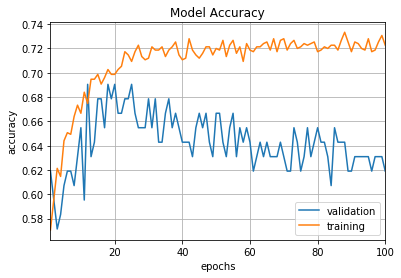

84/84 [==============================] - 0s 280us/step

-------------------------------------------------------------------------------------------          
Fold 1 score : [-0.7470984856287638, 0.6190476162093026]
 best Score: 0.6190476162093026          
-------------------------------------------------------------------------------------------


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 14s - loss: -7.0404e-01 - acc: 0.4387 - val_loss: -7.0685e-01 - val_acc: 0.3929
Epoch 2/100
 - 1s - loss: -7.0925e-01 - acc: 0.5933 - val_loss: -7.1165e-01 - val_acc: 0.6071
Epoch 3/100
 - 1s - loss: -7.1267e-01 - acc: 0.6013 - val_loss: -7.1438e-01 - val_acc: 0.6071
Epoch 4/100
 - 1s - loss: -7.1475e-01 - acc: 0.6013 - val_loss: -7.1620e-01 - val_acc: 0.6071
Epoch 5/100
 - 1s - loss: -7.1619e-01 - acc: 0.6013 - val_loss: -7.1752e-01 - val_acc: 0.6071
Epoch 6/100
 - 1s - loss: -7.1721e-01 - acc: 0.6013 - val_loss: -7.1848e-01 - val_acc: 0.6071
Epoch 7/100
 - 0s - loss: -7.17

 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2308e-01 - val_acc: 0.6071
Epoch 84/100
 - 0s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 85/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 86/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 87/100
 - 0s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 88/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 89/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 90/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 91/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 92/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss: -7.2309e-01 - val_acc: 0.6071
Epoch 93/100
 - 1s - loss: -7.2147e-01 - acc: 0.6013 - val_loss

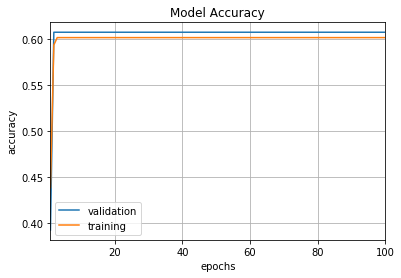

84/84 [==============================] - 0s 357us/step

-------------------------------------------------------------------------------------------          
Fold 2 score : [-0.7230962685176304, 0.6071428571428571]
 best Score: 0.6190476162093026          
-------------------------------------------------------------------------------------------


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 14s - loss: -7.1542e-01 - acc: 0.5893 - val_loss: -7.2462e-01 - val_acc: 0.5952
Epoch 2/100
 - 1s - loss: -7.2617e-01 - acc: 0.6027 - val_loss: -7.2616e-01 - val_acc: 0.5952
Epoch 3/100
 - 0s - loss: -7.2708e-01 - acc: 0.6027 - val_loss: -7.2606e-01 - val_acc: 0.5952
Epoch 4/100
 - 1s - loss: -7.2764e-01 - acc: 0.6027 - val_loss: -7.2683e-01 - val_acc: 0.5952
Epoch 5/100
 - 1s - loss: -7.2765e-01 - acc: 0.6027 - val_loss: -7.2753e-01 - val_acc: 0.5952
Epoch 6/100
 - 1s - loss: -7.2836e-01 - acc: 0.6027 - val_loss: -7.2790e-01 - val_acc: 0.5952
Epoch 7/100
 - 0s - loss: -7.28

 - 1s - loss: -7.8210e-01 - acc: 0.7280 - val_loss: -7.8502e-01 - val_acc: 0.7143
Epoch 84/100
 - 1s - loss: -7.8261e-01 - acc: 0.7280 - val_loss: -7.8585e-01 - val_acc: 0.7143
Epoch 85/100
 - 0s - loss: -7.8239e-01 - acc: 0.7187 - val_loss: -7.8502e-01 - val_acc: 0.7143
Epoch 86/100
 - 0s - loss: -7.8230e-01 - acc: 0.7213 - val_loss: -7.8642e-01 - val_acc: 0.7143
Epoch 87/100
 - 0s - loss: -7.8219e-01 - acc: 0.7267 - val_loss: -7.8561e-01 - val_acc: 0.7143
Epoch 88/100
 - 1s - loss: -7.8255e-01 - acc: 0.7200 - val_loss: -7.8416e-01 - val_acc: 0.7143
Epoch 89/100
 - 1s - loss: -7.8193e-01 - acc: 0.7267 - val_loss: -7.8445e-01 - val_acc: 0.7143
Epoch 90/100
 - 0s - loss: -7.8301e-01 - acc: 0.7200 - val_loss: -7.8654e-01 - val_acc: 0.7143
Epoch 91/100
 - 1s - loss: -7.8248e-01 - acc: 0.7240 - val_loss: -7.8536e-01 - val_acc: 0.7143
Epoch 92/100
 - 1s - loss: -7.8237e-01 - acc: 0.7187 - val_loss: -7.8400e-01 - val_acc: 0.7143
Epoch 93/100
 - 1s - loss: -7.8239e-01 - acc: 0.7280 - val_loss

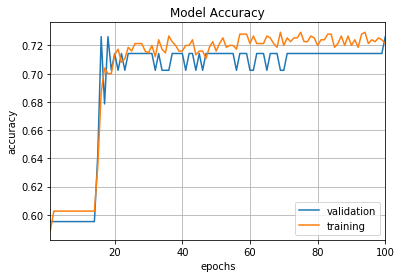

84/84 [==============================] - 0s 328us/step

-------------------------------------------------------------------------------------------          
Fold 3 score : [-0.7875286511012486, 0.7261904761904762]
 best Score: 0.7261904761904762          
-------------------------------------------------------------------------------------------


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/100
 - 15s - loss: -7.2473e-01 - acc: 0.6067 - val_loss: -7.1807e-01 - val_acc: 0.5714
Epoch 2/100
 - 0s - loss: -7.2965e-01 - acc: 0.6067 - val_loss: -7.2756e-01 - val_acc: 0.5714
Epoch 3/100
 - 1s - loss: -7.3398e-01 - acc: 0.6160 - val_loss: -7.2375e-01 - val_acc: 0.5714
Epoch 4/100
 - 1s - loss: -7.3672e-01 - acc: 0.6120 - val_loss: -7.3913e-01 - val_acc: 0.6310
Epoch 5/100
 - 1s - loss: -7.4410e-01 - acc: 0.6507 - val_loss: -7.3000e-01 - val_acc: 0.5833
Epoch 6/100
 - 1s - loss: -7.4658e-01 - acc: 0.6387 - val_loss: -7.4733e-01 - val_acc: 0.7262
Epoch 7/100
 - 1s - loss: -7.48

 - 1s - loss: -7.8125e-01 - acc: 0.7173 - val_loss: -7.8468e-01 - val_acc: 0.7381
Epoch 84/100
 - 1s - loss: -7.8098e-01 - acc: 0.7240 - val_loss: -7.8425e-01 - val_acc: 0.7381
Epoch 85/100
 - 1s - loss: -7.8159e-01 - acc: 0.7147 - val_loss: -7.8279e-01 - val_acc: 0.7500
Epoch 86/100
 - 1s - loss: -7.8114e-01 - acc: 0.7200 - val_loss: -7.8439e-01 - val_acc: 0.7381
Epoch 87/100
 - 1s - loss: -7.8166e-01 - acc: 0.7213 - val_loss: -7.8482e-01 - val_acc: 0.7381
Epoch 88/100
 - 1s - loss: -7.8117e-01 - acc: 0.7173 - val_loss: -7.8475e-01 - val_acc: 0.7381
Epoch 89/100
 - 1s - loss: -7.8171e-01 - acc: 0.7213 - val_loss: -7.8414e-01 - val_acc: 0.7381
Epoch 90/100
 - 1s - loss: -7.8122e-01 - acc: 0.7160 - val_loss: -7.8455e-01 - val_acc: 0.7381
Epoch 91/100
 - 1s - loss: -7.8157e-01 - acc: 0.7293 - val_loss: -7.8404e-01 - val_acc: 0.7381
Epoch 92/100
 - 1s - loss: -7.8159e-01 - acc: 0.7200 - val_loss: -7.8398e-01 - val_acc: 0.7381
Epoch 93/100
 - 1s - loss: -7.8165e-01 - acc: 0.7213 - val_loss

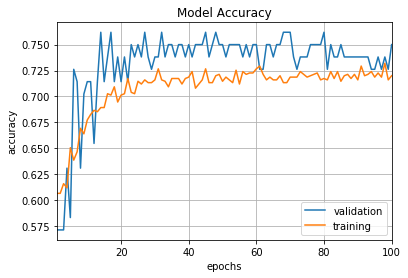

84/84 [==============================] - 0s 207us/step

-------------------------------------------------------------------------------------------          
Fold 4 score : [-0.7836845318476359, 0.75]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: -7.0918e-01 - acc: 0.5073 - val_loss: -7.0929e-01 - val_acc: 0.6265
Epoch 2/100
 - 1s - loss: -7.1093e-01 - acc: 0.5992 - val_loss: -7.1488e-01 - val_acc: 0.6265
Epoch 3/100
 - 1s - loss: -7.1411e-01 - acc: 0.5992 - val_loss: -7.1762e-01 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: -7.1567e-01 - acc: 0.5992 - val_loss: -7.1977e-01 - val_acc: 0.6265
Epoch 5/100
 - 1s - loss: -7.1691e-01 - acc: 0.5992 - val_loss: -7.2100e-01 - val_acc: 0.6265
Epoch 6/100
 - 1s - loss: -7.1761e-01 - acc: 0.5992 - val_loss: -7.2218e-01 - val_acc: 0.6265
Epoch 7/100
 - 1s - loss: -7.1828e-01 - acc: 0.5992 - val_l

Epoch 84/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2831e-01 - val_acc: 0.6265
Epoch 85/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2832e-01 - val_acc: 0.6265
Epoch 86/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2834e-01 - val_acc: 0.6265
Epoch 87/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2835e-01 - val_acc: 0.6265
Epoch 88/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2836e-01 - val_acc: 0.6265
Epoch 89/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2837e-01 - val_acc: 0.6265
Epoch 90/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2838e-01 - val_acc: 0.6265
Epoch 91/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2839e-01 - val_acc: 0.6265
Epoch 92/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2840e-01 - val_acc: 0.6265
Epoch 93/100
 - 1s - loss: -7.2088e-01 - acc: 0.5992 - val_loss: -7.2841e-01 - val_acc: 0.6265
Epoch 94/100
 - 1s - loss: -7.2088e-01 - acc: 0.59

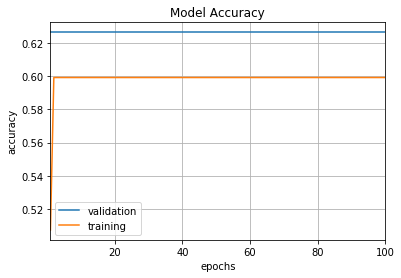

83/83 [==============================] - 0s 260us/step

-------------------------------------------------------------------------------------------          
Fold 5 score : [-0.7283861866916519, 0.6265060233782573]
 best Score: 0.75          
-------------------------------------------------------------------------------------------


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 15s - loss: -7.2296e-01 - acc: 0.5925 - val_loss: -7.0193e-01 - val_acc: 0.3855
Epoch 2/100
 - 1s - loss: -7.3447e-01 - acc: 0.6192 - val_loss: -7.1525e-01 - val_acc: 0.5904
Epoch 3/100
 - 1s - loss: -7.3778e-01 - acc: 0.6232 - val_loss: -7.3354e-01 - val_acc: 0.6627
Epoch 4/100
 - 1s - loss: -7.4048e-01 - acc: 0.6312 - val_loss: -7.4740e-01 - val_acc: 0.6386
Epoch 5/100
 - 1s - loss: -7.4423e-01 - acc: 0.6445 - val_loss: -7.5036e-01 - val_acc: 0.6265
Epoch 6/100
 - 1s - loss: -7.4439e-01 - acc: 0.6431 - val_loss: -7.5185e-01 - val_acc: 0.6265
Epoch 7/100
 - 1s - loss: -7.4812e-01 - acc: 

Epoch 84/100
 - 1s - loss: -7.8025e-01 - acc: 0.7257 - val_loss: -7.8807e-01 - val_acc: 0.7590
Epoch 85/100
 - 1s - loss: -7.8002e-01 - acc: 0.7270 - val_loss: -7.8702e-01 - val_acc: 0.7590
Epoch 86/100
 - 1s - loss: -7.8077e-01 - acc: 0.7217 - val_loss: -7.7895e-01 - val_acc: 0.7590
Epoch 87/100
 - 1s - loss: -7.8004e-01 - acc: 0.7230 - val_loss: -7.8768e-01 - val_acc: 0.7590
Epoch 88/100
 - 0s - loss: -7.8089e-01 - acc: 0.7177 - val_loss: -7.8256e-01 - val_acc: 0.7349
Epoch 89/100
 - 1s - loss: -7.8039e-01 - acc: 0.7217 - val_loss: -7.7884e-01 - val_acc: 0.7470
Epoch 90/100
 - 1s - loss: -7.7993e-01 - acc: 0.7284 - val_loss: -7.8821e-01 - val_acc: 0.7711
Epoch 91/100
 - 1s - loss: -7.8058e-01 - acc: 0.7284 - val_loss: -7.8823e-01 - val_acc: 0.7349
Epoch 92/100
 - 1s - loss: -7.8058e-01 - acc: 0.7137 - val_loss: -7.8107e-01 - val_acc: 0.7590
Epoch 93/100
 - 1s - loss: -7.8040e-01 - acc: 0.7217 - val_loss: -7.8818e-01 - val_acc: 0.7590
Epoch 94/100
 - 1s - loss: -7.8110e-01 - acc: 0.72

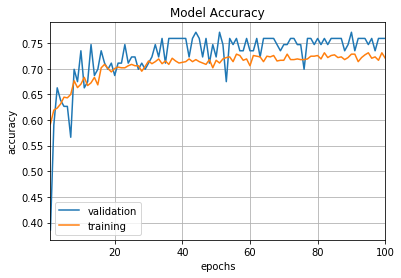

83/83 [==============================] - 0s 280us/step

-------------------------------------------------------------------------------------------          
Fold 6 score : [-0.787999193352389, 0.7590361474508263]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 16s - loss: -7.1276e-01 - acc: 0.5965 - val_loss: -7.4912e-01 - val_acc: 0.6506
Epoch 2/100
 - 1s - loss: -7.3013e-01 - acc: 0.5899 - val_loss: -7.5166e-01 - val_acc: 0.6506
Epoch 3/100
 - 1s - loss: -7.3296e-01 - acc: 0.6112 - val_loss: -7.5406e-01 - val_acc: 0.6265
Epoch 4/100
 - 1s - loss: -7.3592e-01 - acc: 0.6312 - val_loss: -7.5149e-01 - val_acc: 0.6627
Epoch 5/100
 - 1s - loss: -7.3806e-01 - acc: 0.6312 - val_loss: -7.5580e-01 - val_acc: 0.6506
Epoch 6/100
 - 1s - loss: -7.4167e-01 - acc: 0.6431 - val_loss: -7.5342e-01 - val_acc: 0.6747
Epoch 7/100
 - 1s - loss: -7.423

 - 1s - loss: -7.8084e-01 - acc: 0.7217 - val_loss: -7.6510e-01 - val_acc: 0.6506
Epoch 84/100
 - 1s - loss: -7.8048e-01 - acc: 0.7270 - val_loss: -7.6497e-01 - val_acc: 0.6506
Epoch 85/100
 - 1s - loss: -7.8022e-01 - acc: 0.7270 - val_loss: -7.6821e-01 - val_acc: 0.6747
Epoch 86/100
 - 1s - loss: -7.8031e-01 - acc: 0.7244 - val_loss: -7.6828e-01 - val_acc: 0.6627
Epoch 87/100
 - 1s - loss: -7.8109e-01 - acc: 0.7257 - val_loss: -7.6866e-01 - val_acc: 0.6747
Epoch 88/100
 - 1s - loss: -7.8092e-01 - acc: 0.7270 - val_loss: -7.6825e-01 - val_acc: 0.6627
Epoch 89/100
 - 1s - loss: -7.8079e-01 - acc: 0.7284 - val_loss: -7.6699e-01 - val_acc: 0.6627
Epoch 90/100
 - 1s - loss: -7.8102e-01 - acc: 0.7270 - val_loss: -7.6703e-01 - val_acc: 0.6627
Epoch 91/100
 - 1s - loss: -7.8115e-01 - acc: 0.7217 - val_loss: -7.6654e-01 - val_acc: 0.6627
Epoch 92/100
 - 1s - loss: -7.8086e-01 - acc: 0.7284 - val_loss: -7.6658e-01 - val_acc: 0.6627
Epoch 93/100
 - 1s - loss: -7.8126e-01 - acc: 0.7297 - val_loss

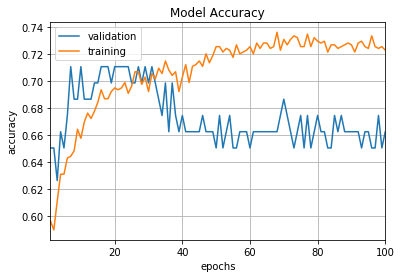

83/83 [==============================] - 0s 273us/step

-------------------------------------------------------------------------------------------          
Fold 7 score : [-0.7678060438259539, 0.6626506052821516]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 16s - loss: -7.0699e-01 - acc: 0.6072 - val_loss: -7.2265e-01 - val_acc: 0.6988
Epoch 2/100
 - 1s - loss: -7.2828e-01 - acc: 0.6045 - val_loss: -7.4024e-01 - val_acc: 0.6265
Epoch 3/100
 - 1s - loss: -7.3107e-01 - acc: 0.6072 - val_loss: -7.4052e-01 - val_acc: 0.6145
Epoch 4/100
 - 1s - loss: -7.3220e-01 - acc: 0.6112 - val_loss: -7.4127e-01 - val_acc: 0.6145
Epoch 5/100
 - 1s - loss: -7.3346e-01 - acc: 0.6085 - val_loss: -7.3882e-01 - val_acc: 0.6627
Epoch 6/100
 - 1s - loss: -7.3455e-01 - acc: 0.6125 - val_loss: -7.4410e-01 - val_acc: 0.6386
Epoch 7/100
 - 1s - loss: -7.35

 - 1s - loss: -7.7476e-01 - acc: 0.7204 - val_loss: -7.8438e-01 - val_acc: 0.7108
Epoch 84/100
 - 1s - loss: -7.7516e-01 - acc: 0.7204 - val_loss: -7.8831e-01 - val_acc: 0.7229
Epoch 85/100
 - 1s - loss: -7.7502e-01 - acc: 0.7057 - val_loss: -7.8704e-01 - val_acc: 0.7229
Epoch 86/100
 - 1s - loss: -7.7575e-01 - acc: 0.7057 - val_loss: -7.8149e-01 - val_acc: 0.7349
Epoch 87/100
 - 1s - loss: -7.7544e-01 - acc: 0.7230 - val_loss: -7.8872e-01 - val_acc: 0.7229
Epoch 88/100
 - 1s - loss: -7.7557e-01 - acc: 0.7044 - val_loss: -7.8861e-01 - val_acc: 0.7229
Epoch 89/100
 - 1s - loss: -7.7612e-01 - acc: 0.7164 - val_loss: -7.8901e-01 - val_acc: 0.7229
Epoch 90/100
 - 1s - loss: -7.7605e-01 - acc: 0.7177 - val_loss: -7.8910e-01 - val_acc: 0.7108
Epoch 91/100
 - 1s - loss: -7.7545e-01 - acc: 0.7111 - val_loss: -7.8921e-01 - val_acc: 0.7229
Epoch 92/100
 - 1s - loss: -7.7593e-01 - acc: 0.7204 - val_loss: -7.8919e-01 - val_acc: 0.7229
Epoch 93/100
 - 1s - loss: -7.7659e-01 - acc: 0.7111 - val_loss

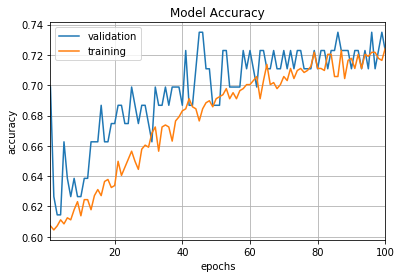

83/83 [==============================] - 0s 219us/step

-------------------------------------------------------------------------------------------          
Fold 8 score : [-0.7896227341100394, 0.7228915677013168]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 16s - loss: -7.2525e-01 - acc: 0.6099 - val_loss: -7.2490e-01 - val_acc: 0.5301
Epoch 2/100
 - 1s - loss: -7.3169e-01 - acc: 0.6099 - val_loss: -7.2070e-01 - val_acc: 0.5301
Epoch 3/100
 - 1s - loss: -7.3266e-01 - acc: 0.6099 - val_loss: -7.2379e-01 - val_acc: 0.5301
Epoch 4/100
 - 1s - loss: -7.3382e-01 - acc: 0.6099 - val_loss: -7.3157e-01 - val_acc: 0.5422
Epoch 5/100
 - 1s - loss: -7.3353e-01 - acc: 0.6112 - val_loss: -7.2889e-01 - val_acc: 0.5301
Epoch 6/100
 - 1s - loss: -7.3474e-01 - acc: 0.6112 - val_loss: -7.2917e-01 - val_acc: 0.5301
Epoch 7/100
 - 1s - loss: -7.35

 - 1s - loss: -7.6860e-01 - acc: 0.7004 - val_loss: -7.7955e-01 - val_acc: 0.7108
Epoch 84/100
 - 1s - loss: -7.6844e-01 - acc: 0.7124 - val_loss: -7.7942e-01 - val_acc: 0.7108
Epoch 85/100
 - 1s - loss: -7.6856e-01 - acc: 0.7097 - val_loss: -7.7860e-01 - val_acc: 0.7470
Epoch 86/100
 - 1s - loss: -7.6921e-01 - acc: 0.7031 - val_loss: -7.7845e-01 - val_acc: 0.7470
Epoch 87/100
 - 1s - loss: -7.6937e-01 - acc: 0.7044 - val_loss: -7.7922e-01 - val_acc: 0.7229
Epoch 88/100
 - 1s - loss: -7.6955e-01 - acc: 0.7111 - val_loss: -7.7966e-01 - val_acc: 0.7229
Epoch 89/100
 - 1s - loss: -7.6979e-01 - acc: 0.7124 - val_loss: -7.8000e-01 - val_acc: 0.7229
Epoch 90/100
 - 1s - loss: -7.6996e-01 - acc: 0.7137 - val_loss: -7.8077e-01 - val_acc: 0.7108
Epoch 91/100
 - 1s - loss: -7.6980e-01 - acc: 0.7150 - val_loss: -7.7960e-01 - val_acc: 0.7349
Epoch 92/100
 - 1s - loss: -7.7048e-01 - acc: 0.7057 - val_loss: -7.8105e-01 - val_acc: 0.7229
Epoch 93/100
 - 1s - loss: -7.7042e-01 - acc: 0.7124 - val_loss

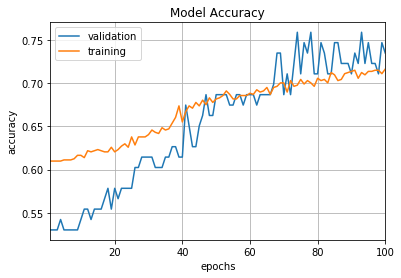

83/83 [==============================] - 0s 294us/step

-------------------------------------------------------------------------------------------          
Fold 9 score : [-0.7804193424891277, 0.7349397568817598]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/100
 - 19s - loss: -7.2253e-01 - acc: 0.5925 - val_loss: -6.9365e-01 - val_acc: 0.4096
Epoch 2/100
 - 0s - loss: -7.3106e-01 - acc: 0.6005 - val_loss: -7.2527e-01 - val_acc: 0.6024
Epoch 3/100
 - 0s - loss: -7.3509e-01 - acc: 0.6085 - val_loss: -7.2587e-01 - val_acc: 0.6386
Epoch 4/100
 - 0s - loss: -7.3731e-01 - acc: 0.6298 - val_loss: -7.2272e-01 - val_acc: 0.6024
Epoch 5/100
 - 0s - loss: -7.3905e-01 - acc: 0.6272 - val_loss: -7.2807e-01 - val_acc: 0.6024
Epoch 6/100
 - 0s - loss: -7.4105e-01 - acc: 0.6378 - val_loss: -7.3480e-01 - val_acc: 0.6265
Epoch 7/100
 - 0s - loss: -7.4

 - 1s - loss: -7.8033e-01 - acc: 0.7150 - val_loss: -7.6378e-01 - val_acc: 0.7229
Epoch 84/100
 - 1s - loss: -7.7995e-01 - acc: 0.7084 - val_loss: -7.6389e-01 - val_acc: 0.7229
Epoch 85/100
 - 1s - loss: -7.8048e-01 - acc: 0.7177 - val_loss: -7.6403e-01 - val_acc: 0.7229
Epoch 86/100
 - 1s - loss: -7.8067e-01 - acc: 0.7084 - val_loss: -7.6394e-01 - val_acc: 0.7229
Epoch 87/100
 - 1s - loss: -7.8057e-01 - acc: 0.7124 - val_loss: -7.6437e-01 - val_acc: 0.7108
Epoch 88/100
 - 1s - loss: -7.8078e-01 - acc: 0.7124 - val_loss: -7.6388e-01 - val_acc: 0.7229
Epoch 89/100
 - 1s - loss: -7.8054e-01 - acc: 0.7190 - val_loss: -7.6428e-01 - val_acc: 0.7108
Epoch 90/100
 - 1s - loss: -7.8085e-01 - acc: 0.7217 - val_loss: -7.6407e-01 - val_acc: 0.7229
Epoch 91/100
 - 1s - loss: -7.8020e-01 - acc: 0.7124 - val_loss: -7.6366e-01 - val_acc: 0.7229
Epoch 92/100
 - 1s - loss: -7.8110e-01 - acc: 0.7257 - val_loss: -7.6335e-01 - val_acc: 0.7108
Epoch 93/100
 - 1s - loss: -7.8068e-01 - acc: 0.7084 - val_loss

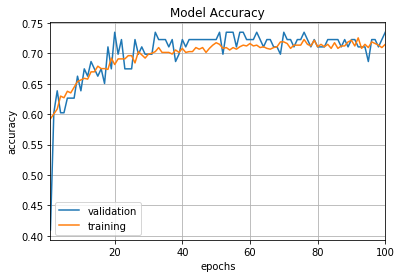

83/83 [==============================] - 0s 314us/step

-------------------------------------------------------------------------------------------          
Fold 10 score : [-0.764075139200831, 0.7349397619086576]
 best Score: 0.7590361474508263          
-------------------------------------------------------------------------------------------




In [ ]:
batch_size = 10
num_classes = 2
epochs = 100
input_shape = len(actual_x[0])
kfold_validation_score_store = []
kfold_accuracy_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0
for train,test in kf.split(actual_x):
    fold += 1
    print("fold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.cosine_proximity,
                  optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)
    kfold_accuracy_score_store.append(history1.history['acc'][epochs-1])

    print("\n-------------------------------------------------------------------------------------------\
          \nFold {0} score : {1}\n best Score: {2}\
          \n-------------------------------------------------------------------------------------------\n\n"\
          .format(fold,score,best_score))
    #break

In [ ]:
print("best score: ",best_score)
#print(kfold_validation_score_store)

avg_cross_validation_score = 0.0
for i in kfold_validation_score_store:
    avg_cross_validation_score += i[1]

print(avg_cross_validation_score/len(kfold_validation_score_store))
kfold_validation_score_store

best score:  0.7590361474508263
0.6943344812145605


[[-0.7470984856287638, 0.6190476162093026],
 [-0.7230962685176304, 0.6071428571428571],
 [-0.7875286511012486, 0.7261904761904762],
 [-0.7836845318476359, 0.75],
 [-0.7283861866916519, 0.6265060233782573],
 [-0.787999193352389, 0.7590361474508263],
 [-0.7678060438259539, 0.6626506052821516],
 [-0.7896227341100394, 0.7228915677013168],
 [-0.7804193424891277, 0.7349397568817598],
 [-0.764075139200831, 0.7349397619086576]]

In [ ]:
avg_accuracy_score = 0.0
for i in kfold_accuracy_score_store:
    avg_accuracy_score += i

print(avg_accuracy_score/len(kfold_accuracy_score_store))

kfold_accuracy_score_store

0.6963735479731799


[0.7226666704813639,
 0.6013333390156428,
 0.7213333316644033,
 0.7200000015894572,
 0.5992010707821891,
 0.7203728338373644,
 0.7230359526988511,
 0.7243675105422537,
 0.7163781626881677,
 0.7150466064321058]



fold #1
Train on 750 samples, validate on 84 samples
Epoch 1/300
 - 22s - loss: 0.8472 - acc: 0.4707 - val_loss: 0.6733 - val_acc: 0.5952
Epoch 2/300
 - 1s - loss: 0.6592 - acc: 0.6027 - val_loss: 0.6571 - val_acc: 0.5952
Epoch 3/300
 - 1s - loss: 0.6499 - acc: 0.6027 - val_loss: 0.6542 - val_acc: 0.5952
Epoch 4/300
 - 1s - loss: 0.6464 - acc: 0.6040 - val_loss: 0.6499 - val_acc: 0.5952
Epoch 5/300
 - 1s - loss: 0.6426 - acc: 0.6093 - val_loss: 0.6469 - val_acc: 0.6071
Epoch 6/300
 - 1s - loss: 0.6364 - acc: 0.6133 - val_loss: 0.6432 - val_acc: 0.5952
Epoch 7/300
 - 1s - loss: 0.6310 - acc: 0.6307 - val_loss: 0.6480 - val_acc: 0.5952
Epoch 8/300
 - 1s - loss: 0.6186 - acc: 0.6547 - val_loss: 0.6331 - val_acc: 0.6190
Epoch 9/300
 - 1s - loss: 0.6107 - acc: 0.6773 - val_loss: 0.6342 - val_acc: 0.6429
Epoch 10/300
 - 1s - loss: 0.6118 - acc: 0.6973 - val_loss: 0.6266 - val_acc: 0.6429
Epoch 11/300
 - 1s - loss: 0.5954 - acc: 0.7093 - val_loss: 0.6254 - val_acc: 0.6310
Epoch 12/300
 - 1s

Epoch 97/300
 - 1s - loss: 0.5694 - acc: 0.7267 - val_loss: 0.6838 - val_acc: 0.6071
Epoch 98/300
 - 1s - loss: 0.5661 - acc: 0.7267 - val_loss: 0.6636 - val_acc: 0.6190
Epoch 99/300
 - 1s - loss: 0.5657 - acc: 0.7267 - val_loss: 0.6550 - val_acc: 0.6190
Epoch 100/300
 - 1s - loss: 0.5692 - acc: 0.7267 - val_loss: 0.6700 - val_acc: 0.6190
Epoch 101/300
 - 1s - loss: 0.5647 - acc: 0.7307 - val_loss: 0.6544 - val_acc: 0.6190
Epoch 102/300
 - 1s - loss: 0.5660 - acc: 0.7307 - val_loss: 0.6805 - val_acc: 0.6071
Epoch 103/300
 - 1s - loss: 0.5738 - acc: 0.7333 - val_loss: 0.6534 - val_acc: 0.6310
Epoch 104/300
 - 1s - loss: 0.5618 - acc: 0.7333 - val_loss: 0.6541 - val_acc: 0.6310
Epoch 105/300
 - 1s - loss: 0.5664 - acc: 0.7320 - val_loss: 0.6544 - val_acc: 0.6310
Epoch 106/300
 - 1s - loss: 0.5630 - acc: 0.7240 - val_loss: 0.6550 - val_acc: 0.6667
Epoch 107/300
 - 1s - loss: 0.5652 - acc: 0.7227 - val_loss: 0.6558 - val_acc: 0.6310
Epoch 108/300
 - 1s - loss: 0.5623 - acc: 0.7227 - val_lo

Epoch 193/300
 - 1s - loss: 0.5560 - acc: 0.7427 - val_loss: 0.6734 - val_acc: 0.5952
Epoch 194/300
 - 1s - loss: 0.5563 - acc: 0.7347 - val_loss: 0.6816 - val_acc: 0.6190
Epoch 195/300
 - 1s - loss: 0.5634 - acc: 0.7333 - val_loss: 0.6850 - val_acc: 0.6071
Epoch 196/300
 - 1s - loss: 0.5649 - acc: 0.7253 - val_loss: 0.6625 - val_acc: 0.6310
Epoch 197/300
 - 1s - loss: 0.5543 - acc: 0.7307 - val_loss: 0.6540 - val_acc: 0.6190
Epoch 198/300
 - 1s - loss: 0.5609 - acc: 0.7307 - val_loss: 0.6809 - val_acc: 0.6190
Epoch 199/300
 - 1s - loss: 0.5580 - acc: 0.7320 - val_loss: 0.6649 - val_acc: 0.6310
Epoch 200/300
 - 1s - loss: 0.5590 - acc: 0.7280 - val_loss: 0.6734 - val_acc: 0.6071
Epoch 201/300
 - 1s - loss: 0.5602 - acc: 0.7320 - val_loss: 0.6609 - val_acc: 0.6310
Epoch 202/300
 - 1s - loss: 0.5593 - acc: 0.7387 - val_loss: 0.6917 - val_acc: 0.5952
Epoch 203/300
 - 1s - loss: 0.5587 - acc: 0.7280 - val_loss: 0.6618 - val_acc: 0.6310
Epoch 204/300
 - 1s - loss: 0.5574 - acc: 0.7347 - val

Epoch 289/300
 - 1s - loss: 0.5492 - acc: 0.7333 - val_loss: 0.6745 - val_acc: 0.6310
Epoch 290/300
 - 1s - loss: 0.5492 - acc: 0.7387 - val_loss: 0.6927 - val_acc: 0.6071
Epoch 291/300
 - 1s - loss: 0.5489 - acc: 0.7320 - val_loss: 0.6759 - val_acc: 0.6190
Epoch 292/300
 - 1s - loss: 0.5483 - acc: 0.7387 - val_loss: 0.6701 - val_acc: 0.6190
Epoch 293/300
 - 1s - loss: 0.5532 - acc: 0.7320 - val_loss: 0.6627 - val_acc: 0.6190
Epoch 294/300
 - 1s - loss: 0.5485 - acc: 0.7413 - val_loss: 0.6833 - val_acc: 0.6429
Epoch 295/300
 - 1s - loss: 0.5547 - acc: 0.7360 - val_loss: 0.6699 - val_acc: 0.6310
Epoch 296/300
 - 1s - loss: 0.5482 - acc: 0.7453 - val_loss: 0.6929 - val_acc: 0.6071
Epoch 297/300
 - 1s - loss: 0.5488 - acc: 0.7293 - val_loss: 0.6926 - val_acc: 0.6071
Epoch 298/300
 - 1s - loss: 0.5471 - acc: 0.7360 - val_loss: 0.6795 - val_acc: 0.6190
Epoch 299/300
 - 1s - loss: 0.5505 - acc: 0.7333 - val_loss: 0.6999 - val_acc: 0.6310
Epoch 300/300
 - 1s - loss: 0.5525 - acc: 0.7333 - val

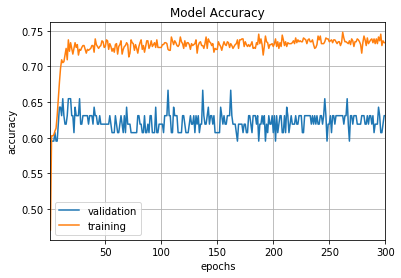

84/84 [==============================] - 0s 218us/step

Fold 1 score : [0.6727994339806693, 0.6309523809523809]
 best Score: 0.6309523809523809


fold #2
Train on 750 samples, validate on 84 samples
Epoch 1/300
 - 17s - loss: 1.1918 - acc: 0.4000 - val_loss: 0.6926 - val_acc: 0.5238
Epoch 2/300
 - 1s - loss: 0.6696 - acc: 0.6000 - val_loss: 0.6583 - val_acc: 0.6071
Epoch 3/300
 - 1s - loss: 0.6614 - acc: 0.6013 - val_loss: 0.6532 - val_acc: 0.6071
Epoch 4/300
 - 1s - loss: 0.6603 - acc: 0.6013 - val_loss: 0.6495 - val_acc: 0.6071
Epoch 5/300
 - 1s - loss: 0.6580 - acc: 0.6013 - val_loss: 0.6464 - val_acc: 0.6071
Epoch 6/300
 - 1s - loss: 0.6548 - acc: 0.6013 - val_loss: 0.6435 - val_acc: 0.6071
Epoch 7/300
 - 1s - loss: 0.6525 - acc: 0.6013 - val_loss: 0.6407 - val_acc: 0.6071
Epoch 8/300
 - 1s - loss: 0.6505 - acc: 0.6013 - val_loss: 0.6359 - val_acc: 0.6071
Epoch 9/300
 - 1s - loss: 0.6434 - acc: 0.6013 - val_loss: 0.6415 - val_acc: 0.6071
Epoch 10/300
 - 1s - loss: 0.6403 - acc: 0.6

 - 1s - loss: 0.5759 - acc: 0.7107 - val_loss: 0.5776 - val_acc: 0.7857
Epoch 96/300
 - 1s - loss: 0.5792 - acc: 0.7147 - val_loss: 0.5580 - val_acc: 0.7619
Epoch 97/300
 - 1s - loss: 0.5757 - acc: 0.7133 - val_loss: 0.5658 - val_acc: 0.7738
Epoch 98/300
 - 1s - loss: 0.5777 - acc: 0.7080 - val_loss: 0.5578 - val_acc: 0.7500
Epoch 99/300
 - 1s - loss: 0.5751 - acc: 0.7053 - val_loss: 0.5640 - val_acc: 0.7857
Epoch 100/300
 - 1s - loss: 0.5736 - acc: 0.7120 - val_loss: 0.5579 - val_acc: 0.7500
Epoch 101/300
 - 1s - loss: 0.5738 - acc: 0.7120 - val_loss: 0.5692 - val_acc: 0.7619
Epoch 102/300
 - 1s - loss: 0.5782 - acc: 0.7067 - val_loss: 0.5588 - val_acc: 0.7738
Epoch 103/300
 - 1s - loss: 0.5771 - acc: 0.7067 - val_loss: 0.5571 - val_acc: 0.7619
Epoch 104/300
 - 1s - loss: 0.5781 - acc: 0.7120 - val_loss: 0.5590 - val_acc: 0.7619
Epoch 105/300
 - 1s - loss: 0.5763 - acc: 0.7160 - val_loss: 0.5581 - val_acc: 0.7500
Epoch 106/300
 - 1s - loss: 0.5753 - acc: 0.7080 - val_loss: 0.5670 - va

Epoch 191/300
 - 1s - loss: 0.5643 - acc: 0.7160 - val_loss: 0.5569 - val_acc: 0.7857
Epoch 192/300
 - 1s - loss: 0.5668 - acc: 0.7173 - val_loss: 0.5754 - val_acc: 0.7619
Epoch 193/300
 - 1s - loss: 0.5658 - acc: 0.7200 - val_loss: 0.5712 - val_acc: 0.7738
Epoch 194/300
 - 1s - loss: 0.5746 - acc: 0.7000 - val_loss: 0.5659 - val_acc: 0.7738
Epoch 195/300
 - 1s - loss: 0.5676 - acc: 0.7120 - val_loss: 0.5774 - val_acc: 0.7738
Epoch 196/300
 - 1s - loss: 0.5712 - acc: 0.7107 - val_loss: 0.5596 - val_acc: 0.7857
Epoch 197/300
 - 1s - loss: 0.5668 - acc: 0.7173 - val_loss: 0.5617 - val_acc: 0.7976
Epoch 198/300
 - 1s - loss: 0.5724 - acc: 0.7040 - val_loss: 0.5543 - val_acc: 0.7619
Epoch 199/300
 - 1s - loss: 0.5650 - acc: 0.7173 - val_loss: 0.5586 - val_acc: 0.7738
Epoch 200/300
 - 1s - loss: 0.5663 - acc: 0.7120 - val_loss: 0.5616 - val_acc: 0.7857
Epoch 201/300
 - 1s - loss: 0.5637 - acc: 0.7160 - val_loss: 0.5680 - val_acc: 0.7738
Epoch 202/300
 - 1s - loss: 0.5634 - acc: 0.7107 - val

Epoch 287/300
 - 1s - loss: 0.5513 - acc: 0.7227 - val_loss: 0.5637 - val_acc: 0.7500
Epoch 288/300
 - 1s - loss: 0.5576 - acc: 0.7227 - val_loss: 0.5728 - val_acc: 0.7500
Epoch 289/300
 - 1s - loss: 0.5516 - acc: 0.7293 - val_loss: 0.5652 - val_acc: 0.7619
Epoch 290/300
 - 1s - loss: 0.5552 - acc: 0.7213 - val_loss: 0.5681 - val_acc: 0.7738
Epoch 291/300
 - 1s - loss: 0.5484 - acc: 0.7360 - val_loss: 0.5759 - val_acc: 0.7500
Epoch 292/300
 - 1s - loss: 0.5559 - acc: 0.7293 - val_loss: 0.5758 - val_acc: 0.7500
Epoch 293/300
 - 1s - loss: 0.5541 - acc: 0.7200 - val_loss: 0.5689 - val_acc: 0.7500
Epoch 294/300
 - 1s - loss: 0.5490 - acc: 0.7240 - val_loss: 0.5647 - val_acc: 0.7500
Epoch 295/300
 - 1s - loss: 0.5525 - acc: 0.7347 - val_loss: 0.5635 - val_acc: 0.7500
Epoch 296/300
 - 1s - loss: 0.5512 - acc: 0.7267 - val_loss: 0.5677 - val_acc: 0.7619
Epoch 297/300
 - 1s - loss: 0.5518 - acc: 0.7240 - val_loss: 0.5683 - val_acc: 0.7619
Epoch 298/300
 - 1s - loss: 0.5562 - acc: 0.7253 - val

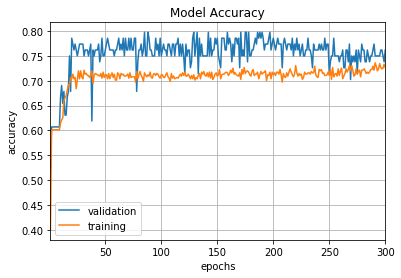

84/84 [==============================] - 0s 256us/step

Fold 2 score : [0.5614677128337678, 0.761904756228129]
 best Score: 0.761904756228129


fold #3
Train on 750 samples, validate on 84 samples
Epoch 1/300
 - 17s - loss: 0.8598 - acc: 0.6027 - val_loss: 0.6646 - val_acc: 0.5952
Epoch 2/300
 - 1s - loss: 0.6570 - acc: 0.6027 - val_loss: 0.6658 - val_acc: 0.5952
Epoch 3/300
 - 1s - loss: 0.6542 - acc: 0.6027 - val_loss: 0.6537 - val_acc: 0.5952
Epoch 4/300
 - 1s - loss: 0.6485 - acc: 0.6147 - val_loss: 0.6553 - val_acc: 0.6429
Epoch 5/300
 - 1s - loss: 0.6488 - acc: 0.6200 - val_loss: 0.6414 - val_acc: 0.6190
Epoch 6/300
 - 1s - loss: 0.6406 - acc: 0.6293 - val_loss: 0.6360 - val_acc: 0.6429
Epoch 7/300
 - 1s - loss: 0.6386 - acc: 0.6267 - val_loss: 0.6307 - val_acc: 0.6786
Epoch 8/300
 - 1s - loss: 0.6344 - acc: 0.6360 - val_loss: 0.6319 - val_acc: 0.6190
Epoch 9/300
 - 1s - loss: 0.6307 - acc: 0.6413 - val_loss: 0.6120 - val_acc: 0.6786
Epoch 10/300
 - 1s - loss: 0.6185 - acc: 0.645

Epoch 96/300
 - 1s - loss: 0.5739 - acc: 0.7093 - val_loss: 0.5498 - val_acc: 0.7262
Epoch 97/300
 - 1s - loss: 0.5713 - acc: 0.7133 - val_loss: 0.5593 - val_acc: 0.7262
Epoch 98/300
 - 1s - loss: 0.5728 - acc: 0.7173 - val_loss: 0.5571 - val_acc: 0.7262
Epoch 99/300
 - 1s - loss: 0.5732 - acc: 0.7213 - val_loss: 0.5501 - val_acc: 0.7262
Epoch 100/300
 - 1s - loss: 0.5721 - acc: 0.7147 - val_loss: 0.5525 - val_acc: 0.7262
Epoch 101/300
 - 1s - loss: 0.5694 - acc: 0.7240 - val_loss: 0.5471 - val_acc: 0.7381
Epoch 102/300
 - 1s - loss: 0.5707 - acc: 0.7173 - val_loss: 0.5512 - val_acc: 0.7262
Epoch 103/300
 - 1s - loss: 0.5701 - acc: 0.7240 - val_loss: 0.5516 - val_acc: 0.7262
Epoch 104/300
 - 1s - loss: 0.5802 - acc: 0.7160 - val_loss: 0.5664 - val_acc: 0.7500
Epoch 105/300
 - 1s - loss: 0.5765 - acc: 0.7160 - val_loss: 0.5518 - val_acc: 0.7143
Epoch 106/300
 - 1s - loss: 0.5695 - acc: 0.7213 - val_loss: 0.5507 - val_acc: 0.7262
Epoch 107/300
 - 1s - loss: 0.5763 - acc: 0.7027 - val_los

Epoch 192/300
 - 1s - loss: 0.5672 - acc: 0.7227 - val_loss: 0.5544 - val_acc: 0.7262
Epoch 193/300
 - 1s - loss: 0.5629 - acc: 0.7200 - val_loss: 0.5549 - val_acc: 0.7262
Epoch 194/300
 - 1s - loss: 0.5642 - acc: 0.7213 - val_loss: 0.5562 - val_acc: 0.7262
Epoch 195/300
 - 1s - loss: 0.5604 - acc: 0.7280 - val_loss: 0.5519 - val_acc: 0.7381
Epoch 196/300
 - 1s - loss: 0.5617 - acc: 0.7213 - val_loss: 0.5534 - val_acc: 0.7262
Epoch 197/300
 - 1s - loss: 0.5574 - acc: 0.7347 - val_loss: 0.5471 - val_acc: 0.7381
Epoch 198/300
 - 1s - loss: 0.5591 - acc: 0.7253 - val_loss: 0.5520 - val_acc: 0.7262
Epoch 199/300
 - 1s - loss: 0.5621 - acc: 0.7227 - val_loss: 0.5523 - val_acc: 0.7381
Epoch 200/300
 - 1s - loss: 0.5550 - acc: 0.7360 - val_loss: 0.5501 - val_acc: 0.7262
Epoch 201/300
 - 1s - loss: 0.5661 - acc: 0.7160 - val_loss: 0.5651 - val_acc: 0.7381
Epoch 202/300
 - 1s - loss: 0.5620 - acc: 0.7200 - val_loss: 0.5525 - val_acc: 0.7381
Epoch 203/300
 - 1s - loss: 0.5548 - acc: 0.7267 - val

Epoch 288/300
 - 1s - loss: 0.5468 - acc: 0.7333 - val_loss: 0.5511 - val_acc: 0.7500
Epoch 289/300
 - 1s - loss: 0.5458 - acc: 0.7320 - val_loss: 0.5614 - val_acc: 0.7500
Epoch 290/300
 - 1s - loss: 0.5484 - acc: 0.7267 - val_loss: 0.5550 - val_acc: 0.7262
Epoch 291/300
 - 1s - loss: 0.5534 - acc: 0.7293 - val_loss: 0.5617 - val_acc: 0.7500
Epoch 292/300
 - 1s - loss: 0.5530 - acc: 0.7160 - val_loss: 0.5579 - val_acc: 0.7500
Epoch 293/300
 - 1s - loss: 0.5500 - acc: 0.7333 - val_loss: 0.5549 - val_acc: 0.7500
Epoch 294/300
 - 1s - loss: 0.5528 - acc: 0.7267 - val_loss: 0.5474 - val_acc: 0.7500
Epoch 295/300
 - 1s - loss: 0.5457 - acc: 0.7280 - val_loss: 0.5566 - val_acc: 0.7500
Epoch 296/300
 - 1s - loss: 0.5484 - acc: 0.7333 - val_loss: 0.5626 - val_acc: 0.7500
Epoch 297/300
 - 1s - loss: 0.5486 - acc: 0.7320 - val_loss: 0.5496 - val_acc: 0.7500
Epoch 298/300
 - 1s - loss: 0.5460 - acc: 0.7360 - val_loss: 0.5580 - val_acc: 0.7262
Epoch 299/300
 - 1s - loss: 0.5481 - acc: 0.7253 - val

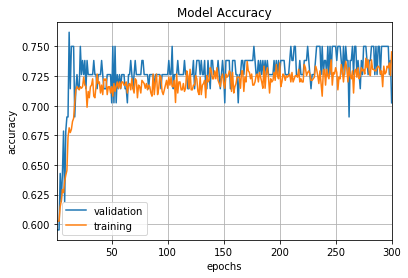

84/84 [==============================] - 0s 264us/step

Fold 3 score : [0.5706616952305749, 0.7023809580575853]
 best Score: 0.761904756228129


fold #4
Train on 750 samples, validate on 84 samples
Epoch 1/300
 - 17s - loss: 0.8420 - acc: 0.5840 - val_loss: 0.6685 - val_acc: 0.5833
Epoch 2/300
 - 1s - loss: 0.6314 - acc: 0.6413 - val_loss: 0.6514 - val_acc: 0.5952
Epoch 3/300
 - 1s - loss: 0.6355 - acc: 0.6320 - val_loss: 0.6523 - val_acc: 0.5952
Epoch 4/300
 - 1s - loss: 0.6317 - acc: 0.6427 - val_loss: 0.6355 - val_acc: 0.6190
Epoch 5/300
 - 1s - loss: 0.6233 - acc: 0.6493 - val_loss: 0.6869 - val_acc: 0.5119
Epoch 6/300
 - 1s - loss: 0.6290 - acc: 0.6427 - val_loss: 0.6415 - val_acc: 0.6190
Epoch 7/300
 - 1s - loss: 0.6234 - acc: 0.6680 - val_loss: 0.7017 - val_acc: 0.5833
Epoch 8/300
 - 1s - loss: 0.6344 - acc: 0.6427 - val_loss: 0.6254 - val_acc: 0.6071
Epoch 9/300
 - 1s - loss: 0.6365 - acc: 0.6600 - val_loss: 0.6231 - val_acc: 0.7500
Epoch 10/300
 - 1s - loss: 0.6157 - acc: 0.68

 - 1s - loss: 0.5786 - acc: 0.7107 - val_loss: 0.5793 - val_acc: 0.7381
Epoch 96/300
 - 1s - loss: 0.5762 - acc: 0.7120 - val_loss: 0.5750 - val_acc: 0.7143
Epoch 97/300
 - 1s - loss: 0.5803 - acc: 0.7107 - val_loss: 0.5763 - val_acc: 0.7381
Epoch 98/300
 - 1s - loss: 0.5748 - acc: 0.7267 - val_loss: 0.5757 - val_acc: 0.7262
Epoch 99/300
 - 1s - loss: 0.5772 - acc: 0.7120 - val_loss: 0.5748 - val_acc: 0.7262
Epoch 100/300
 - 1s - loss: 0.5693 - acc: 0.7200 - val_loss: 0.5855 - val_acc: 0.6786
Epoch 101/300
 - 1s - loss: 0.5760 - acc: 0.7067 - val_loss: 0.5790 - val_acc: 0.7381
Epoch 102/300
 - 1s - loss: 0.5731 - acc: 0.7200 - val_loss: 0.5738 - val_acc: 0.7500
Epoch 103/300
 - 1s - loss: 0.5731 - acc: 0.7133 - val_loss: 0.5745 - val_acc: 0.7262
Epoch 104/300
 - 1s - loss: 0.5779 - acc: 0.7227 - val_loss: 0.5727 - val_acc: 0.7500
Epoch 105/300
 - 1s - loss: 0.5758 - acc: 0.7160 - val_loss: 0.5757 - val_acc: 0.7381
Epoch 106/300
 - 1s - loss: 0.5738 - acc: 0.7173 - val_loss: 0.5726 - va

Epoch 191/300
 - 1s - loss: 0.5719 - acc: 0.7213 - val_loss: 0.6154 - val_acc: 0.7262
Epoch 192/300
 - 1s - loss: 0.5727 - acc: 0.7120 - val_loss: 0.5792 - val_acc: 0.7381
Epoch 193/300
 - 1s - loss: 0.5708 - acc: 0.7187 - val_loss: 0.5953 - val_acc: 0.7619
Epoch 194/300
 - 1s - loss: 0.5735 - acc: 0.7120 - val_loss: 0.5783 - val_acc: 0.6905
Epoch 195/300
 - 1s - loss: 0.5717 - acc: 0.6987 - val_loss: 0.5743 - val_acc: 0.7262
Epoch 196/300
 - 1s - loss: 0.5672 - acc: 0.7173 - val_loss: 0.6242 - val_acc: 0.6905
Epoch 197/300
 - 1s - loss: 0.5711 - acc: 0.7160 - val_loss: 0.5799 - val_acc: 0.7262
Epoch 198/300
 - 1s - loss: 0.5687 - acc: 0.7200 - val_loss: 0.5809 - val_acc: 0.7381
Epoch 199/300
 - 1s - loss: 0.5674 - acc: 0.7213 - val_loss: 0.5809 - val_acc: 0.7381
Epoch 200/300
 - 1s - loss: 0.5651 - acc: 0.7147 - val_loss: 0.5853 - val_acc: 0.7500
Epoch 201/300
 - 1s - loss: 0.5705 - acc: 0.7200 - val_loss: 0.5770 - val_acc: 0.7262
Epoch 202/300
 - 1s - loss: 0.5759 - acc: 0.7067 - val

Epoch 287/300
 - 1s - loss: 0.5608 - acc: 0.7120 - val_loss: 0.6331 - val_acc: 0.7262
Epoch 288/300
 - 1s - loss: 0.5591 - acc: 0.7133 - val_loss: 0.6231 - val_acc: 0.7381
Epoch 289/300
 - 1s - loss: 0.5595 - acc: 0.7213 - val_loss: 0.6186 - val_acc: 0.7500
Epoch 290/300
 - 1s - loss: 0.5628 - acc: 0.7147 - val_loss: 0.5885 - val_acc: 0.7024
Epoch 291/300
 - 1s - loss: 0.5610 - acc: 0.7293 - val_loss: 0.6458 - val_acc: 0.7500
Epoch 292/300
 - 1s - loss: 0.5596 - acc: 0.7240 - val_loss: 0.5915 - val_acc: 0.7500
Epoch 293/300
 - 1s - loss: 0.5647 - acc: 0.7133 - val_loss: 0.6234 - val_acc: 0.7381
Epoch 294/300
 - 1s - loss: 0.5599 - acc: 0.7160 - val_loss: 0.7217 - val_acc: 0.7619
Epoch 295/300
 - 1s - loss: 0.5660 - acc: 0.7213 - val_loss: 0.5977 - val_acc: 0.7500
Epoch 296/300
 - 1s - loss: 0.5614 - acc: 0.7120 - val_loss: 0.6120 - val_acc: 0.7143
Epoch 297/300
 - 1s - loss: 0.5574 - acc: 0.7147 - val_loss: 0.6238 - val_acc: 0.7500
Epoch 298/300
 - 1s - loss: 0.5587 - acc: 0.7187 - val

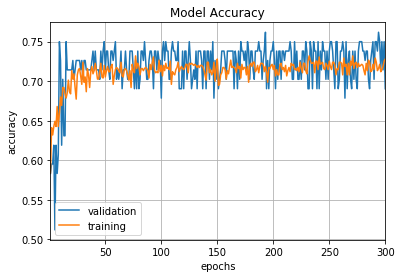

84/84 [==============================] - 0s 401us/step

Fold 4 score : [0.5985656011672247, 0.6904761904761905]
 best Score: 0.761904756228129


fold #5
Train on 751 samples, validate on 83 samples
Epoch 1/300
 - 17s - loss: 1.1088 - acc: 0.4847 - val_loss: 0.6638 - val_acc: 0.6265
Epoch 2/300
 - 1s - loss: 0.6767 - acc: 0.5992 - val_loss: 0.6625 - val_acc: 0.6265
Epoch 3/300
 - 1s - loss: 0.6761 - acc: 0.5992 - val_loss: 0.6600 - val_acc: 0.6265
Epoch 4/300
 - 1s - loss: 0.6688 - acc: 0.5992 - val_loss: 0.6584 - val_acc: 0.6265
Epoch 5/300
 - 1s - loss: 0.6663 - acc: 0.6005 - val_loss: 0.6569 - val_acc: 0.6265
Epoch 6/300
 - 1s - loss: 0.6619 - acc: 0.5992 - val_loss: 0.6553 - val_acc: 0.6265
Epoch 7/300
 - 1s - loss: 0.6589 - acc: 0.5992 - val_loss: 0.6582 - val_acc: 0.6265
Epoch 8/300
 - 1s - loss: 0.6539 - acc: 0.6005 - val_loss: 0.6550 - val_acc: 0.6265
Epoch 9/300
 - 1s - loss: 0.6485 - acc: 0.6032 - val_loss: 0.6529 - val_acc: 0.6265
Epoch 10/300
 - 1s - loss: 0.6465 - acc: 0.60

 - 1s - loss: 0.5627 - acc: 0.7244 - val_loss: 0.6231 - val_acc: 0.6747
Epoch 96/300
 - 1s - loss: 0.5641 - acc: 0.7270 - val_loss: 0.6252 - val_acc: 0.6867
Epoch 97/300
 - 1s - loss: 0.5609 - acc: 0.7190 - val_loss: 0.6415 - val_acc: 0.6867
Epoch 98/300
 - 1s - loss: 0.5625 - acc: 0.7217 - val_loss: 0.6375 - val_acc: 0.6988
Epoch 99/300
 - 1s - loss: 0.5648 - acc: 0.7204 - val_loss: 0.6150 - val_acc: 0.6988
Epoch 100/300
 - 1s - loss: 0.5626 - acc: 0.7217 - val_loss: 0.6195 - val_acc: 0.6627
Epoch 101/300
 - 1s - loss: 0.5606 - acc: 0.7137 - val_loss: 0.6414 - val_acc: 0.6867
Epoch 102/300
 - 1s - loss: 0.5665 - acc: 0.7164 - val_loss: 0.6304 - val_acc: 0.6867
Epoch 103/300
 - 1s - loss: 0.5638 - acc: 0.7244 - val_loss: 0.6145 - val_acc: 0.6867
Epoch 104/300
 - 1s - loss: 0.5611 - acc: 0.7217 - val_loss: 0.6271 - val_acc: 0.6988
Epoch 105/300
 - 1s - loss: 0.5665 - acc: 0.7190 - val_loss: 0.6186 - val_acc: 0.6627
Epoch 106/300
 - 1s - loss: 0.5635 - acc: 0.7244 - val_loss: 0.6463 - va

Epoch 191/300
 - 1s - loss: 0.5571 - acc: 0.7217 - val_loss: 0.6324 - val_acc: 0.6506
Epoch 192/300
 - 0s - loss: 0.5581 - acc: 0.7190 - val_loss: 0.6125 - val_acc: 0.6627
Epoch 193/300
 - 0s - loss: 0.5568 - acc: 0.7230 - val_loss: 0.6142 - val_acc: 0.6506
Epoch 194/300
 - 0s - loss: 0.5556 - acc: 0.7257 - val_loss: 0.6158 - val_acc: 0.6506
Epoch 195/300
 - 1s - loss: 0.5605 - acc: 0.7217 - val_loss: 0.6241 - val_acc: 0.6627
Epoch 196/300
 - 1s - loss: 0.5581 - acc: 0.7310 - val_loss: 0.6146 - val_acc: 0.6747
Epoch 197/300
 - 1s - loss: 0.5591 - acc: 0.7270 - val_loss: 0.6309 - val_acc: 0.6627
Epoch 198/300
 - 0s - loss: 0.5565 - acc: 0.7204 - val_loss: 0.6135 - val_acc: 0.6506
Epoch 199/300
 - 1s - loss: 0.5607 - acc: 0.7230 - val_loss: 0.6218 - val_acc: 0.6627
Epoch 200/300
 - 1s - loss: 0.5566 - acc: 0.7244 - val_loss: 0.6175 - val_acc: 0.6627
Epoch 201/300
 - 1s - loss: 0.5564 - acc: 0.7217 - val_loss: 0.6230 - val_acc: 0.6747
Epoch 202/300
 - 1s - loss: 0.5571 - acc: 0.7177 - val

Epoch 287/300
 - 1s - loss: 0.5570 - acc: 0.7257 - val_loss: 0.6199 - val_acc: 0.6867
Epoch 288/300
 - 1s - loss: 0.5536 - acc: 0.7244 - val_loss: 0.6286 - val_acc: 0.6506
Epoch 289/300
 - 1s - loss: 0.5532 - acc: 0.7150 - val_loss: 0.6308 - val_acc: 0.6627
Epoch 290/300
 - 1s - loss: 0.5563 - acc: 0.7217 - val_loss: 0.6163 - val_acc: 0.6627
Epoch 291/300
 - 1s - loss: 0.5565 - acc: 0.7217 - val_loss: 0.6177 - val_acc: 0.6627
Epoch 292/300
 - 1s - loss: 0.5562 - acc: 0.7164 - val_loss: 0.6180 - val_acc: 0.6867
Epoch 293/300
 - 1s - loss: 0.5557 - acc: 0.7257 - val_loss: 0.6259 - val_acc: 0.6627
Epoch 294/300
 - 1s - loss: 0.5539 - acc: 0.7244 - val_loss: 0.6138 - val_acc: 0.6506
Epoch 295/300
 - 1s - loss: 0.5577 - acc: 0.7217 - val_loss: 0.6154 - val_acc: 0.6627
Epoch 296/300
 - 1s - loss: 0.5559 - acc: 0.7244 - val_loss: 0.6102 - val_acc: 0.6506
Epoch 297/300
 - 1s - loss: 0.5649 - acc: 0.7217 - val_loss: 0.6176 - val_acc: 0.6867
Epoch 298/300
 - 1s - loss: 0.5559 - acc: 0.7190 - val

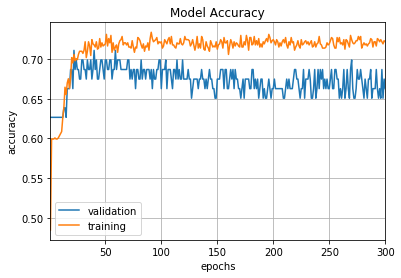

83/83 [==============================] - 0s 211us/step

Fold 5 score : [0.6158285374382892, 0.6626506088727928]
 best Score: 0.761904756228129


fold #6
Train on 751 samples, validate on 83 samples
Epoch 1/300
 - 18s - loss: 9.6284 - acc: 0.4008 - val_loss: 10.0191 - val_acc: 0.3735
Epoch 2/300
 - 1s - loss: 6.7608 - acc: 0.4008 - val_loss: 2.4870 - val_acc: 0.3735
Epoch 3/300
 - 1s - loss: 1.0940 - acc: 0.5166 - val_loss: 0.6661 - val_acc: 0.6265
Epoch 4/300
 - 1s - loss: 0.6796 - acc: 0.5992 - val_loss: 0.6635 - val_acc: 0.6265
Epoch 5/300
 - 1s - loss: 0.6775 - acc: 0.5992 - val_loss: 0.6636 - val_acc: 0.6265
Epoch 6/300
 - 1s - loss: 0.6777 - acc: 0.5992 - val_loss: 0.6667 - val_acc: 0.6265
Epoch 7/300
 - 1s - loss: 0.6741 - acc: 0.5992 - val_loss: 0.6595 - val_acc: 0.6265
Epoch 8/300
 - 1s - loss: 0.6732 - acc: 0.5992 - val_loss: 0.6585 - val_acc: 0.6265
Epoch 9/300
 - 1s - loss: 0.6719 - acc: 0.5992 - val_loss: 0.6622 - val_acc: 0.6265
Epoch 10/300
 - 1s - loss: 0.6720 - acc: 0.5

 - 1s - loss: 0.5754 - acc: 0.7164 - val_loss: 0.5682 - val_acc: 0.7349
Epoch 96/300
 - 1s - loss: 0.5740 - acc: 0.7124 - val_loss: 0.5707 - val_acc: 0.7229
Epoch 97/300
 - 1s - loss: 0.5736 - acc: 0.7057 - val_loss: 0.5721 - val_acc: 0.7108
Epoch 98/300
 - 1s - loss: 0.5799 - acc: 0.7084 - val_loss: 0.5670 - val_acc: 0.6988
Epoch 99/300
 - 1s - loss: 0.5777 - acc: 0.7031 - val_loss: 0.5698 - val_acc: 0.7470
Epoch 100/300
 - 1s - loss: 0.5714 - acc: 0.7244 - val_loss: 0.5637 - val_acc: 0.7470
Epoch 101/300
 - 1s - loss: 0.5746 - acc: 0.7177 - val_loss: 0.5650 - val_acc: 0.7229
Epoch 102/300
 - 1s - loss: 0.5730 - acc: 0.7084 - val_loss: 0.5861 - val_acc: 0.7711
Epoch 103/300
 - 1s - loss: 0.5733 - acc: 0.7124 - val_loss: 0.5660 - val_acc: 0.7108
Epoch 104/300
 - 1s - loss: 0.5729 - acc: 0.7137 - val_loss: 0.5637 - val_acc: 0.7470
Epoch 105/300
 - 1s - loss: 0.5741 - acc: 0.7150 - val_loss: 0.5625 - val_acc: 0.7349
Epoch 106/300
 - 1s - loss: 0.5718 - acc: 0.7190 - val_loss: 0.5649 - va

Epoch 191/300
 - 1s - loss: 0.5702 - acc: 0.7204 - val_loss: 0.5648 - val_acc: 0.7349
Epoch 192/300
 - 1s - loss: 0.5680 - acc: 0.7204 - val_loss: 0.5738 - val_acc: 0.6988
Epoch 193/300
 - 1s - loss: 0.5734 - acc: 0.7137 - val_loss: 0.5695 - val_acc: 0.7108
Epoch 194/300
 - 1s - loss: 0.5678 - acc: 0.7190 - val_loss: 0.5744 - val_acc: 0.7108
Epoch 195/300
 - 1s - loss: 0.5678 - acc: 0.7204 - val_loss: 0.5719 - val_acc: 0.6988
Epoch 196/300
 - 1s - loss: 0.5713 - acc: 0.7204 - val_loss: 0.5709 - val_acc: 0.7349
Epoch 197/300
 - 1s - loss: 0.5726 - acc: 0.7337 - val_loss: 0.5666 - val_acc: 0.6867
Epoch 198/300
 - 1s - loss: 0.5691 - acc: 0.7177 - val_loss: 0.5770 - val_acc: 0.7229
Epoch 199/300
 - 1s - loss: 0.5744 - acc: 0.7244 - val_loss: 0.5703 - val_acc: 0.6988
Epoch 200/300
 - 1s - loss: 0.5649 - acc: 0.7204 - val_loss: 0.5663 - val_acc: 0.7349
Epoch 201/300
 - 1s - loss: 0.5678 - acc: 0.7217 - val_loss: 0.5757 - val_acc: 0.7229
Epoch 202/300
 - 1s - loss: 0.5717 - acc: 0.7137 - val

Epoch 287/300
 - 1s - loss: 0.5628 - acc: 0.7257 - val_loss: 0.5716 - val_acc: 0.7108
Epoch 288/300
 - 1s - loss: 0.5631 - acc: 0.7177 - val_loss: 0.5711 - val_acc: 0.7108
Epoch 289/300
 - 1s - loss: 0.5624 - acc: 0.7270 - val_loss: 0.5744 - val_acc: 0.7108
Epoch 290/300
 - 1s - loss: 0.5684 - acc: 0.7164 - val_loss: 0.5720 - val_acc: 0.7108
Epoch 291/300
 - 1s - loss: 0.5641 - acc: 0.7111 - val_loss: 0.5907 - val_acc: 0.7108
Epoch 292/300
 - 1s - loss: 0.5678 - acc: 0.7150 - val_loss: 0.5821 - val_acc: 0.7349
Epoch 293/300
 - 1s - loss: 0.5609 - acc: 0.7257 - val_loss: 0.5857 - val_acc: 0.7229
Epoch 294/300
 - 1s - loss: 0.5651 - acc: 0.7230 - val_loss: 0.5783 - val_acc: 0.6988
Epoch 295/300
 - 1s - loss: 0.5606 - acc: 0.7230 - val_loss: 0.5836 - val_acc: 0.7470
Epoch 296/300
 - 1s - loss: 0.5719 - acc: 0.7124 - val_loss: 0.5828 - val_acc: 0.6867
Epoch 297/300
 - 1s - loss: 0.5630 - acc: 0.7230 - val_loss: 0.5752 - val_acc: 0.7229
Epoch 298/300
 - 1s - loss: 0.5619 - acc: 0.7284 - val

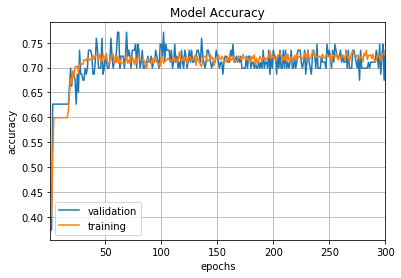

83/83 [==============================] - 0s 227us/step

Fold 6 score : [0.5714552854917135, 0.7349397633449141]
 best Score: 0.761904756228129


fold #7
Train on 751 samples, validate on 83 samples
Epoch 1/300
 - 18s - loss: 0.6695 - acc: 0.6045 - val_loss: 0.6337 - val_acc: 0.6506
Epoch 2/300
 - 1s - loss: 0.6620 - acc: 0.5899 - val_loss: 0.6435 - val_acc: 0.6747
Epoch 3/300
 - 1s - loss: 0.6520 - acc: 0.6099 - val_loss: 0.6422 - val_acc: 0.6506
Epoch 4/300
 - 1s - loss: 0.6498 - acc: 0.6218 - val_loss: 0.6284 - val_acc: 0.6506
Epoch 5/300
 - 1s - loss: 0.6481 - acc: 0.6192 - val_loss: 0.6426 - val_acc: 0.6747
Epoch 6/300
 - 1s - loss: 0.6473 - acc: 0.6298 - val_loss: 0.6324 - val_acc: 0.6988
Epoch 7/300
 - 1s - loss: 0.6435 - acc: 0.6352 - val_loss: 0.6288 - val_acc: 0.6988
Epoch 8/300
 - 1s - loss: 0.6347 - acc: 0.6365 - val_loss: 0.6199 - val_acc: 0.6747
Epoch 9/300
 - 1s - loss: 0.6322 - acc: 0.6605 - val_loss: 0.6181 - val_acc: 0.6988
Epoch 10/300
 - 1s - loss: 0.6276 - acc: 0.66

 - 1s - loss: 0.5673 - acc: 0.7164 - val_loss: 0.6449 - val_acc: 0.6988
Epoch 96/300
 - 1s - loss: 0.5719 - acc: 0.7111 - val_loss: 0.6070 - val_acc: 0.6386
Epoch 97/300
 - 1s - loss: 0.5731 - acc: 0.7177 - val_loss: 0.6092 - val_acc: 0.6386
Epoch 98/300
 - 1s - loss: 0.5674 - acc: 0.7257 - val_loss: 0.6089 - val_acc: 0.6386
Epoch 99/300
 - 1s - loss: 0.5688 - acc: 0.7217 - val_loss: 0.6079 - val_acc: 0.6386
Epoch 100/300
 - 1s - loss: 0.5717 - acc: 0.7137 - val_loss: 0.6077 - val_acc: 0.6506
Epoch 101/300
 - 1s - loss: 0.5708 - acc: 0.7150 - val_loss: 0.6117 - val_acc: 0.6386
Epoch 102/300
 - 1s - loss: 0.5687 - acc: 0.7297 - val_loss: 0.6223 - val_acc: 0.6747
Epoch 103/300
 - 1s - loss: 0.5739 - acc: 0.7284 - val_loss: 0.6095 - val_acc: 0.6265
Epoch 104/300
 - 1s - loss: 0.5711 - acc: 0.7230 - val_loss: 0.6149 - val_acc: 0.6627
Epoch 105/300
 - 1s - loss: 0.5750 - acc: 0.7177 - val_loss: 0.6160 - val_acc: 0.6506
Epoch 106/300
 - 1s - loss: 0.5702 - acc: 0.7150 - val_loss: 0.6095 - va

Epoch 191/300
 - 1s - loss: 0.5662 - acc: 0.7270 - val_loss: 0.6156 - val_acc: 0.6386
Epoch 192/300
 - 1s - loss: 0.5629 - acc: 0.7217 - val_loss: 0.6141 - val_acc: 0.6386
Epoch 193/300
 - 1s - loss: 0.5675 - acc: 0.7204 - val_loss: 0.6108 - val_acc: 0.6386
Epoch 194/300
 - 1s - loss: 0.5630 - acc: 0.7257 - val_loss: 0.6170 - val_acc: 0.6386
Epoch 195/300
 - 1s - loss: 0.5634 - acc: 0.7257 - val_loss: 0.6296 - val_acc: 0.6627
Epoch 196/300
 - 1s - loss: 0.5598 - acc: 0.7270 - val_loss: 0.6337 - val_acc: 0.6506
Epoch 197/300
 - 1s - loss: 0.5610 - acc: 0.7297 - val_loss: 0.6102 - val_acc: 0.6265
Epoch 198/300
 - 1s - loss: 0.5628 - acc: 0.7230 - val_loss: 0.6171 - val_acc: 0.6386
Epoch 199/300
 - 1s - loss: 0.5622 - acc: 0.7137 - val_loss: 0.6397 - val_acc: 0.6867
Epoch 200/300
 - 1s - loss: 0.5625 - acc: 0.7270 - val_loss: 0.6072 - val_acc: 0.6506
Epoch 201/300
 - 1s - loss: 0.5619 - acc: 0.7297 - val_loss: 0.6341 - val_acc: 0.6747
Epoch 202/300
 - 1s - loss: 0.5666 - acc: 0.7217 - val

Epoch 287/300
 - 1s - loss: 0.5570 - acc: 0.7270 - val_loss: 0.6277 - val_acc: 0.6265
Epoch 288/300
 - 1s - loss: 0.5542 - acc: 0.7244 - val_loss: 0.6219 - val_acc: 0.6386
Epoch 289/300
 - 1s - loss: 0.5536 - acc: 0.7377 - val_loss: 0.6148 - val_acc: 0.6506
Epoch 290/300
 - 1s - loss: 0.5558 - acc: 0.7310 - val_loss: 0.6411 - val_acc: 0.6265
Epoch 291/300
 - 1s - loss: 0.5544 - acc: 0.7337 - val_loss: 0.6286 - val_acc: 0.6145
Epoch 292/300
 - 1s - loss: 0.5514 - acc: 0.7324 - val_loss: 0.6340 - val_acc: 0.6145
Epoch 293/300
 - 1s - loss: 0.5561 - acc: 0.7364 - val_loss: 0.6304 - val_acc: 0.6265
Epoch 294/300
 - 1s - loss: 0.5533 - acc: 0.7297 - val_loss: 0.6557 - val_acc: 0.6747
Epoch 295/300
 - 1s - loss: 0.5572 - acc: 0.7297 - val_loss: 0.6386 - val_acc: 0.6265
Epoch 296/300
 - 1s - loss: 0.5522 - acc: 0.7270 - val_loss: 0.6259 - val_acc: 0.6386
Epoch 297/300
 - 1s - loss: 0.5539 - acc: 0.7284 - val_loss: 0.6493 - val_acc: 0.6627
Epoch 298/300
 - 1s - loss: 0.5555 - acc: 0.7310 - val

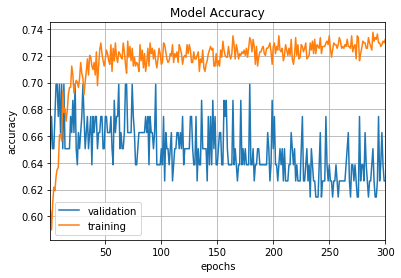

83/83 [==============================] - 0s 200us/step

Fold 7 score : [0.6418697331325117, 0.6265060269688986]
 best Score: 0.761904756228129


fold #8
Train on 751 samples, validate on 83 samples
Epoch 1/300
 - 18s - loss: 1.5581 - acc: 0.3995 - val_loss: 0.8149 - val_acc: 0.3855
Epoch 2/300
 - 1s - loss: 0.7178 - acc: 0.4767 - val_loss: 0.6825 - val_acc: 0.6024
Epoch 3/300
 - 1s - loss: 0.6790 - acc: 0.5992 - val_loss: 0.6722 - val_acc: 0.6145
Epoch 4/300
 - 1s - loss: 0.6760 - acc: 0.6005 - val_loss: 0.6711 - val_acc: 0.6145
Epoch 5/300
 - 1s - loss: 0.6749 - acc: 0.6005 - val_loss: 0.6700 - val_acc: 0.6145
Epoch 6/300
 - 1s - loss: 0.6741 - acc: 0.6005 - val_loss: 0.6690 - val_acc: 0.6145
Epoch 7/300
 - 1s - loss: 0.6735 - acc: 0.6005 - val_loss: 0.6685 - val_acc: 0.6145
Epoch 8/300
 - 1s - loss: 0.6732 - acc: 0.6005 - val_loss: 0.6683 - val_acc: 0.6145
Epoch 9/300
 - 1s - loss: 0.6730 - acc: 0.6005 - val_loss: 0.6682 - val_acc: 0.6145
Epoch 10/300
 - 1s - loss: 0.6728 - acc: 0.60

 - 1s - loss: 0.5783 - acc: 0.7137 - val_loss: 0.5702 - val_acc: 0.7108
Epoch 96/300
 - 1s - loss: 0.5696 - acc: 0.7270 - val_loss: 0.5684 - val_acc: 0.6988
Epoch 97/300
 - 1s - loss: 0.5713 - acc: 0.7230 - val_loss: 0.5767 - val_acc: 0.7108
Epoch 98/300
 - 1s - loss: 0.5686 - acc: 0.7297 - val_loss: 0.5869 - val_acc: 0.7108
Epoch 99/300
 - 1s - loss: 0.5738 - acc: 0.7177 - val_loss: 0.5671 - val_acc: 0.6988
Epoch 100/300
 - 1s - loss: 0.5715 - acc: 0.7150 - val_loss: 0.5712 - val_acc: 0.7229
Epoch 101/300
 - 1s - loss: 0.5703 - acc: 0.7230 - val_loss: 0.5669 - val_acc: 0.7108
Epoch 102/300
 - 1s - loss: 0.5711 - acc: 0.7190 - val_loss: 0.5769 - val_acc: 0.7108
Epoch 103/300
 - 1s - loss: 0.5700 - acc: 0.7270 - val_loss: 0.5658 - val_acc: 0.7229
Epoch 104/300
 - 1s - loss: 0.5728 - acc: 0.7124 - val_loss: 0.5684 - val_acc: 0.7108
Epoch 105/300
 - 1s - loss: 0.5662 - acc: 0.7217 - val_loss: 0.5953 - val_acc: 0.7108
Epoch 106/300
 - 1s - loss: 0.5697 - acc: 0.7111 - val_loss: 0.5632 - va

Epoch 191/300
 - 1s - loss: 0.5603 - acc: 0.7310 - val_loss: 0.5798 - val_acc: 0.7108
Epoch 192/300
 - 1s - loss: 0.5631 - acc: 0.7350 - val_loss: 0.5862 - val_acc: 0.6988
Epoch 193/300
 - 1s - loss: 0.5602 - acc: 0.7230 - val_loss: 0.5818 - val_acc: 0.6988
Epoch 194/300
 - 1s - loss: 0.5621 - acc: 0.7150 - val_loss: 0.5637 - val_acc: 0.6988
Epoch 195/300
 - 1s - loss: 0.5610 - acc: 0.7337 - val_loss: 0.5798 - val_acc: 0.6867
Epoch 196/300
 - 1s - loss: 0.5593 - acc: 0.7204 - val_loss: 0.5998 - val_acc: 0.6506
Epoch 197/300
 - 1s - loss: 0.5620 - acc: 0.7270 - val_loss: 0.5711 - val_acc: 0.6988
Epoch 198/300
 - 1s - loss: 0.5590 - acc: 0.7244 - val_loss: 0.5797 - val_acc: 0.6988
Epoch 199/300
 - 1s - loss: 0.5600 - acc: 0.7297 - val_loss: 0.5873 - val_acc: 0.6867
Epoch 200/300
 - 1s - loss: 0.5594 - acc: 0.7350 - val_loss: 0.5798 - val_acc: 0.6988
Epoch 201/300
 - 1s - loss: 0.5623 - acc: 0.7217 - val_loss: 0.5793 - val_acc: 0.6988
Epoch 202/300
 - 1s - loss: 0.5645 - acc: 0.7297 - val

Epoch 287/300
 - 1s - loss: 0.5501 - acc: 0.7270 - val_loss: 0.5992 - val_acc: 0.6867
Epoch 288/300
 - 1s - loss: 0.5549 - acc: 0.7204 - val_loss: 0.5803 - val_acc: 0.6867
Epoch 289/300
 - 1s - loss: 0.5540 - acc: 0.7257 - val_loss: 0.5803 - val_acc: 0.6988
Epoch 290/300
 - 1s - loss: 0.5493 - acc: 0.7310 - val_loss: 0.5863 - val_acc: 0.6988
Epoch 291/300
 - 1s - loss: 0.5539 - acc: 0.7244 - val_loss: 0.6080 - val_acc: 0.6867
Epoch 292/300
 - 1s - loss: 0.5543 - acc: 0.7310 - val_loss: 0.5842 - val_acc: 0.6867
Epoch 293/300
 - 1s - loss: 0.5515 - acc: 0.7270 - val_loss: 0.5865 - val_acc: 0.6988
Epoch 294/300
 - 1s - loss: 0.5513 - acc: 0.7350 - val_loss: 0.5827 - val_acc: 0.6867
Epoch 295/300
 - 1s - loss: 0.5531 - acc: 0.7377 - val_loss: 0.5851 - val_acc: 0.6867
Epoch 296/300
 - 1s - loss: 0.5501 - acc: 0.7337 - val_loss: 0.5844 - val_acc: 0.6867
Epoch 297/300
 - 1s - loss: 0.5499 - acc: 0.7284 - val_loss: 0.5776 - val_acc: 0.6988
Epoch 298/300
 - 1s - loss: 0.5548 - acc: 0.7284 - val

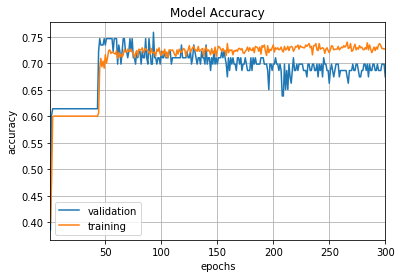

83/83 [==============================] - 0s 227us/step

Fold 8 score : [0.6005289328385548, 0.6746987966169794]
 best Score: 0.761904756228129


fold #9
Train on 751 samples, validate on 83 samples
Epoch 1/300
 - 18s - loss: 0.6702 - acc: 0.6165 - val_loss: 0.6532 - val_acc: 0.5301
Epoch 2/300
 - 1s - loss: 0.6445 - acc: 0.6312 - val_loss: 0.6452 - val_acc: 0.6265
Epoch 3/300
 - 1s - loss: 0.6412 - acc: 0.6325 - val_loss: 0.6396 - val_acc: 0.6506
Epoch 4/300
 - 1s - loss: 0.6449 - acc: 0.6565 - val_loss: 0.6356 - val_acc: 0.6627
Epoch 5/300
 - 1s - loss: 0.6348 - acc: 0.6538 - val_loss: 0.6291 - val_acc: 0.6627
Epoch 6/300
 - 1s - loss: 0.6234 - acc: 0.6551 - val_loss: 0.6239 - val_acc: 0.6747
Epoch 7/300
 - 1s - loss: 0.6258 - acc: 0.6764 - val_loss: 0.6186 - val_acc: 0.6747
Epoch 8/300
 - 1s - loss: 0.6170 - acc: 0.6804 - val_loss: 0.6120 - val_acc: 0.6506
Epoch 9/300
 - 1s - loss: 0.6189 - acc: 0.6858 - val_loss: 0.6241 - val_acc: 0.6145
Epoch 10/300
 - 1s - loss: 0.6177 - acc: 0.67

 - 1s - loss: 0.5686 - acc: 0.7244 - val_loss: 0.5782 - val_acc: 0.6867
Epoch 96/300
 - 1s - loss: 0.5718 - acc: 0.7150 - val_loss: 0.5798 - val_acc: 0.6867
Epoch 97/300
 - 1s - loss: 0.5712 - acc: 0.7244 - val_loss: 0.5784 - val_acc: 0.7229
Epoch 98/300
 - 1s - loss: 0.5654 - acc: 0.7257 - val_loss: 0.5831 - val_acc: 0.6988
Epoch 99/300
 - 1s - loss: 0.5682 - acc: 0.7204 - val_loss: 0.5802 - val_acc: 0.7108
Epoch 100/300
 - 1s - loss: 0.5696 - acc: 0.7297 - val_loss: 0.5790 - val_acc: 0.7229
Epoch 101/300
 - 1s - loss: 0.5673 - acc: 0.7217 - val_loss: 0.5792 - val_acc: 0.7229
Epoch 102/300
 - 1s - loss: 0.5657 - acc: 0.7310 - val_loss: 0.5788 - val_acc: 0.7108
Epoch 103/300
 - 1s - loss: 0.5671 - acc: 0.7350 - val_loss: 0.5845 - val_acc: 0.6867
Epoch 104/300
 - 1s - loss: 0.5644 - acc: 0.7337 - val_loss: 0.5874 - val_acc: 0.6627
Epoch 105/300
 - 1s - loss: 0.5649 - acc: 0.7190 - val_loss: 0.5791 - val_acc: 0.7229
Epoch 106/300
 - 1s - loss: 0.5675 - acc: 0.7310 - val_loss: 0.5797 - va

Epoch 191/300
 - 1s - loss: 0.5590 - acc: 0.7297 - val_loss: 0.5883 - val_acc: 0.6867
Epoch 192/300
 - 1s - loss: 0.5575 - acc: 0.7324 - val_loss: 0.5955 - val_acc: 0.6386
Epoch 193/300
 - 1s - loss: 0.5615 - acc: 0.7270 - val_loss: 0.5890 - val_acc: 0.6867
Epoch 194/300
 - 1s - loss: 0.5571 - acc: 0.7324 - val_loss: 0.5928 - val_acc: 0.6988
Epoch 195/300
 - 1s - loss: 0.5595 - acc: 0.7364 - val_loss: 0.5925 - val_acc: 0.6988
Epoch 196/300
 - 1s - loss: 0.5565 - acc: 0.7284 - val_loss: 0.5894 - val_acc: 0.6265
Epoch 197/300
 - 1s - loss: 0.5617 - acc: 0.7337 - val_loss: 0.5862 - val_acc: 0.6747
Epoch 198/300
 - 1s - loss: 0.5571 - acc: 0.7310 - val_loss: 0.5950 - val_acc: 0.6988
Epoch 199/300
 - 1s - loss: 0.5569 - acc: 0.7284 - val_loss: 0.5920 - val_acc: 0.6386
Epoch 200/300
 - 1s - loss: 0.5566 - acc: 0.7337 - val_loss: 0.5947 - val_acc: 0.6867
Epoch 201/300
 - 1s - loss: 0.5604 - acc: 0.7137 - val_loss: 0.5920 - val_acc: 0.6506
Epoch 202/300
 - 1s - loss: 0.5574 - acc: 0.7297 - val

Epoch 287/300
 - 1s - loss: 0.5498 - acc: 0.7244 - val_loss: 0.6086 - val_acc: 0.6867
Epoch 288/300
 - 1s - loss: 0.5486 - acc: 0.7324 - val_loss: 0.6123 - val_acc: 0.6867
Epoch 289/300
 - 1s - loss: 0.5498 - acc: 0.7137 - val_loss: 0.5958 - val_acc: 0.6988
Epoch 290/300
 - 1s - loss: 0.5532 - acc: 0.7297 - val_loss: 0.6127 - val_acc: 0.6747
Epoch 291/300
 - 1s - loss: 0.5479 - acc: 0.7324 - val_loss: 0.6045 - val_acc: 0.7108
Epoch 292/300
 - 1s - loss: 0.5494 - acc: 0.7324 - val_loss: 0.5905 - val_acc: 0.6988
Epoch 293/300
 - 1s - loss: 0.5508 - acc: 0.7244 - val_loss: 0.6142 - val_acc: 0.6627
Epoch 294/300
 - 1s - loss: 0.5463 - acc: 0.7350 - val_loss: 0.6054 - val_acc: 0.6627
Epoch 295/300
 - 1s - loss: 0.5486 - acc: 0.7350 - val_loss: 0.6007 - val_acc: 0.7108
Epoch 296/300
 - 1s - loss: 0.5483 - acc: 0.7284 - val_loss: 0.5987 - val_acc: 0.6988
Epoch 297/300
 - 1s - loss: 0.5538 - acc: 0.7284 - val_loss: 0.5917 - val_acc: 0.6988
Epoch 298/300
 - 1s - loss: 0.5528 - acc: 0.7204 - val

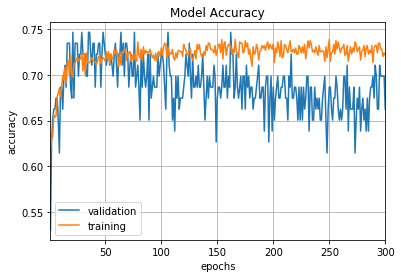

83/83 [==============================] - 0s 295us/step

Fold 9 score : [0.6236159751214176, 0.6626505966646126]
 best Score: 0.761904756228129


fold #10
Train on 751 samples, validate on 83 samples
Epoch 1/300


In [ ]:
batch_size = 10
num_classes = 2
epochs = 300

input_shape = len(actual_x[0])
kfold_validation_score_store = []
avg_cross_validation_score = 0
n_Of_fold = 10
kf = KFold(n_Of_fold)
fold = 0
score = 0
best_score = 0.0
terget_names = ["NO","YES"]
model = 0

for train,test in kf.split(actual_x):
    fold += 1
    print("\n\nfold #{}".format(fold))
    train_x = actual_x[train]
    train_y = actual_y[train]
    test_x = actual_x[test]
    test_y = actual_y[test]

    model = Sequential([
    Dense(8,input_shape=(input_shape,),activation="relu"),
    Dense(7,activation="relu"),
    Dense(6,activation="relu"),
    Dense(2,activation="softmax")
    ])
    
    model.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
                  metrics=['accuracy'])

    history1 = model.fit(train_x, train_y,
              validation_data = (test_x,test_y),
              batch_size=10,epochs=epochs,shuffle=True,verbose=2)
    
    plot_fig(1, history1)
    
    #model.save("heart_attack_risk_prediction_fold_no_"+str(fold)+"_with_cross_validation.h5")

    rounded_predections = model.predict_classes(test_x,batch_size=10,verbose=0)
    rounded_predicted_result = rounded_predections
    #pred = model.predict(self.test_x)
    pred_class = model.predict_classes(test_x)
    score = model.evaluate(test_x, test_y)

    if(best_score<score[1]):
        best_score = score[1]
        best_model = model

    kfold_validation_score_store.append(score)

    print("\nFold {0} score : {1}\n best Score: {2}".format(fold,score,best_score))

    #print("\n\n")

    #cm = confussion_matrix_generator(test_y,rounded_predicted_result)
    #ROC_curve_generator(model,test_x)

    #print(classification_report(pred_class,test_y,target_names=terget_names))

    #performance(cm)

    #print("\n\nnew\n\n")
    #break

In [ ]:
kfold_validation_score_store